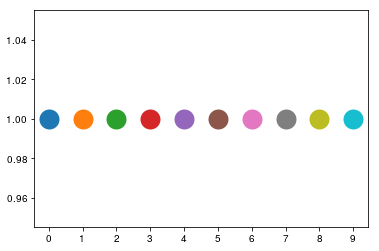

In [18]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import math
import pylab as pl
import numpy as np
import pandas as pd
from   pandas import Series, DataFrame
from   sklearn import preprocessing
from   pylab import *
from   numpy import exp,arange
from   pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from   scipy.interpolate import interp1d
import matplotlib.cm as cmx
from matplotlib import rc
import matplotlib.colors as colors
from numpy import linalg as LA
import scipy as scipy
from scipy import stats
rc('text', usetex=True)
pl.rcParams['text.latex.preamble'] = [
    r'\usepackage{tgheros}',    # helvetica font
    r'\usepackage{sansmath}',   # math-font matching  helvetica
    r'\sansmath'                # actually tell tex to use it!
    r'\usepackage{siunitx}',    # micro symbols
    r'\sisetup{detect-all}',    # force siunitx to use the fonts
]  
import json
import sys
sys.path.append('')
import scipy.io as sio

path = !pwd
os.chdir(path[0])


# These are the "Tableau 10" colors as RGB.    
tableau10 = [(31,119,180),(255,127,14),(44,160,44),(214,39,40),(148,103,189),(140,86,75),(227,119,194),(127,127,127),(188,189,34),(23,190,207)]

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau10)):    
    r, g, b = tableau10[i]    
    tableau10[i] = np.array([r / 255., g / 255., b / 255.])   
    
###--- Set ticks ---###
plt.xticks(range(0,11), [str(x) for x in range(0,11)], fontsize=10)     

for i in range(len(tableau10)):
    plt.plot(i,1,markersize=20,marker="o",markeredgewidth=0.0,lw=2.,linestyle='-', color=tableau10[i],label=  r"$D_{ \rm{cold} }/D_{ \rm{hot} }$ ="+str(10**i/10000))
    
    
    
def ax_setter(xmin,xmax,ymin,ymax):
    """
    INPUTS
    =======
    xmin: float, minimum value of x-axis
    xmax: float, maximum value of x-axis
    ymin: float, minimum value of y-axis
    ymax: float, maximum value of y-axis
    
    RETURNS
    =======
    None
    """
    ax = plt.subplot(111)   
    #Set line width of axes
    ax.spines["top"].set_linewidth(2)    
    ax.spines["bottom"].set_linewidth(2)    
    ax.spines["right"].set_linewidth(2)    
    ax.spines["left"].set_linewidth(2) 
    ax.tick_params(axis="both", which="both", bottom="on", top="on",    
    labelbottom="on", left="on", right="on", labelleft="on",direction='in',length=7,width=1.5,pad=8,labelsize=20)
    
    if xmin==0 and xmax==0 and ymin==0 and ymax==0:
        return ()
    else:
        plt.xlim(xmin,xmax)
        plt.ylim(ymin,ymax)
        return ()
    
# Take nearest neighbor difference of the angles in array
def AngleDiff(Angle):
    """
    input: numpy array
    output: nearest neighbor difference of the angles
    """
    return ( np.log( np.exp(1j*Angle)[1:]/np.exp(1j*Angle)[:-1] )/(1j) ).real


In [19]:
Data = []
for j in range(1,50):
    with open('./output3/Taku_Body_000000000'+"{0:0=3d}".format(j)+'_keypoints.json') as f:
        dat = json.load(f)
        Data.append(dat['people'][0]['pose_keypoints_2d'])
Data = np.array(Data)

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


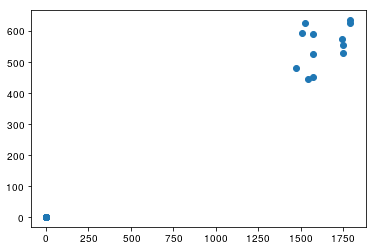

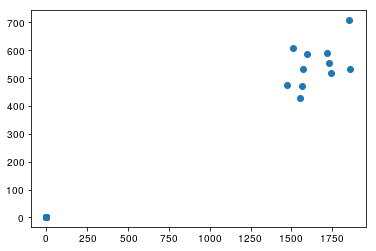

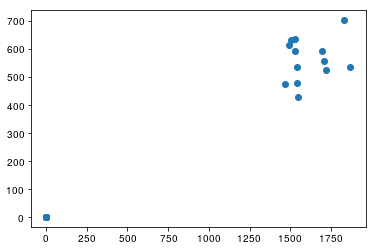

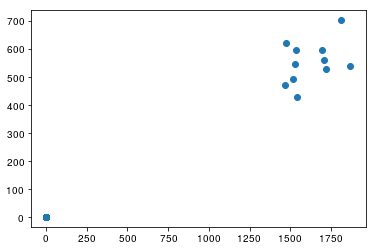

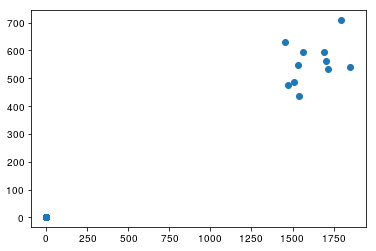

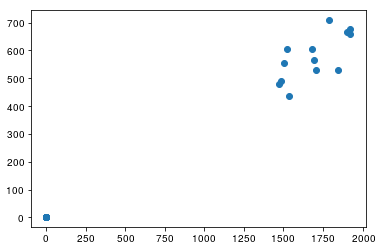

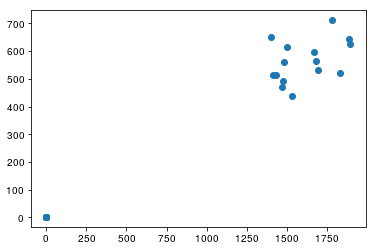

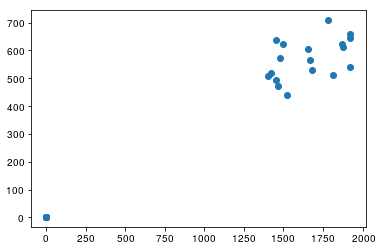

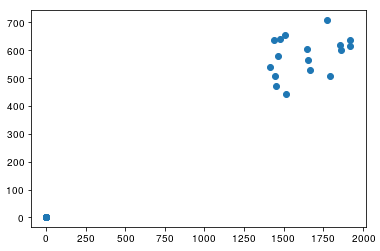

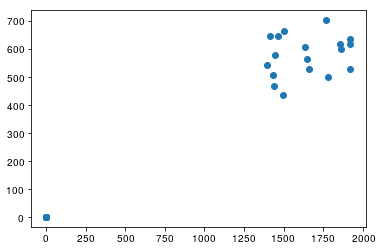

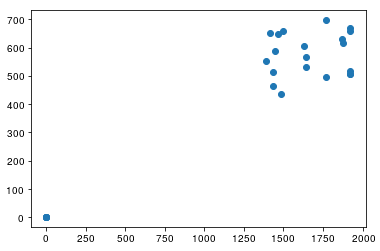

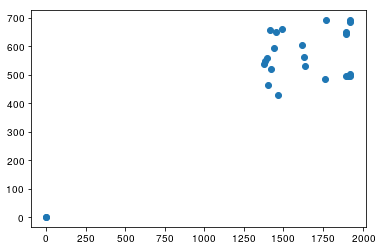

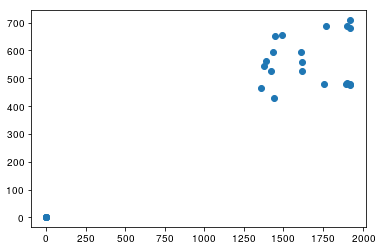

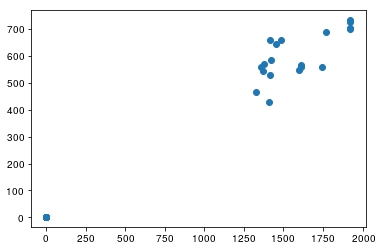

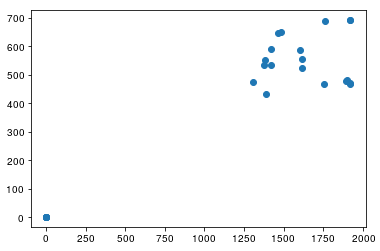

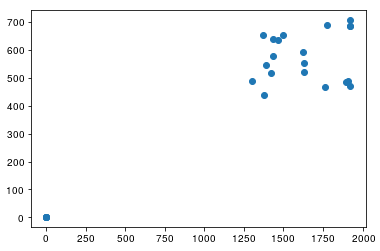

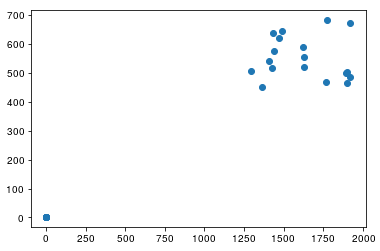

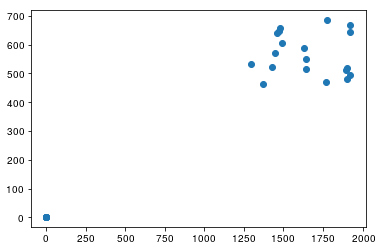

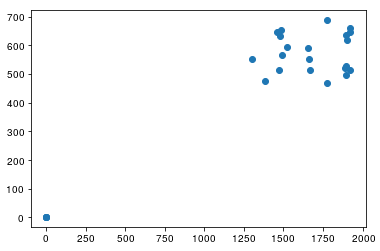

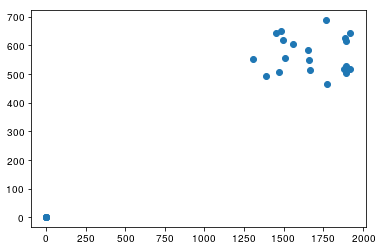

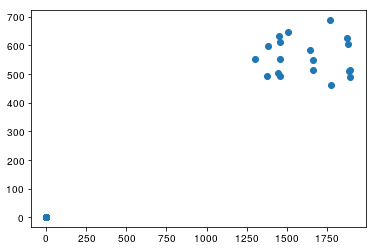

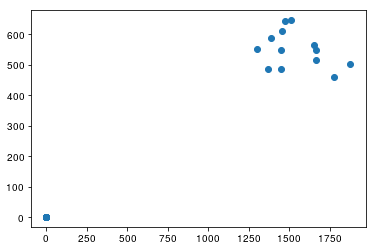

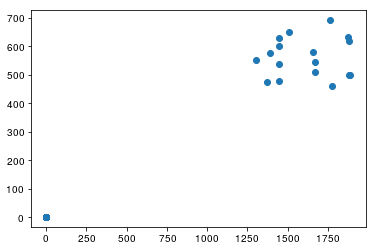

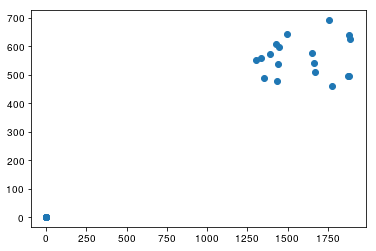

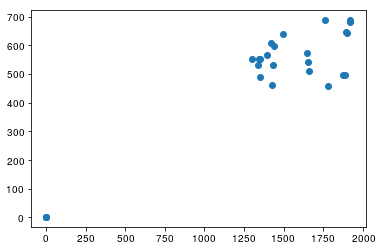

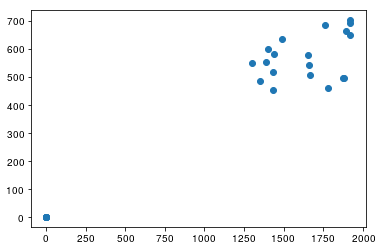

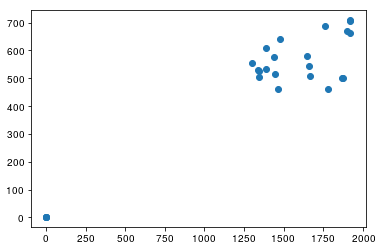

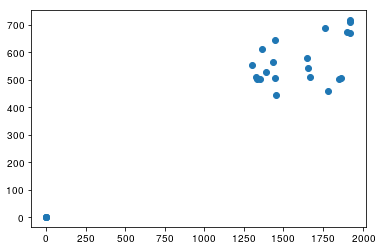

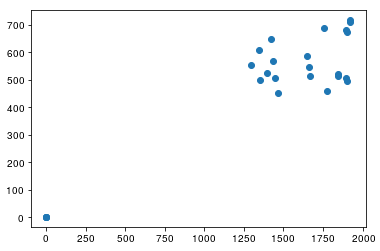

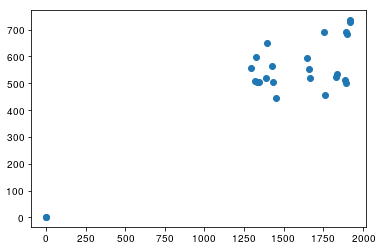

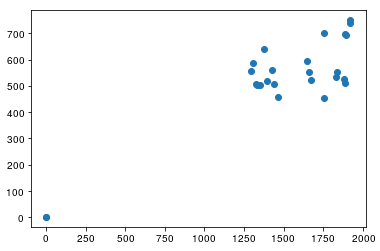

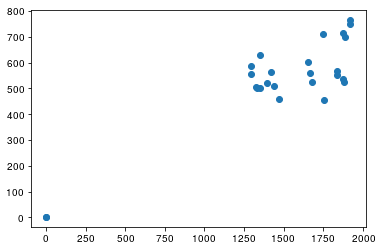

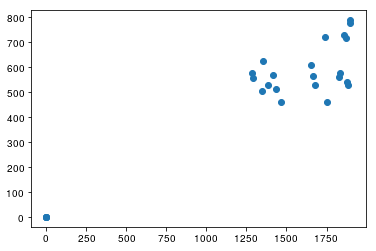

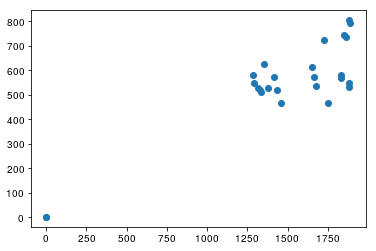

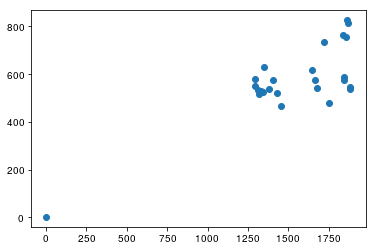

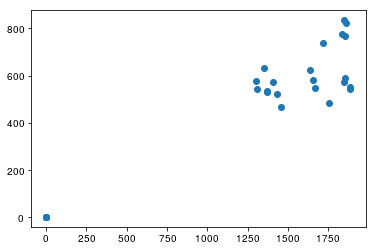

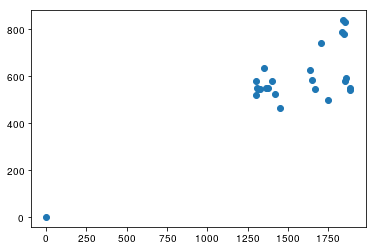

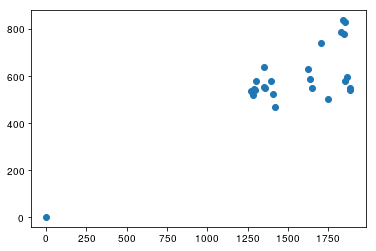

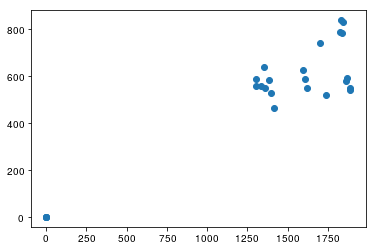

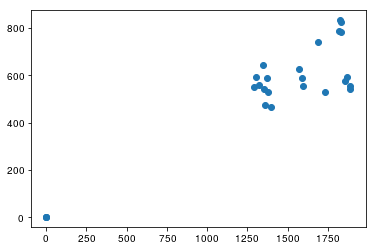

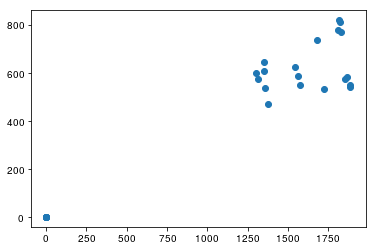

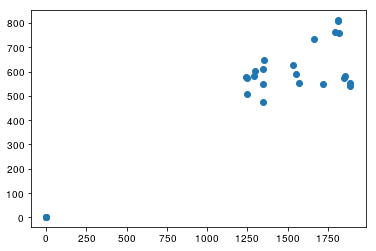

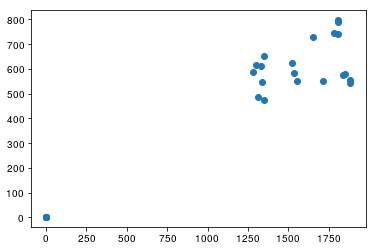

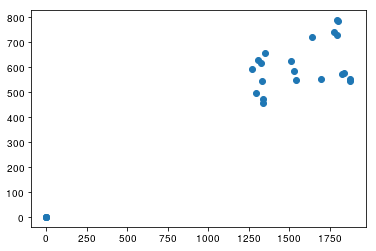

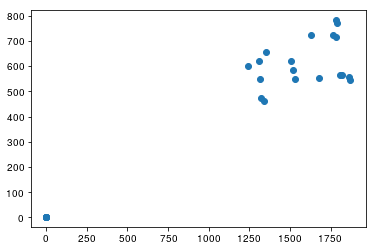

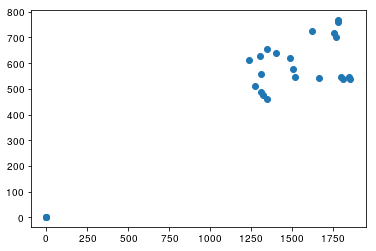

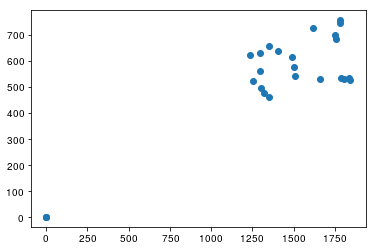

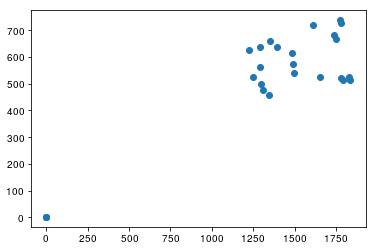

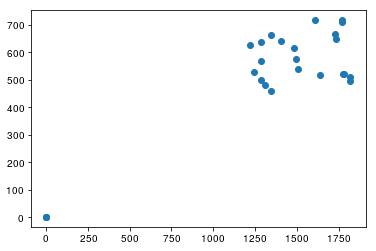

In [20]:
for i in range(len(Data)):
    figure()
    plt.scatter( np.take(Data[i],np.arange(0,len(Data[i]),3)), np.take(Data[i],np.arange(1,len(Data[i]),3)) )

In [21]:
import cv2 as cv
# visualize
colors = [[255, 0, 0], [255, 85, 0], [255, 170, 0], [255, 255, 0], [170, 255, 0], [85, 255, 0], [0, 255, 0], \
          [0, 255, 85], [0, 255, 170], [0, 255, 255], [0, 170, 255], [0, 85, 255], [0, 0, 255], [85, 0, 255], \
          [170, 0, 255], [255, 0, 255], [255, 0, 170], [255, 0, 85]]
cmap = matplotlib.cm.get_cmap('hsv')

canvas = cv.imread(test_image) # B,G,R order

for i in range(18):
    rgba = np.array(cmap(1 - i/18. - 1./36))
    rgba[0:3] *= 255
    for j in range(len(all_peaks[i])):
        cv.circle(canvas, all_peaks[i][j][0:2], 4, colors[i], thickness=-1)

to_plot = cv.addWeighted(oriImg, 0.3, canvas, 0.7, 0)
plt.imshow(to_plot[:,:,[2,1,0]])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 12)

ModuleNotFoundError: No module named 'cv2'

In [22]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import json
from pprint import pprint

rH = np.array([])
lH = np.array([])

for j in range(0,533,50):
    with open('./output3/Taku_Body_000000000'+"{0:0=3d}".format(j)+'_keypoints.json') as f:
        data = json.load(f)
        twoD = data['people'][0]['pose_keypoints_2d']
        lendata = len(twoD)
        plt.figure()
        #rH = np.append(rH,np.array([twoD[12], twoD[13]]),axis=1)
        #lH = np.append(lH,[twoD[21], twoD[22]])
        
        plt.scatter( np.take(twoD, np.arange(0,len(twoD),3)) , np.take(twoD, np.arange(1,len(twoD),3)) )
#         np.take(twoD, np.arange(1,len(twoD),3))
#         for i in np.arange(0,len(twoD),3):
#             if i == 12:
#                 plt.scatter( twoD[i],twoD[i+1], c='r')                
#             else:
#                 plt.scatter( twoD[i],twoD[i+1], c='k')

IndexError: list index out of range

In [23]:
for k in np.arange(0,len(twoD),3):
        twoD[k] -= -twoD[24]
for k in np.arange(1,len(twoD),3):
        twoD[k] -= -twoD[25]

NameError: name 'twoD' is not defined

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


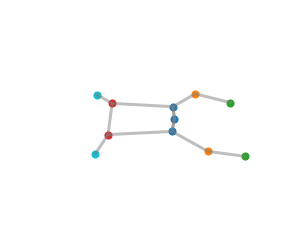

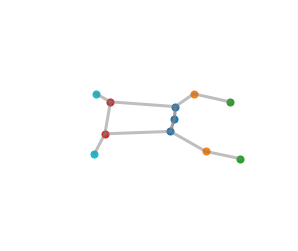

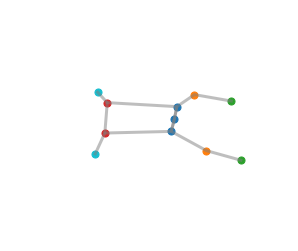

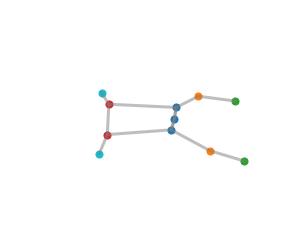

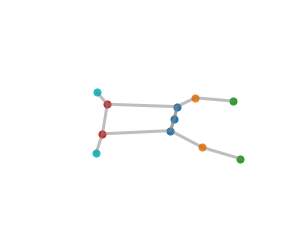

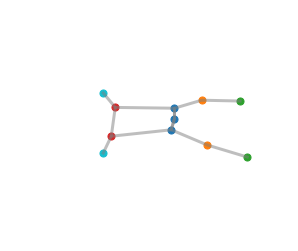

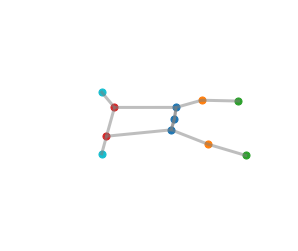

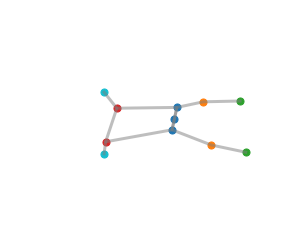

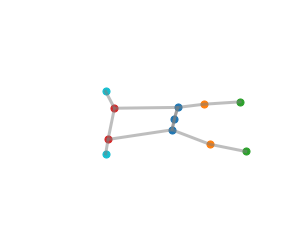

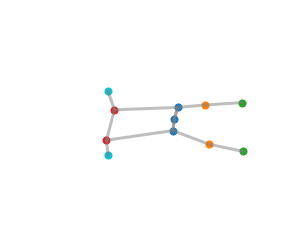

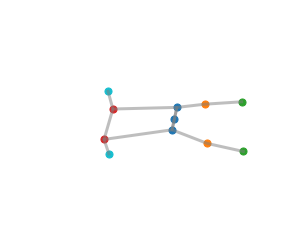

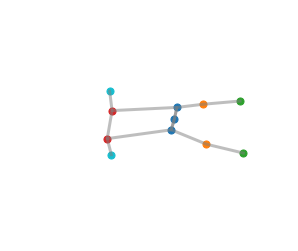

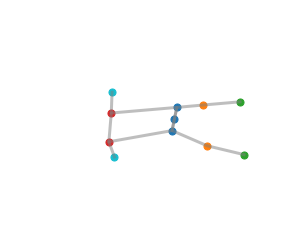

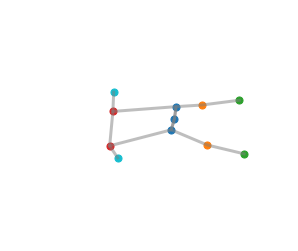

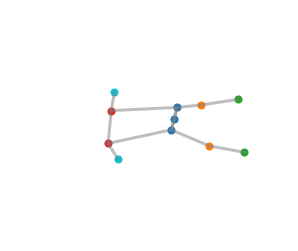

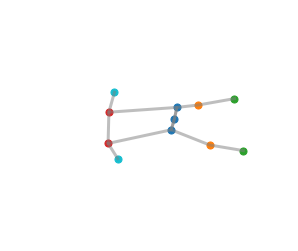

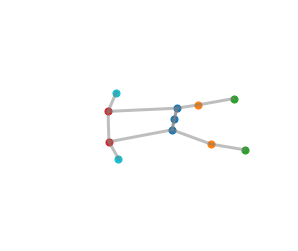

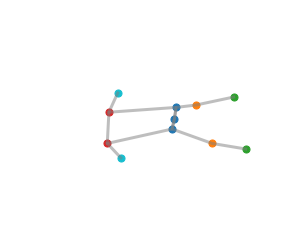

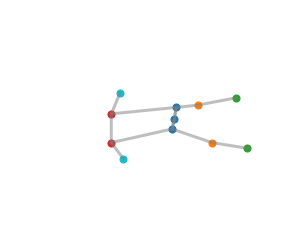

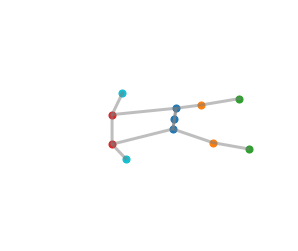

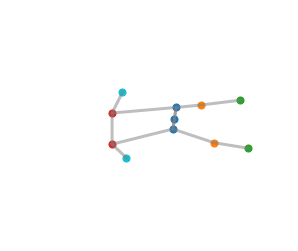

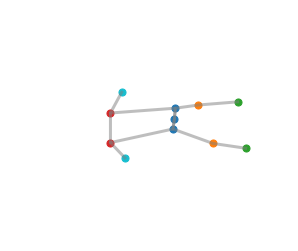

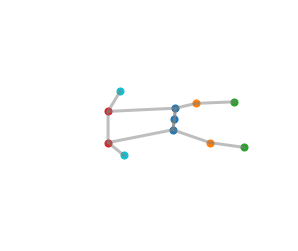

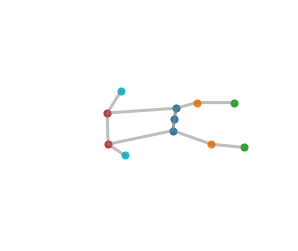

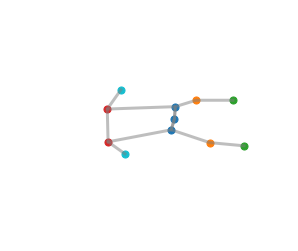

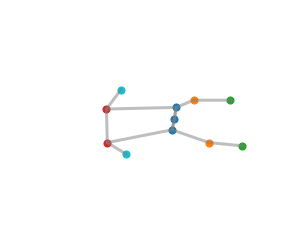

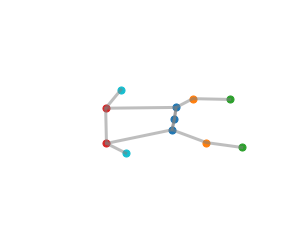

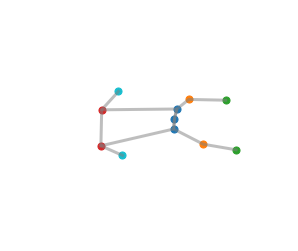

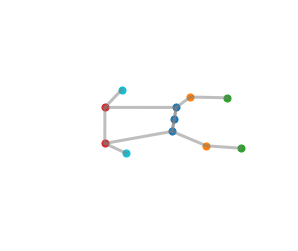

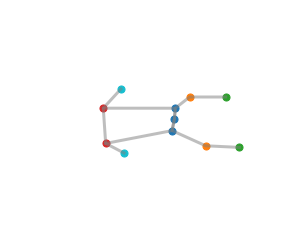

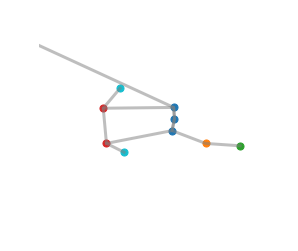

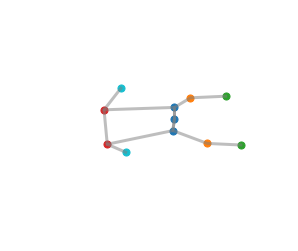

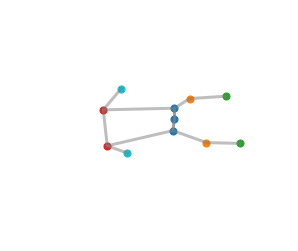

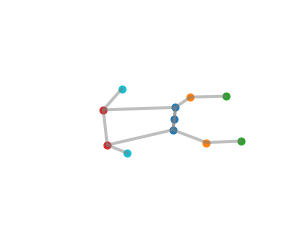

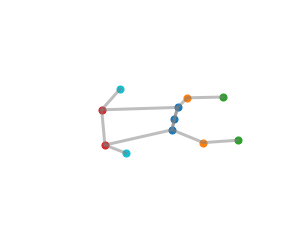

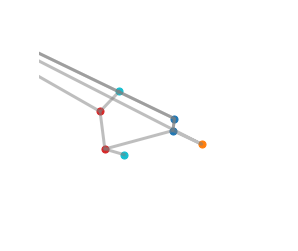

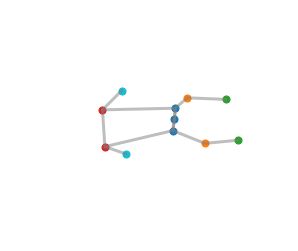

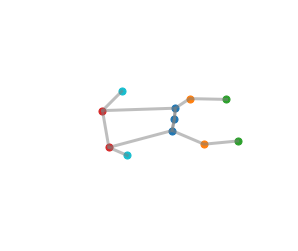

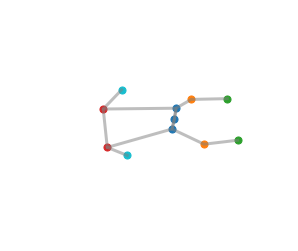

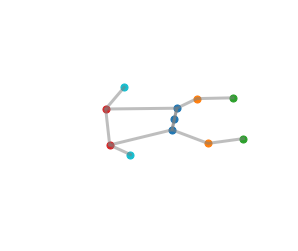

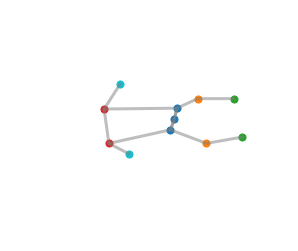

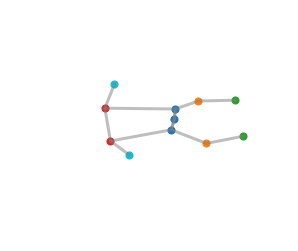

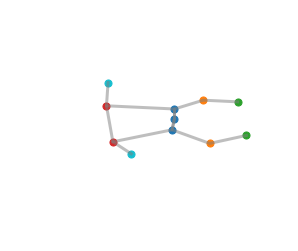

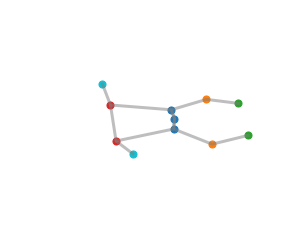

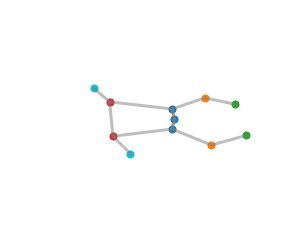

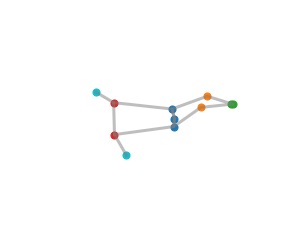

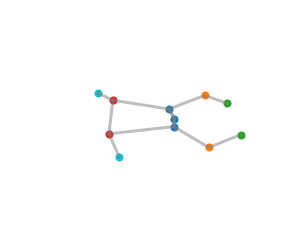

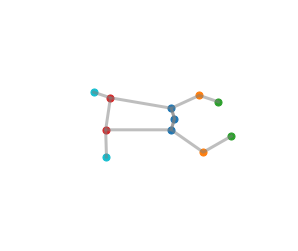

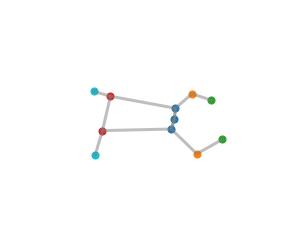

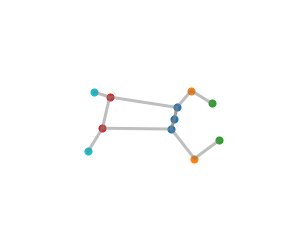

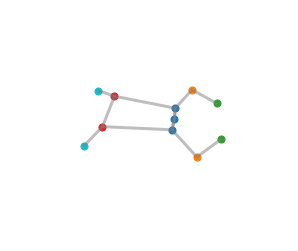

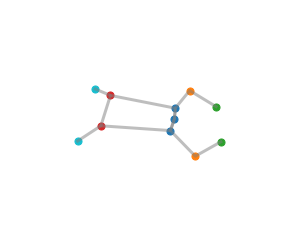

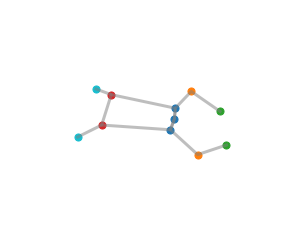

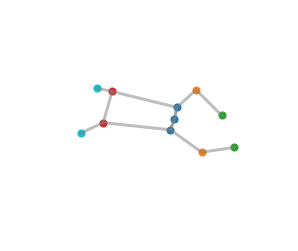

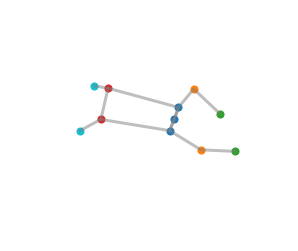

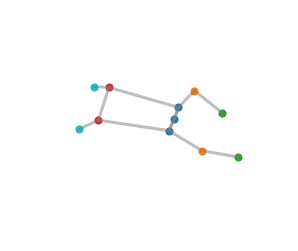

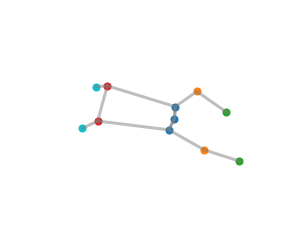

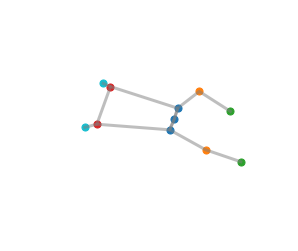

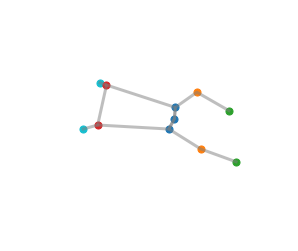

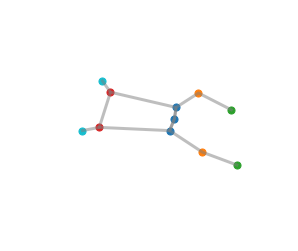

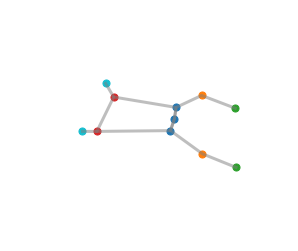

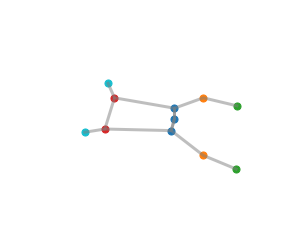

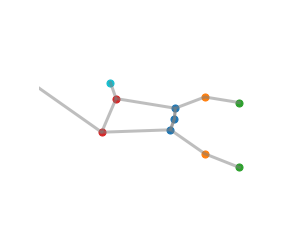

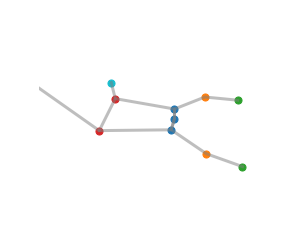

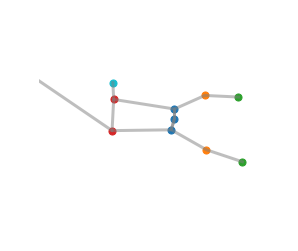

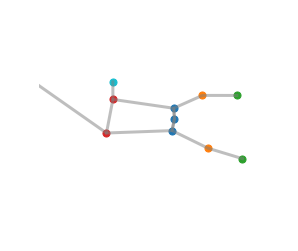

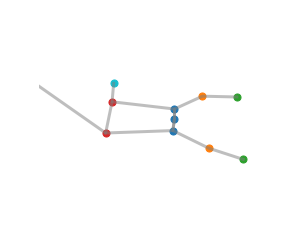

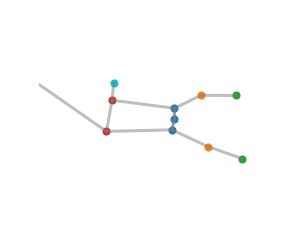

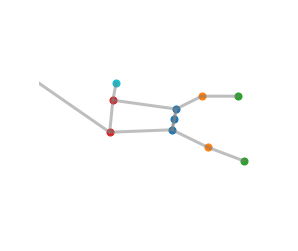

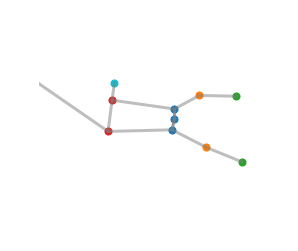

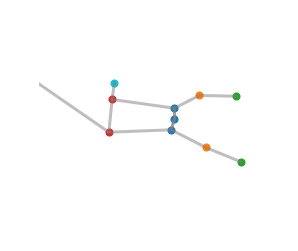

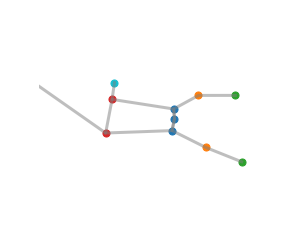

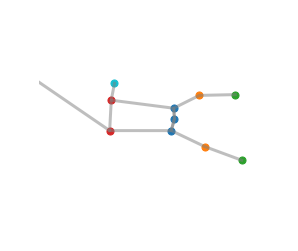

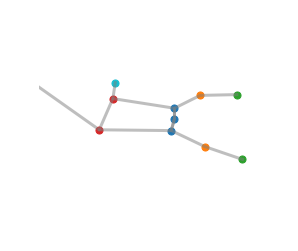

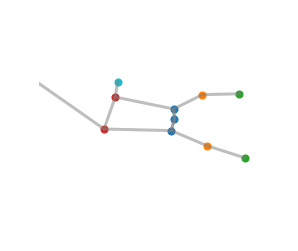

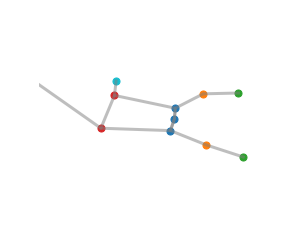

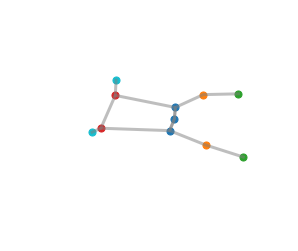

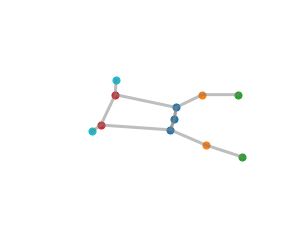

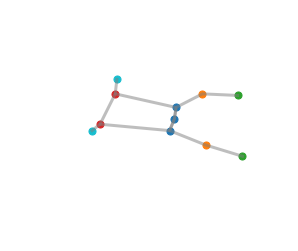

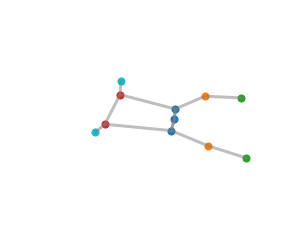

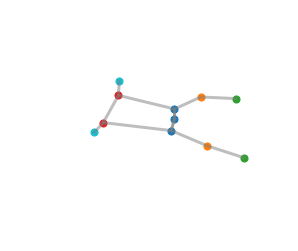

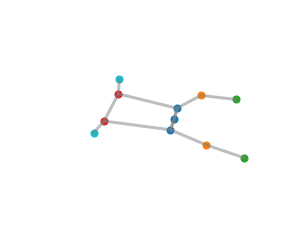

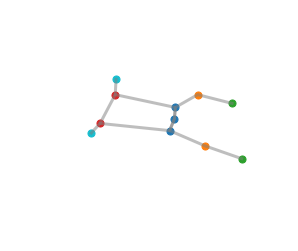

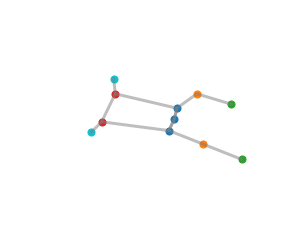

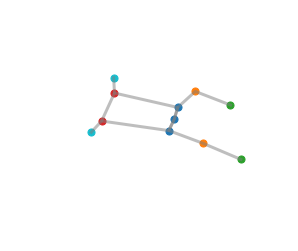

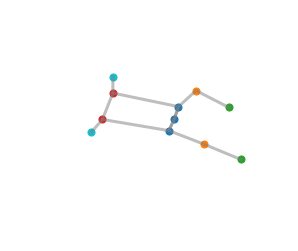

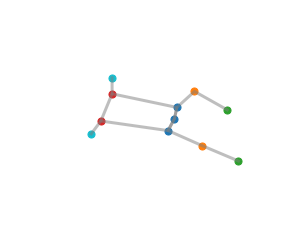

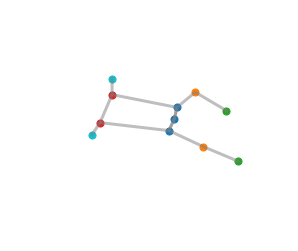

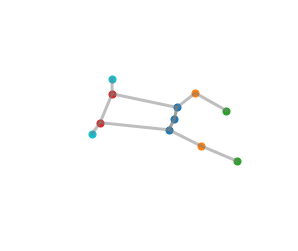

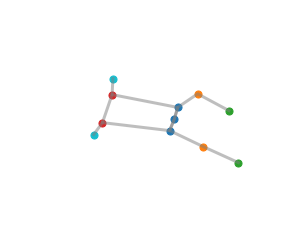

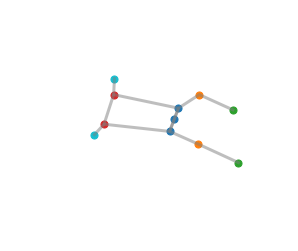

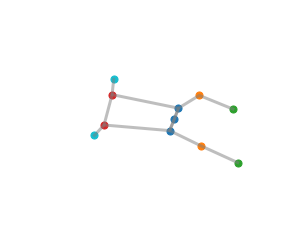

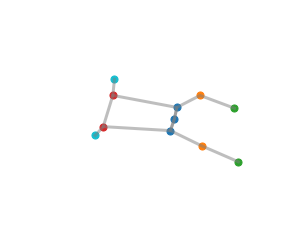

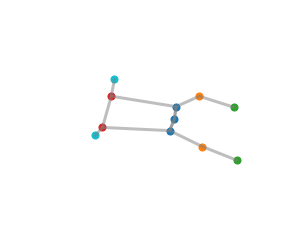

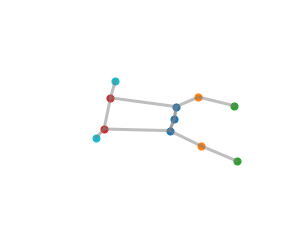

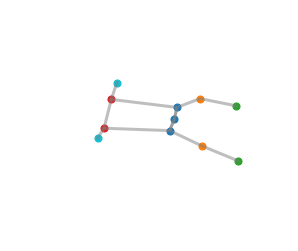

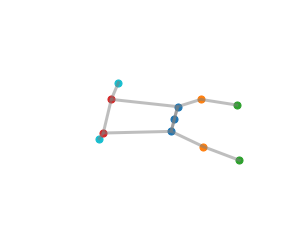

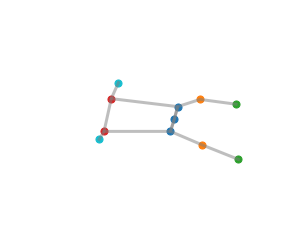

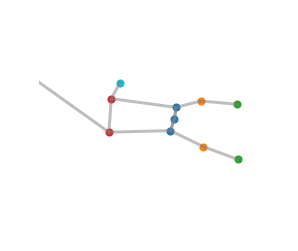

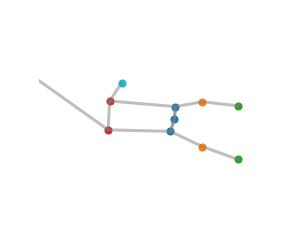

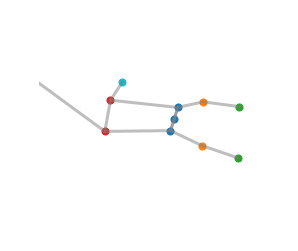

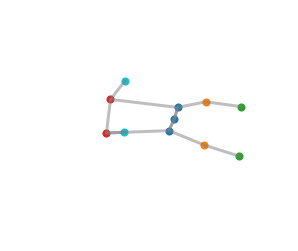

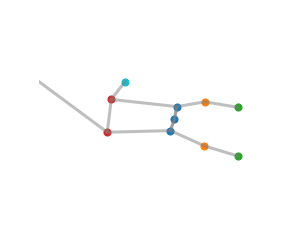

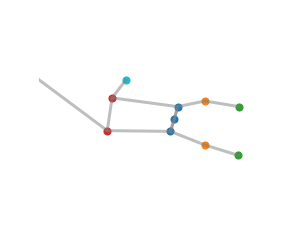

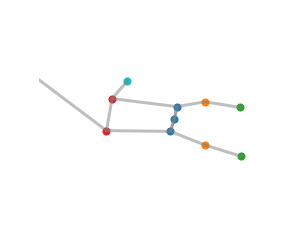

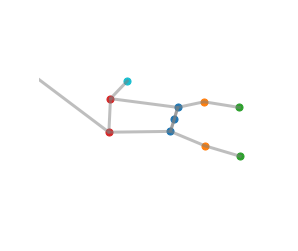

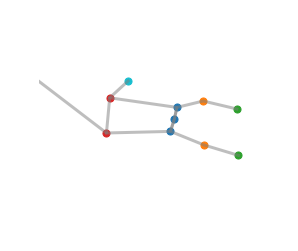

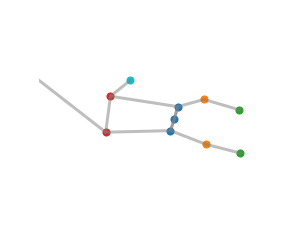

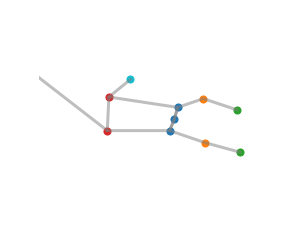

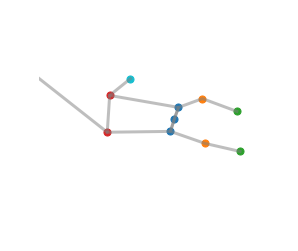

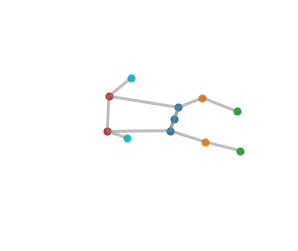

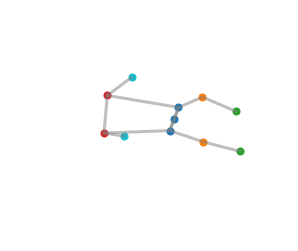

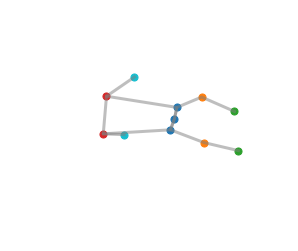

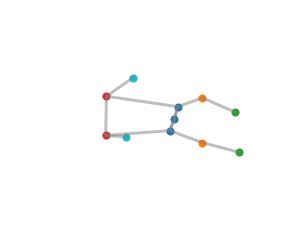

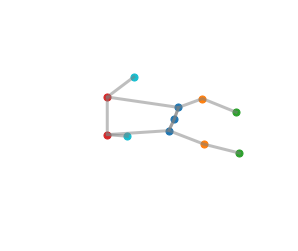

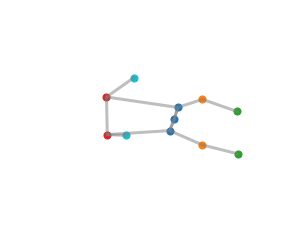

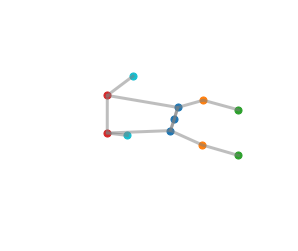

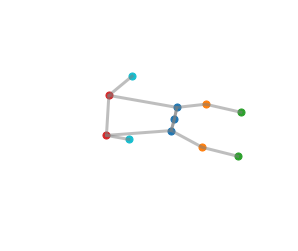

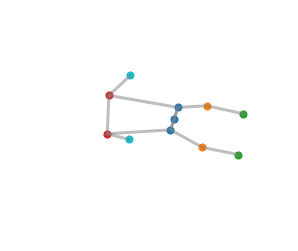

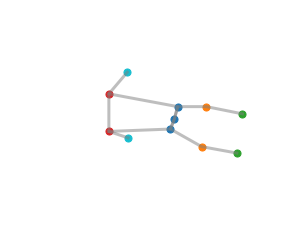

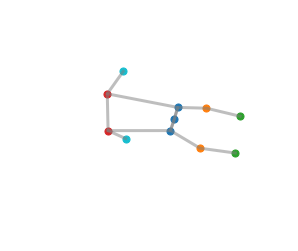

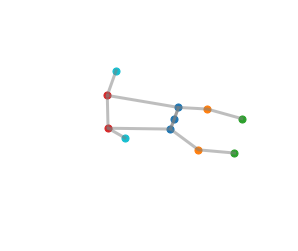

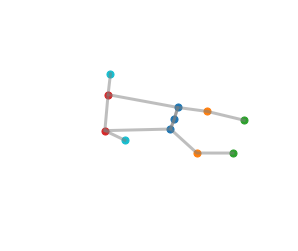

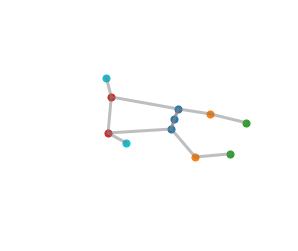

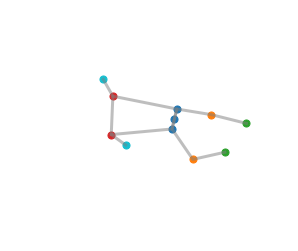

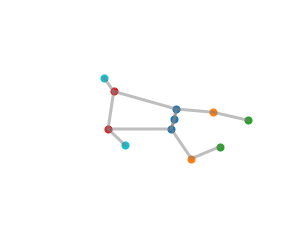

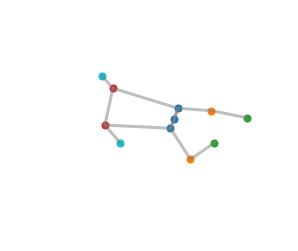

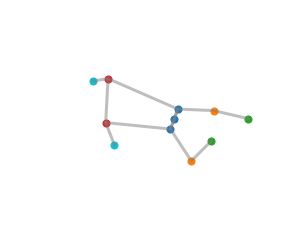

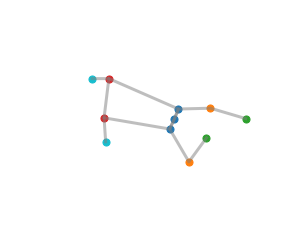

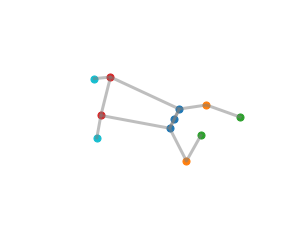

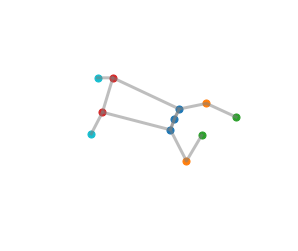

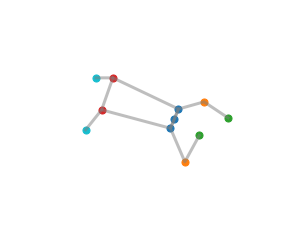

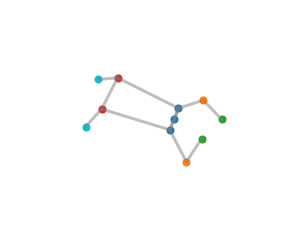

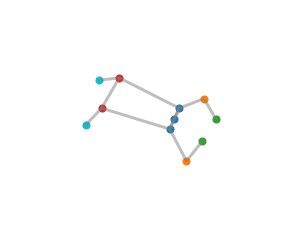

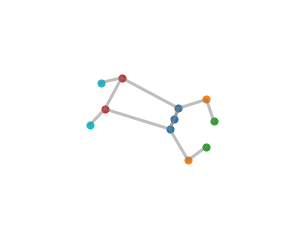

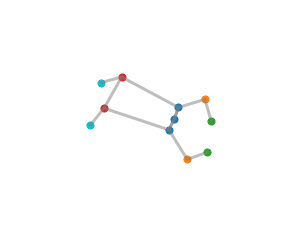

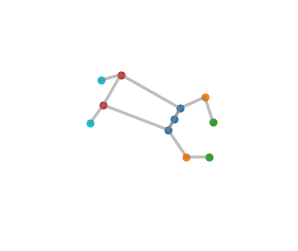

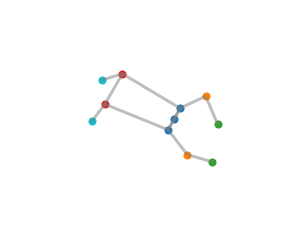

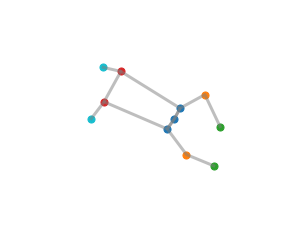

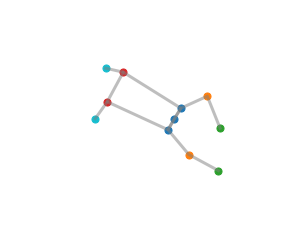

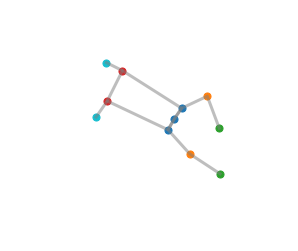

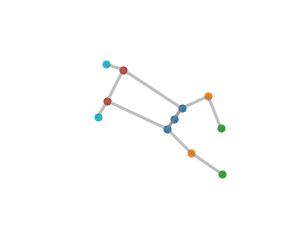

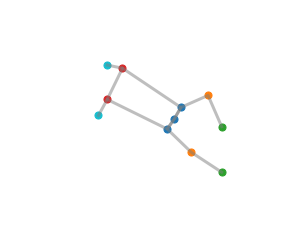

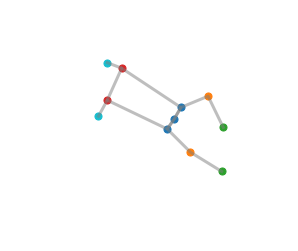

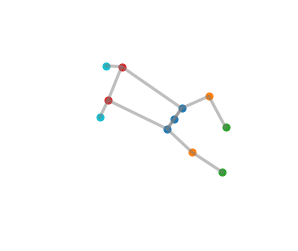

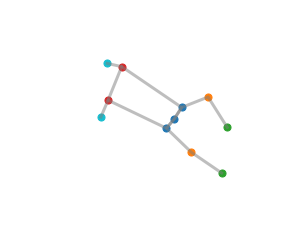

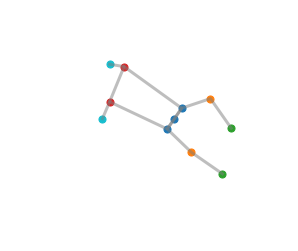

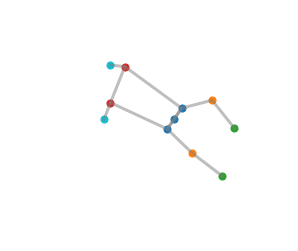

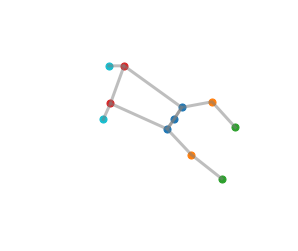

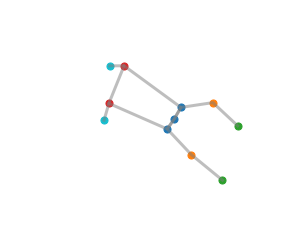

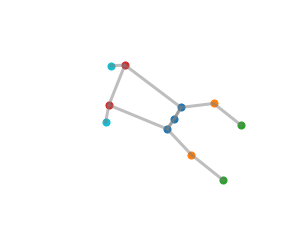

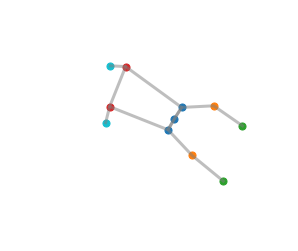

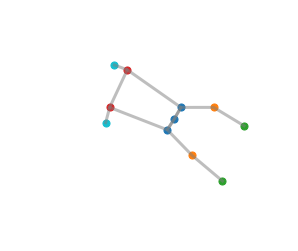

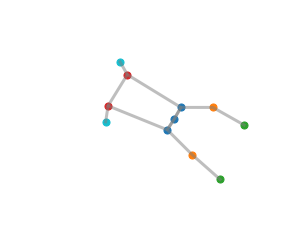

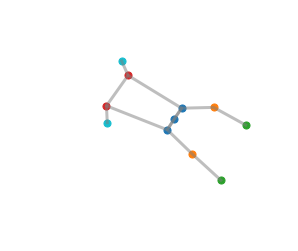

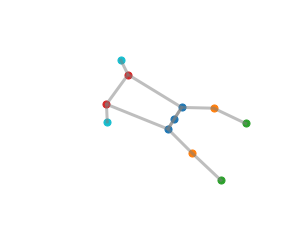

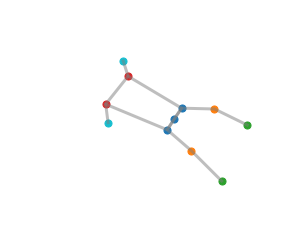

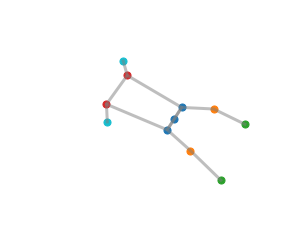

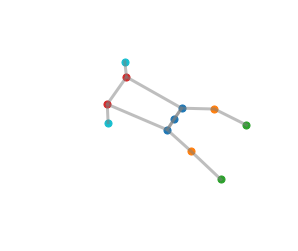

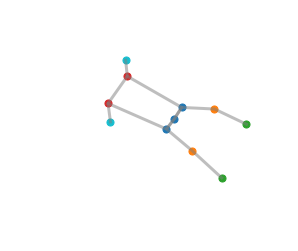

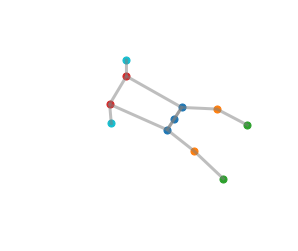

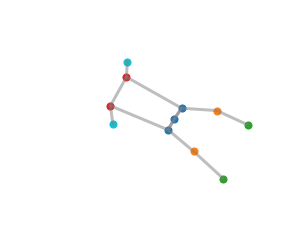

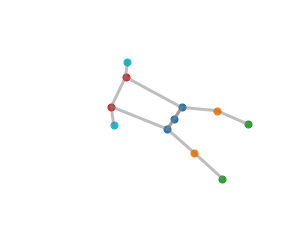

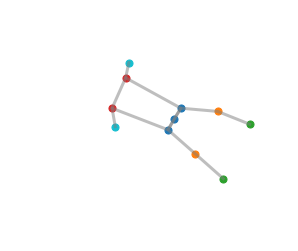

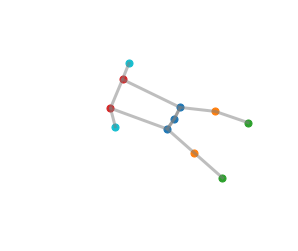

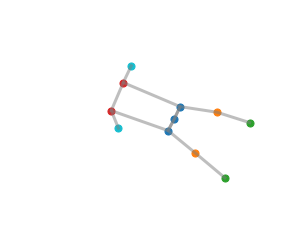

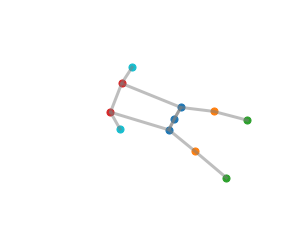

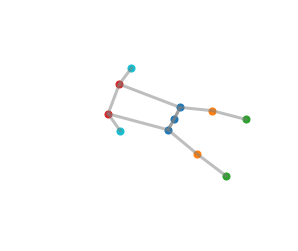

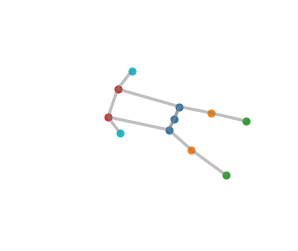

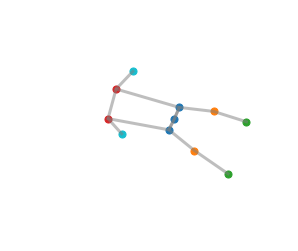

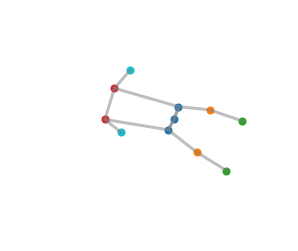

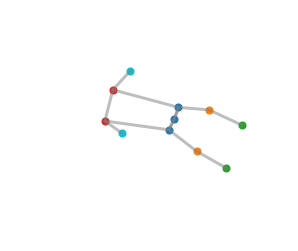

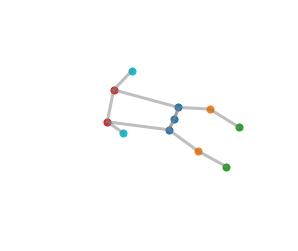

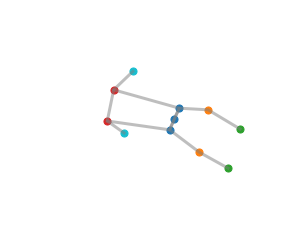

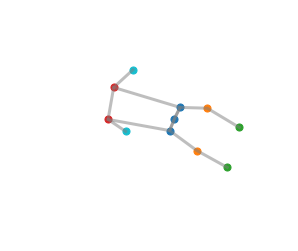

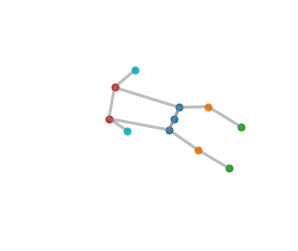

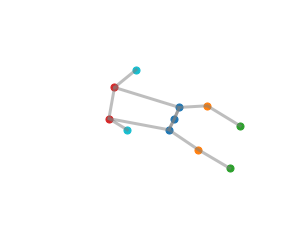

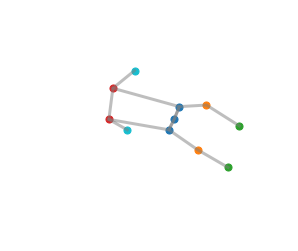

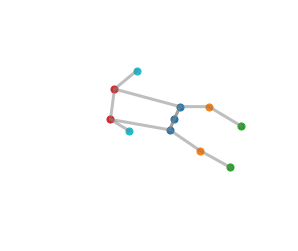

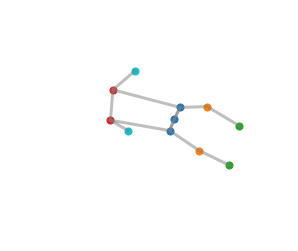

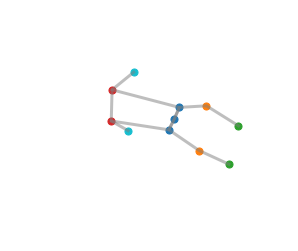

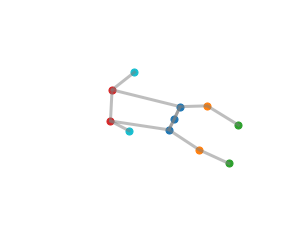

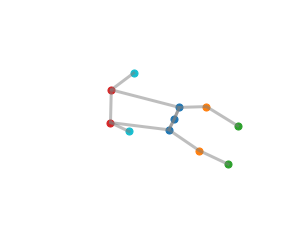

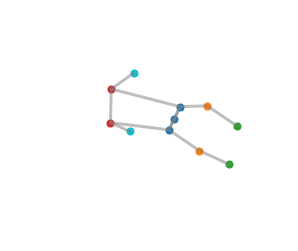

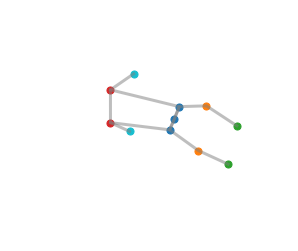

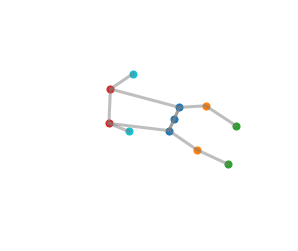

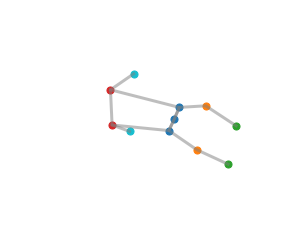

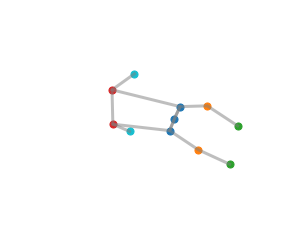

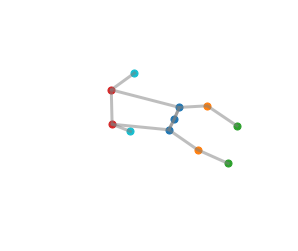

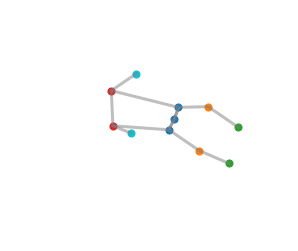

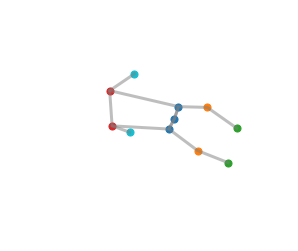

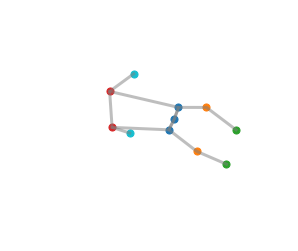

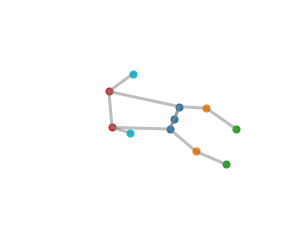

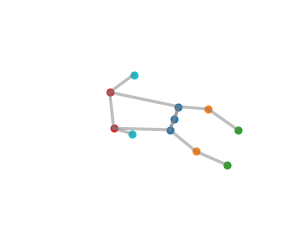

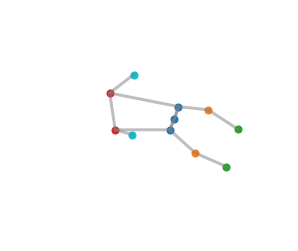

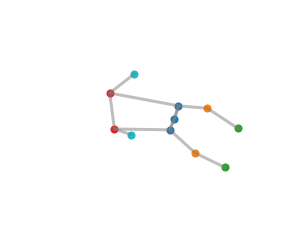

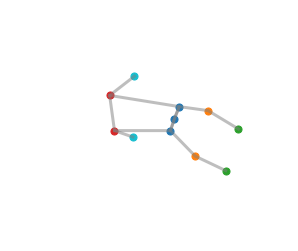

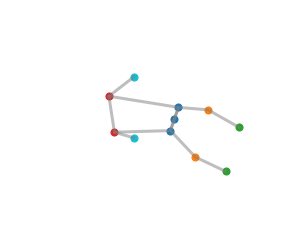

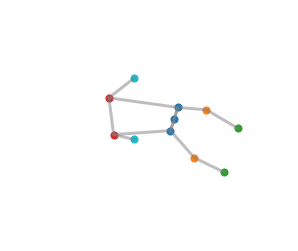

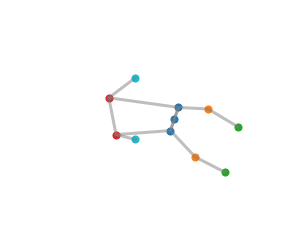

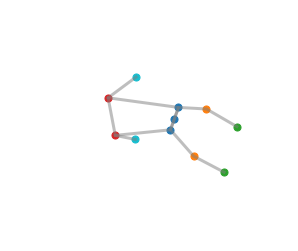

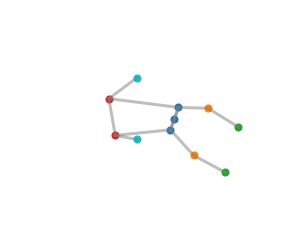

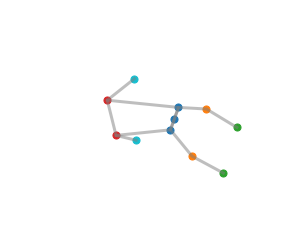

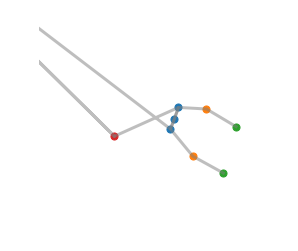

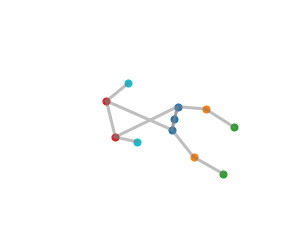

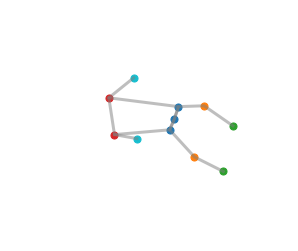

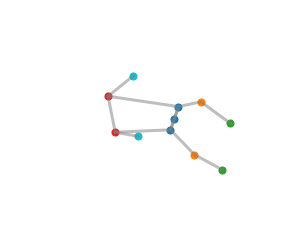

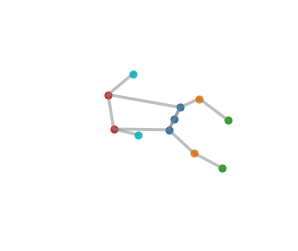

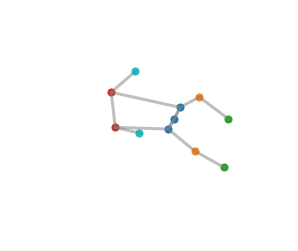

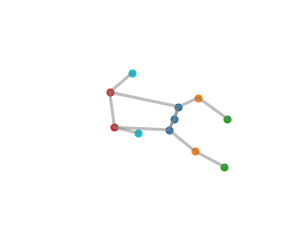

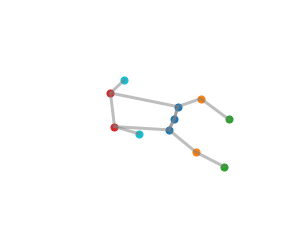

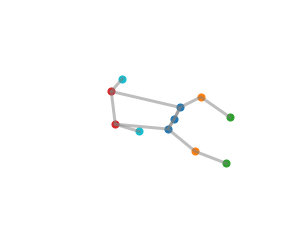

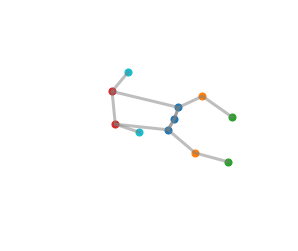

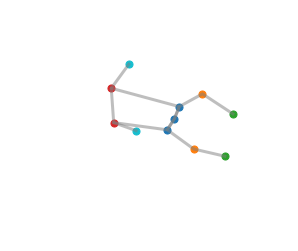

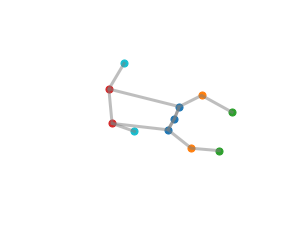

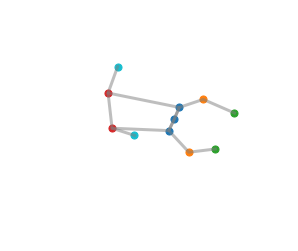

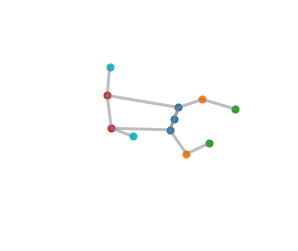

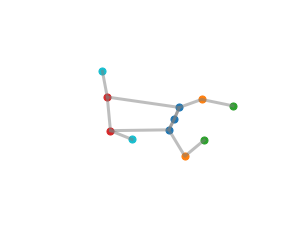

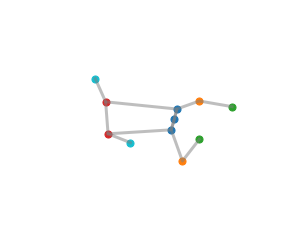

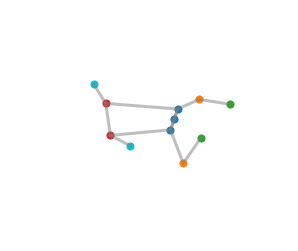

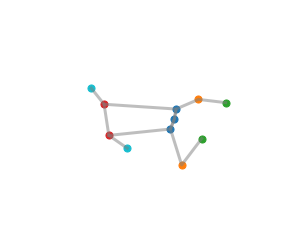

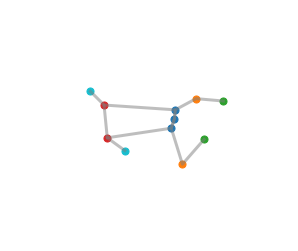

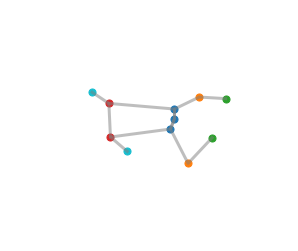

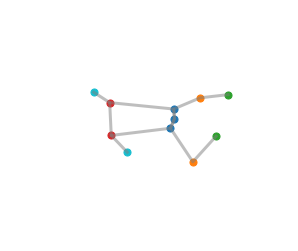

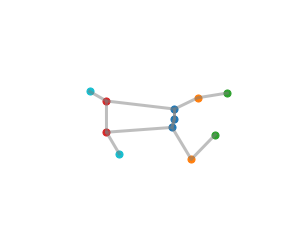

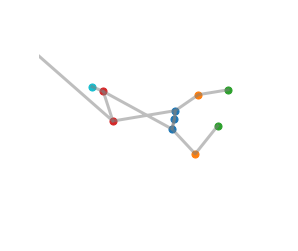

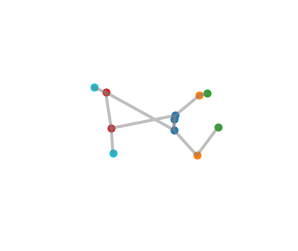

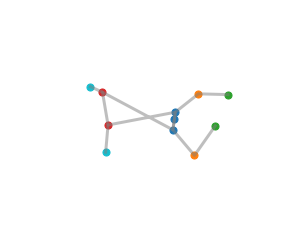

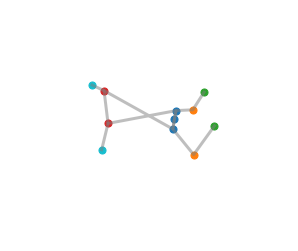

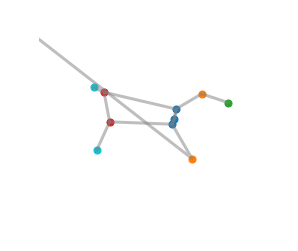

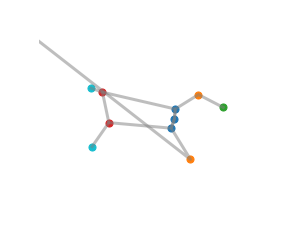

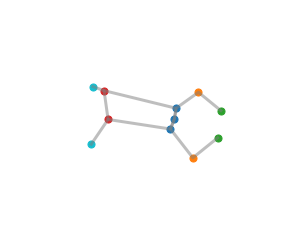

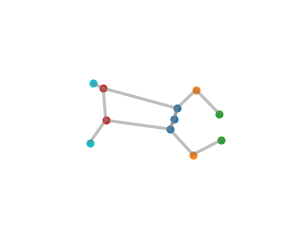

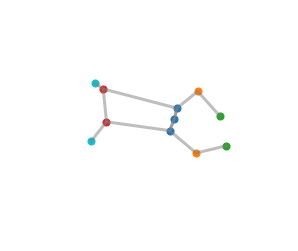

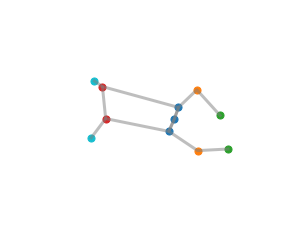

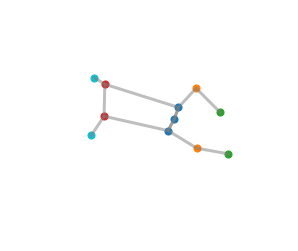

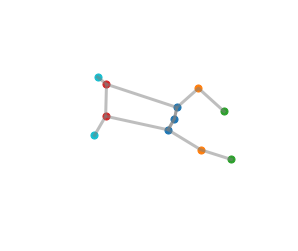

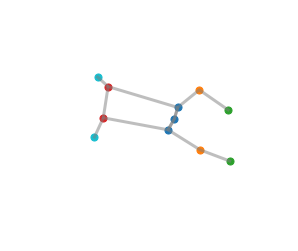

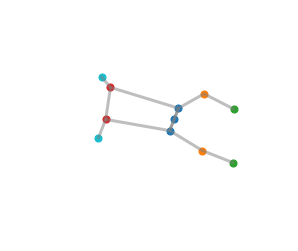

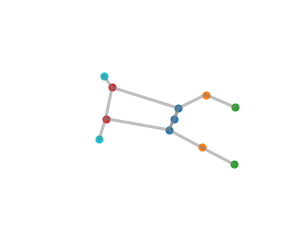

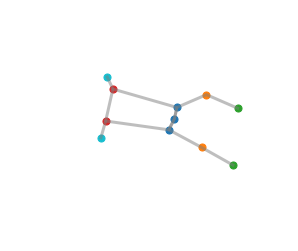

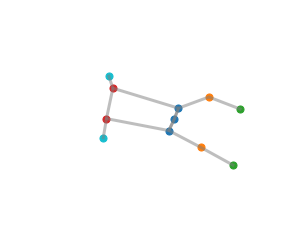

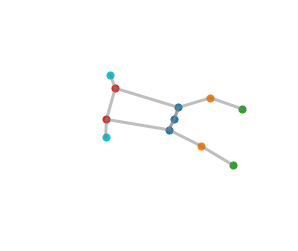

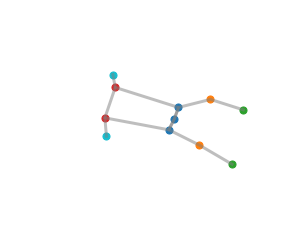

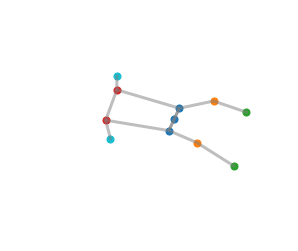

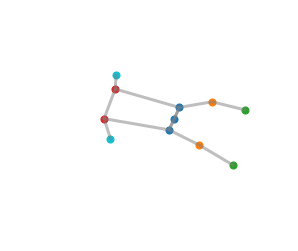

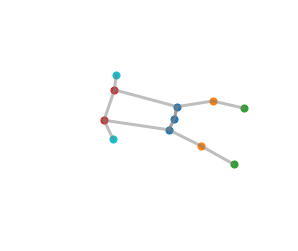

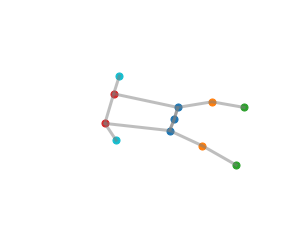

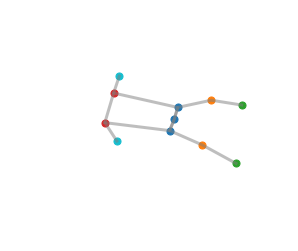

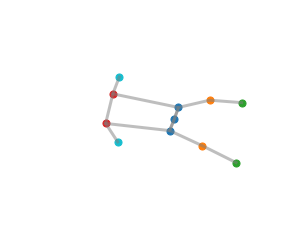

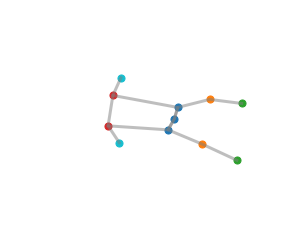

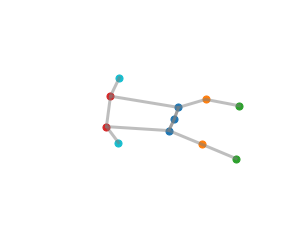

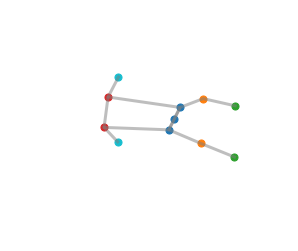

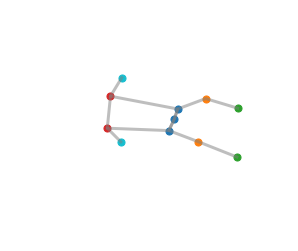

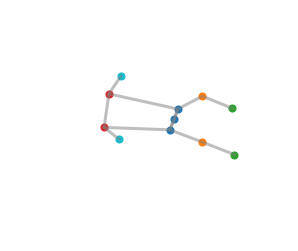

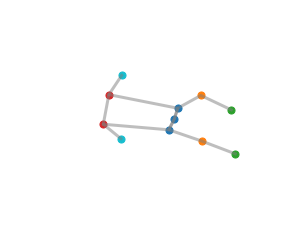

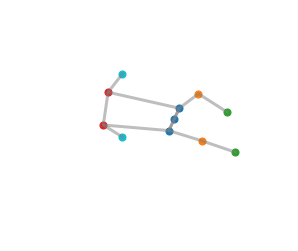

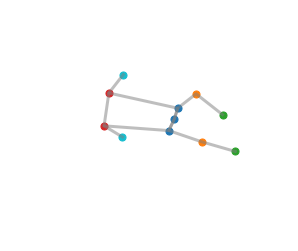

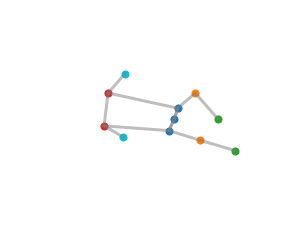

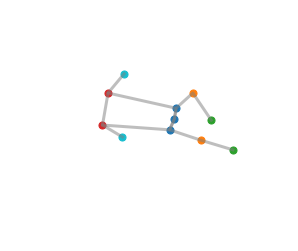

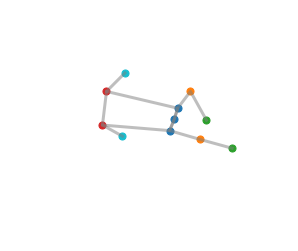

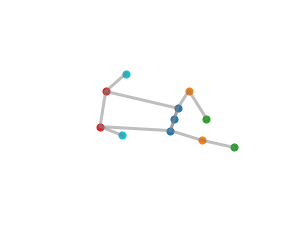

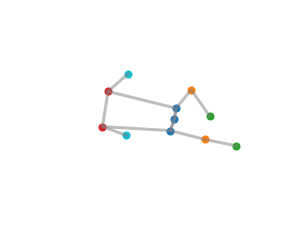

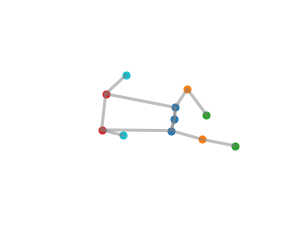

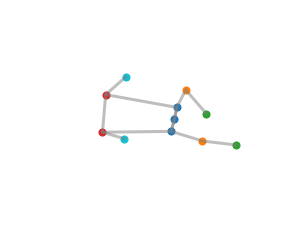

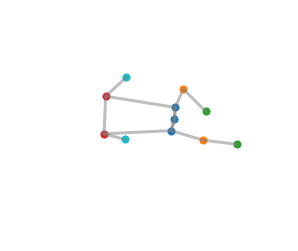

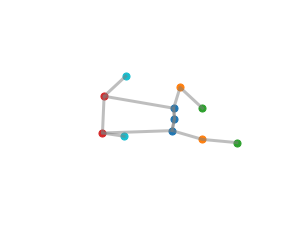

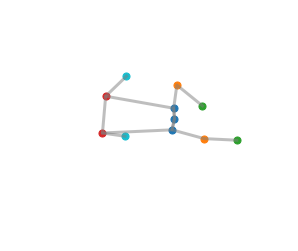

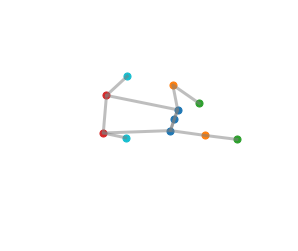

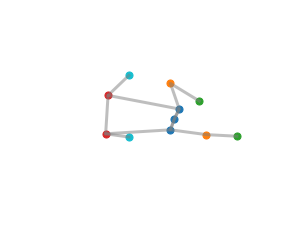

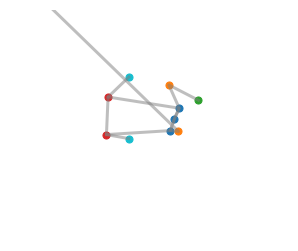

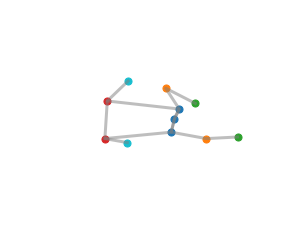

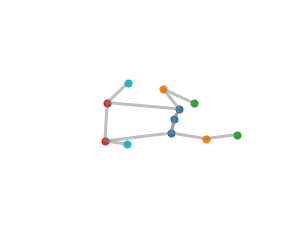

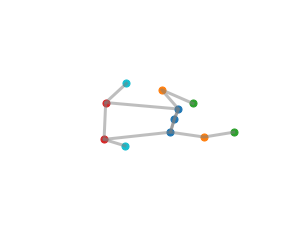

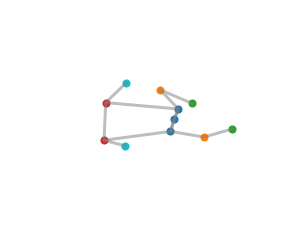

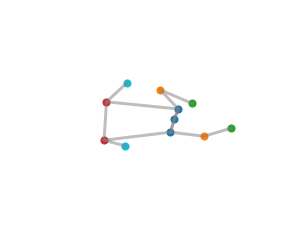

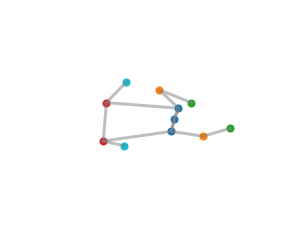

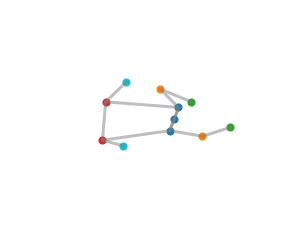

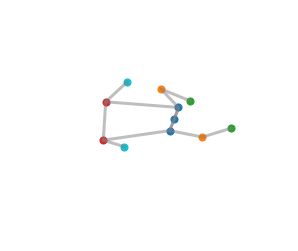

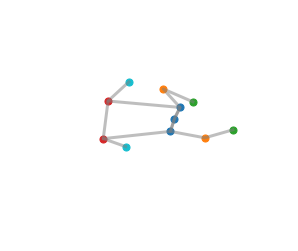

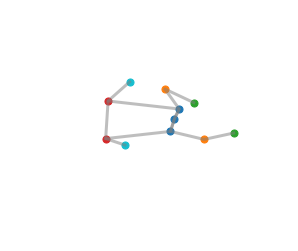

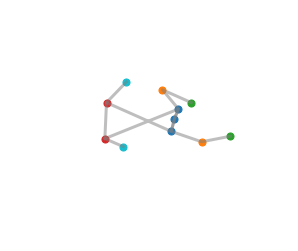

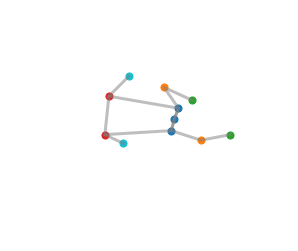

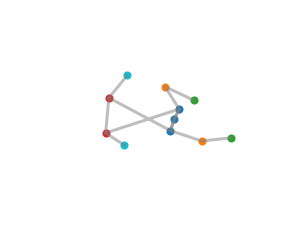

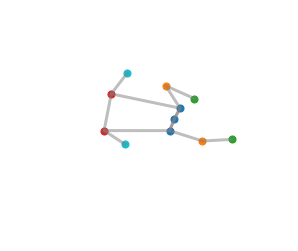

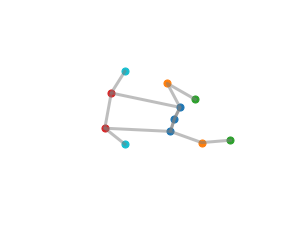

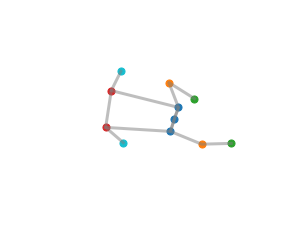

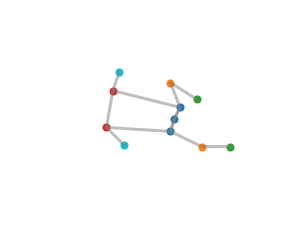

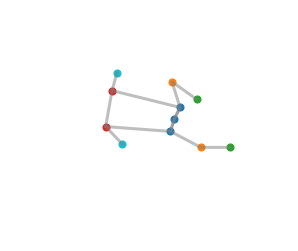

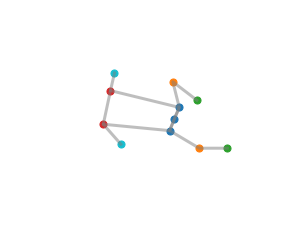

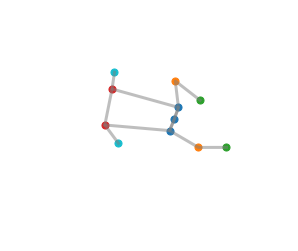

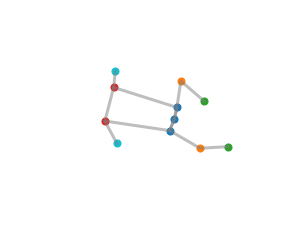

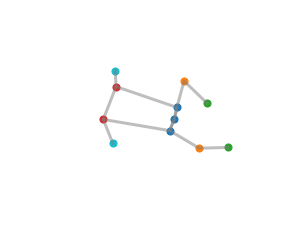

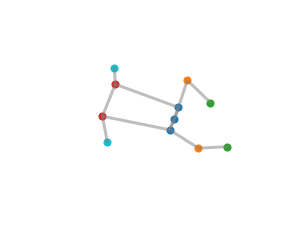

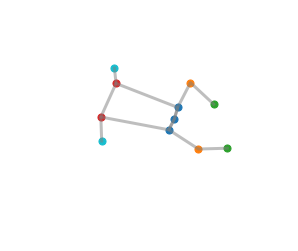

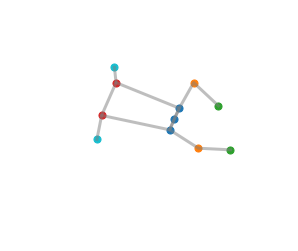

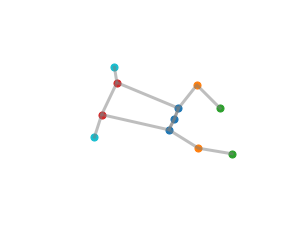

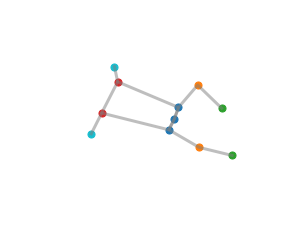

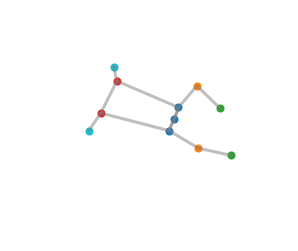

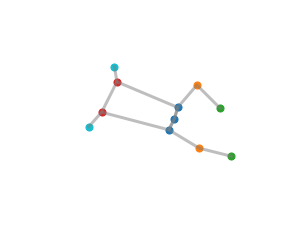

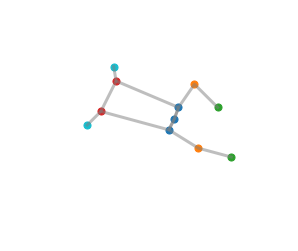

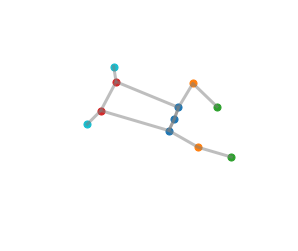

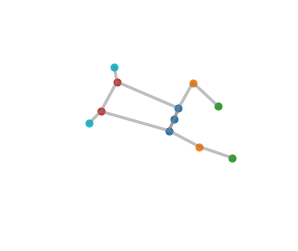

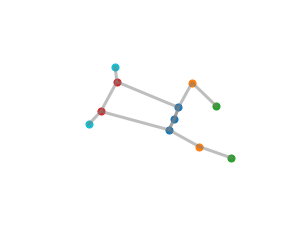

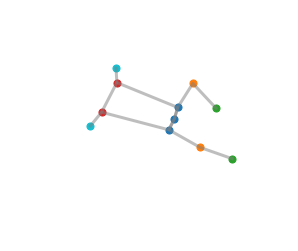

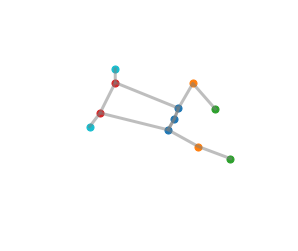

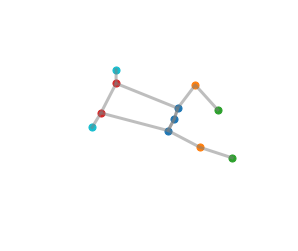

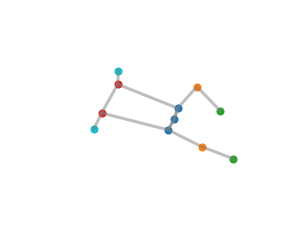

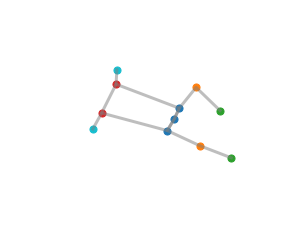

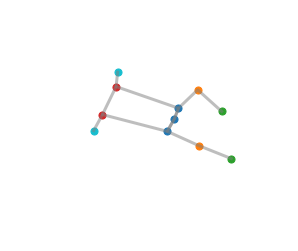

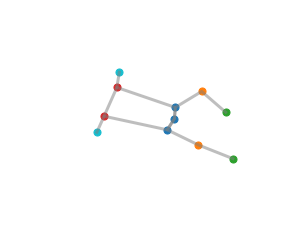

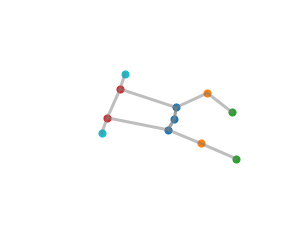

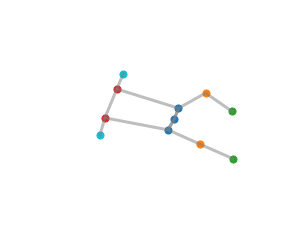

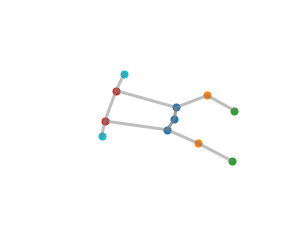

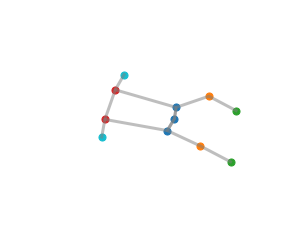

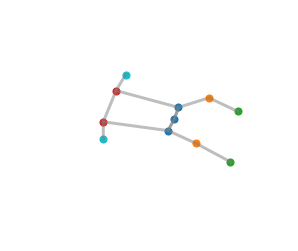

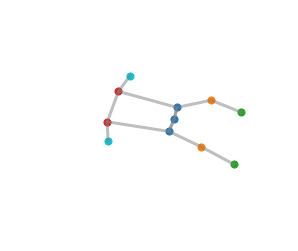

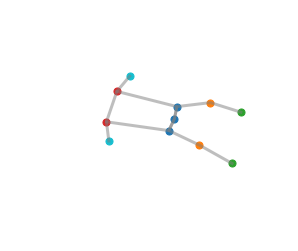

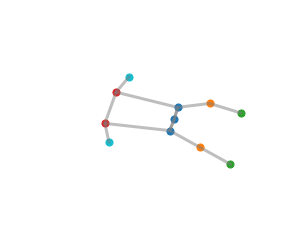

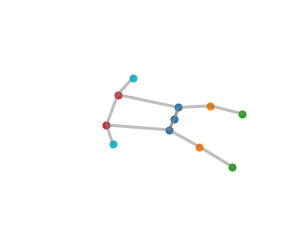

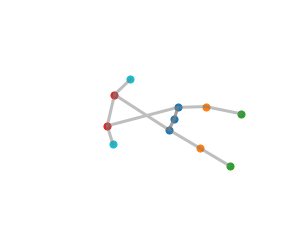

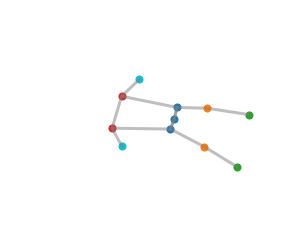

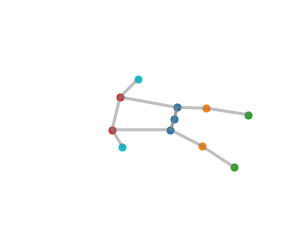

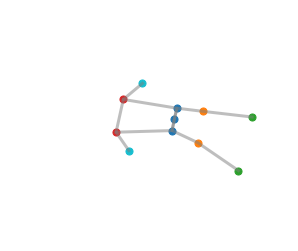

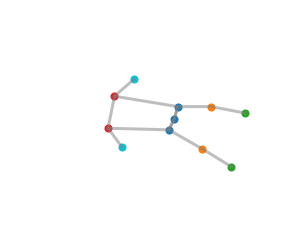

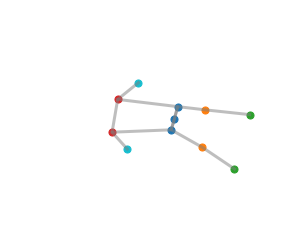

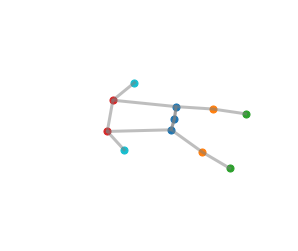

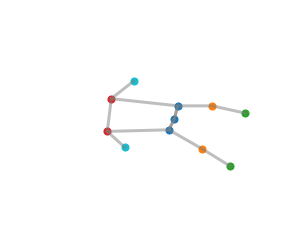

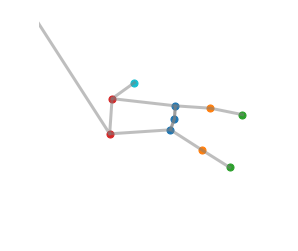

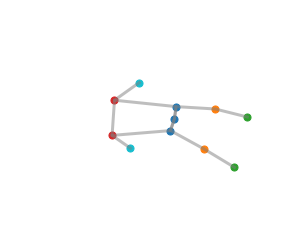

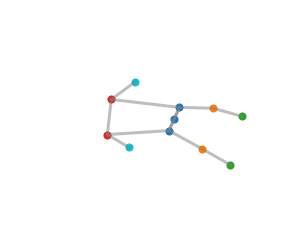

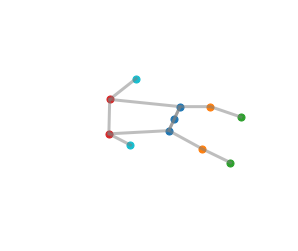

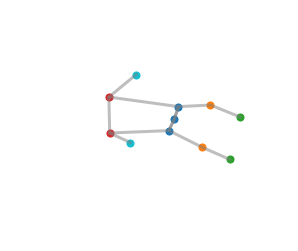

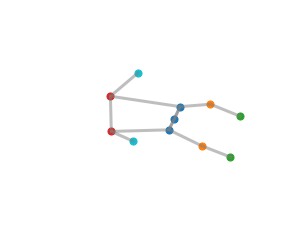

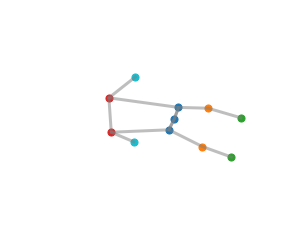

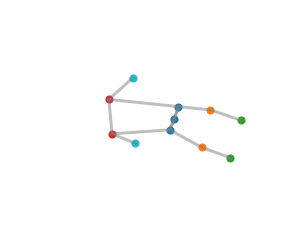

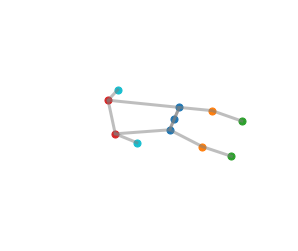

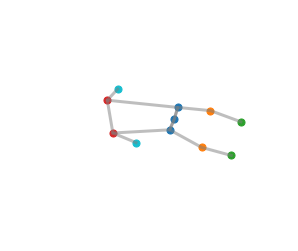

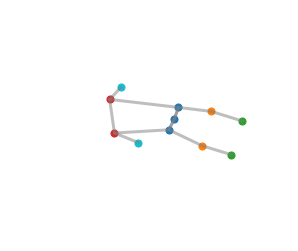

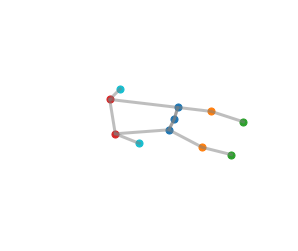

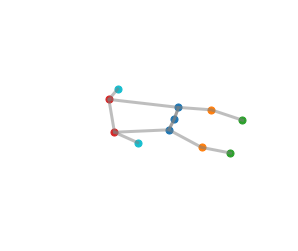

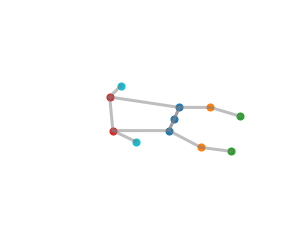

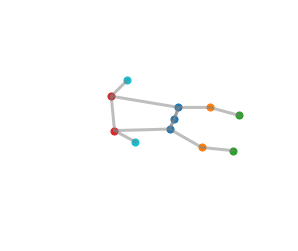

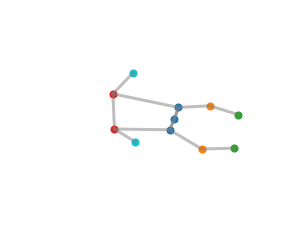

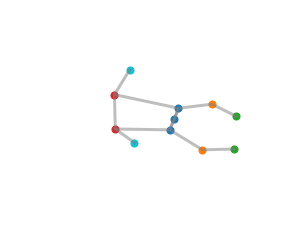

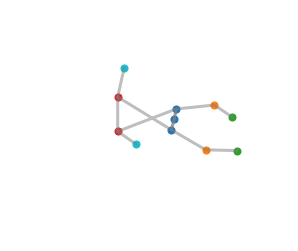

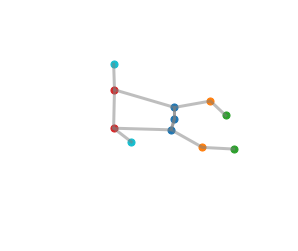

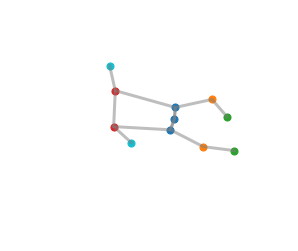

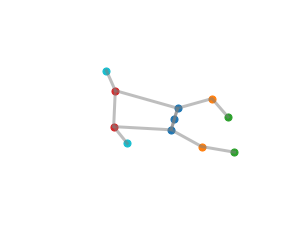

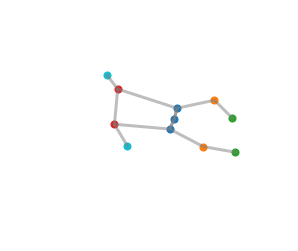

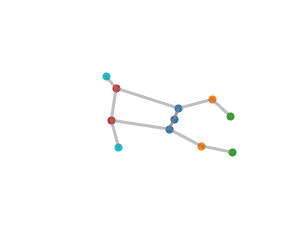

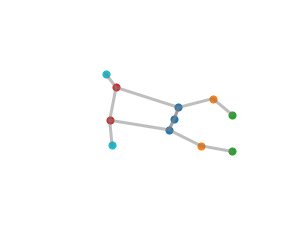

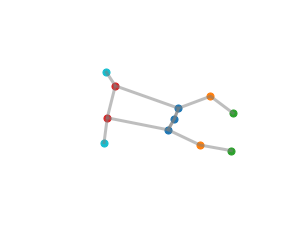

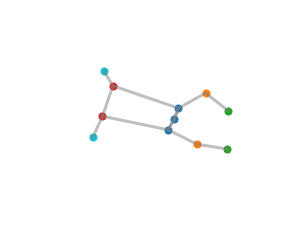

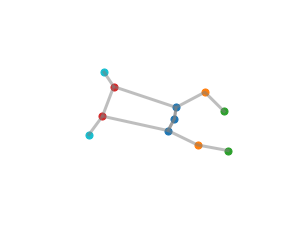

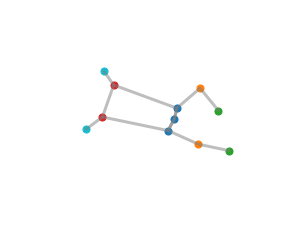

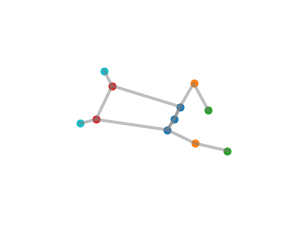

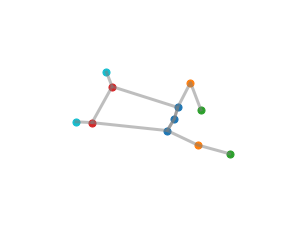

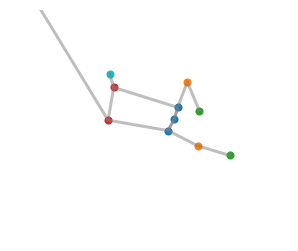

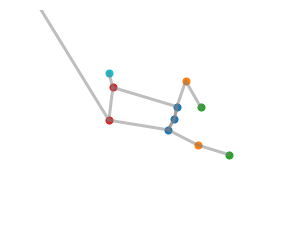

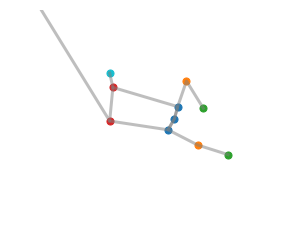

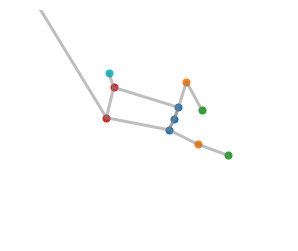

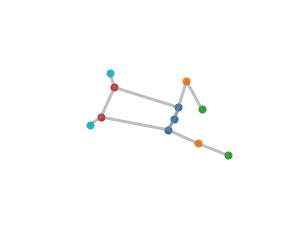

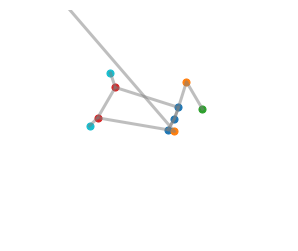

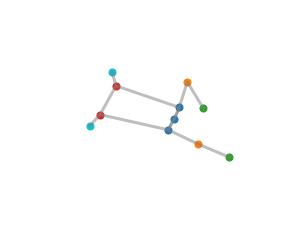

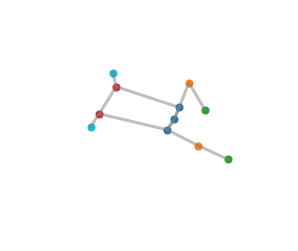

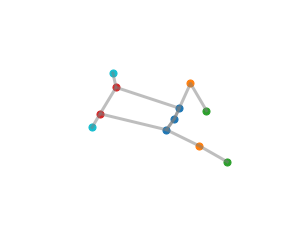

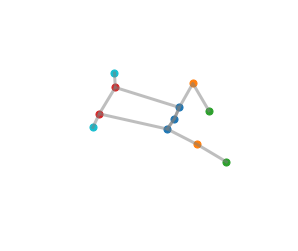

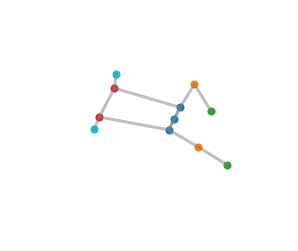

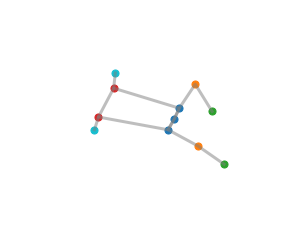

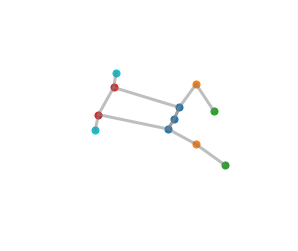

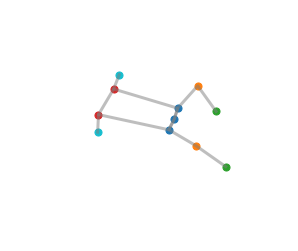

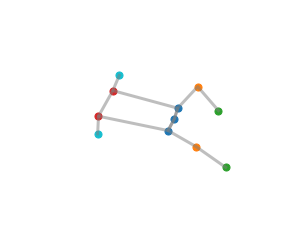

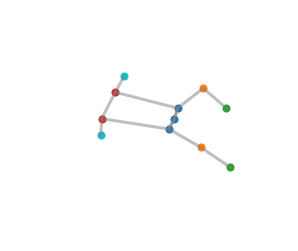

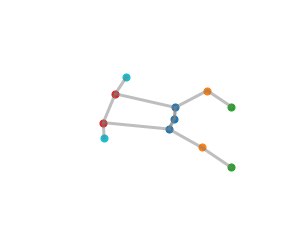

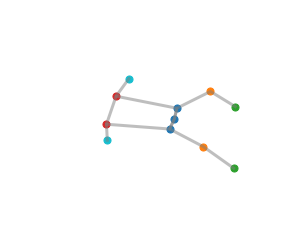

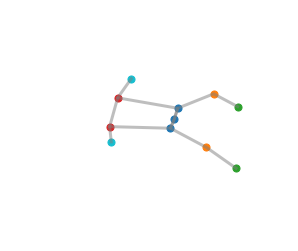

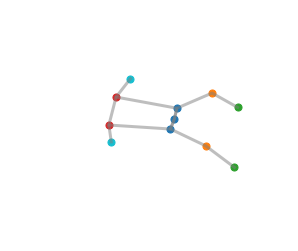

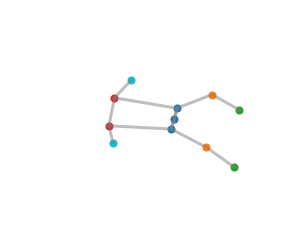

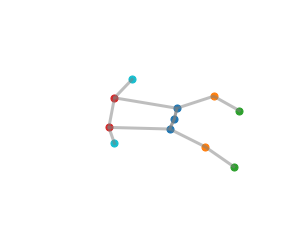

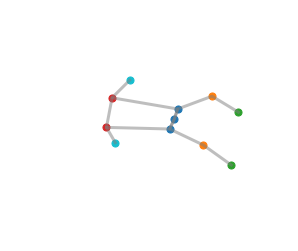

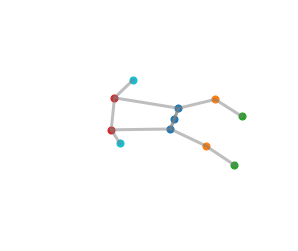

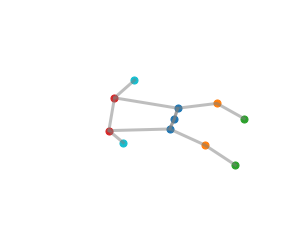

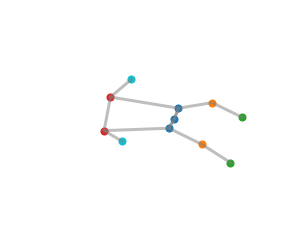

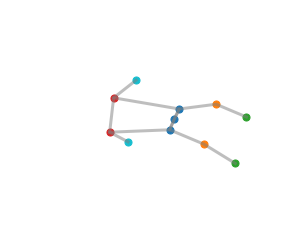

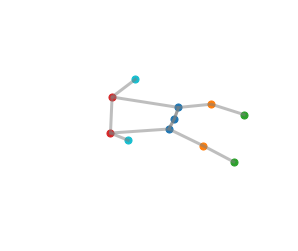

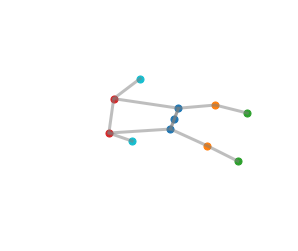

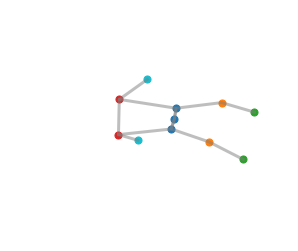

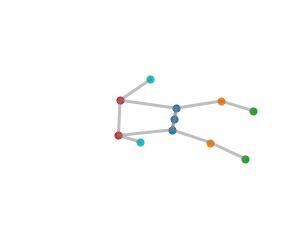

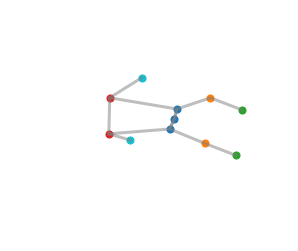

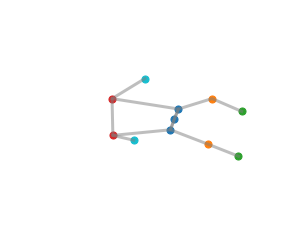

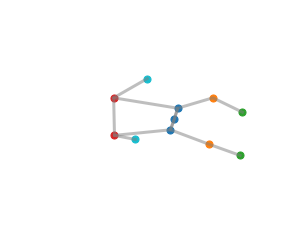

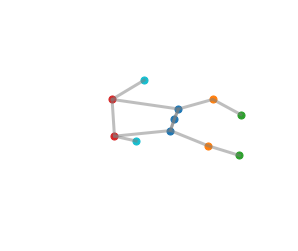

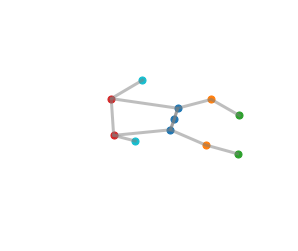

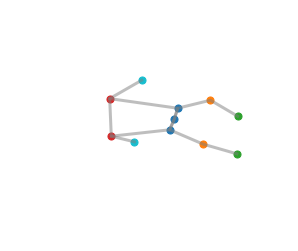

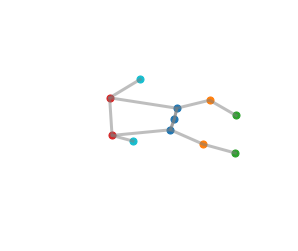

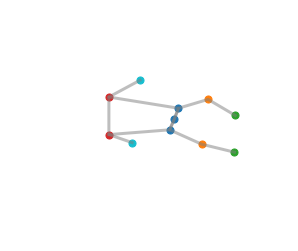

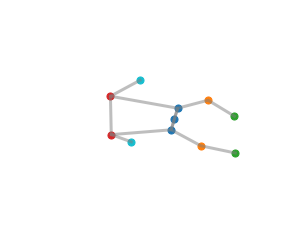

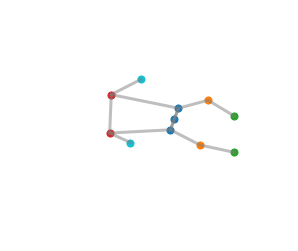

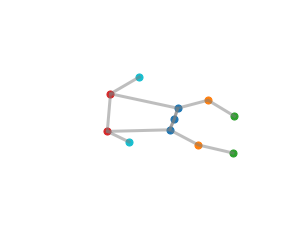

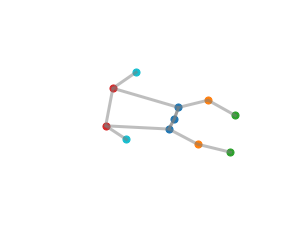

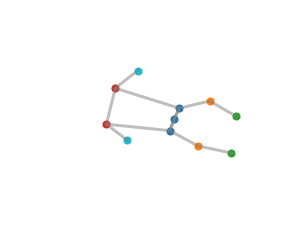

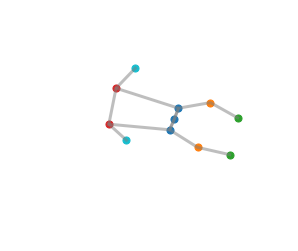

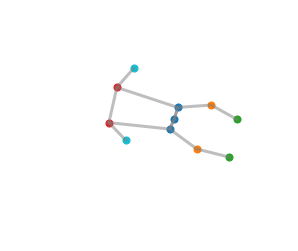

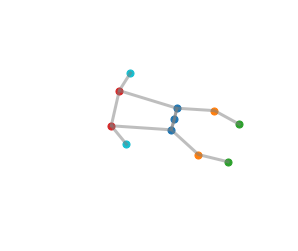

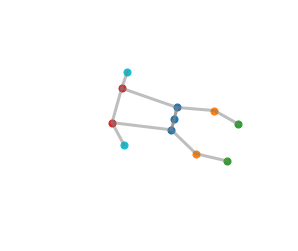

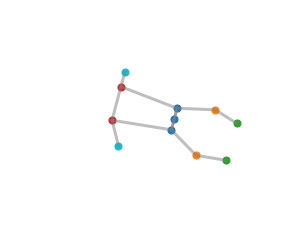

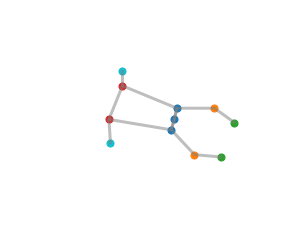

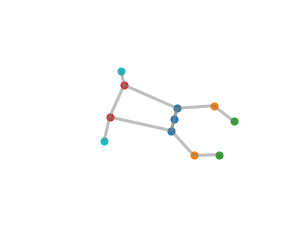

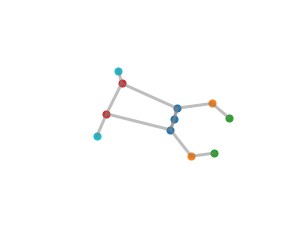

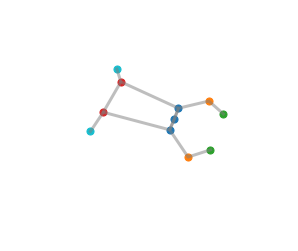

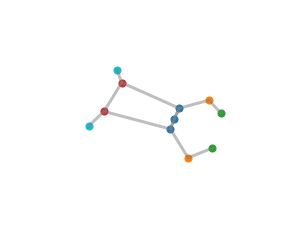

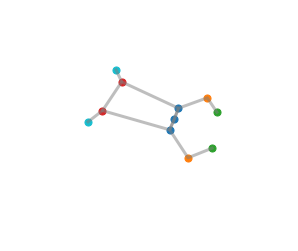

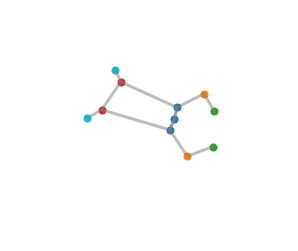

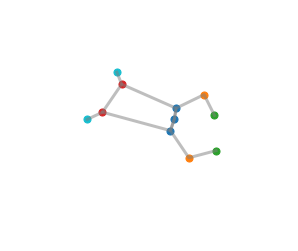

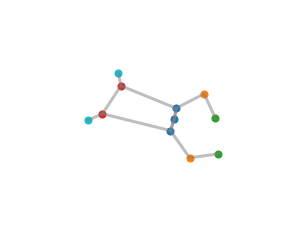

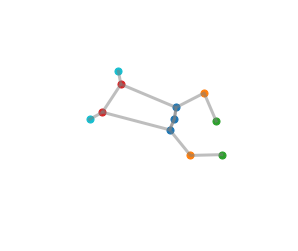

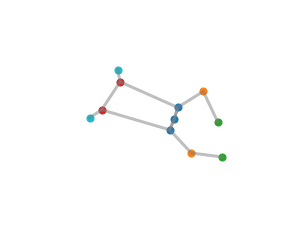

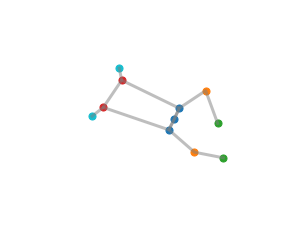

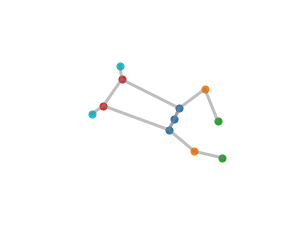

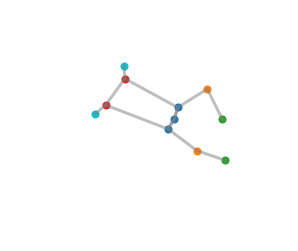

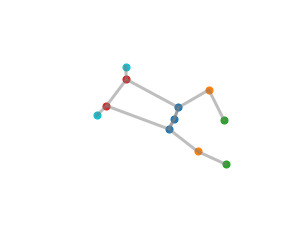

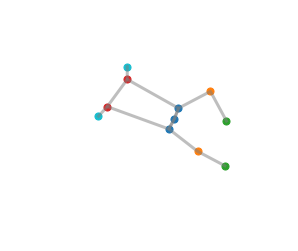

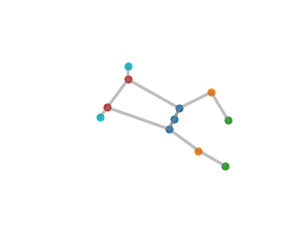

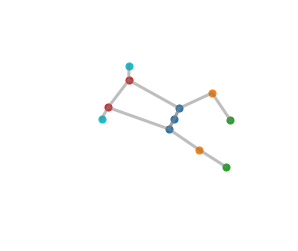

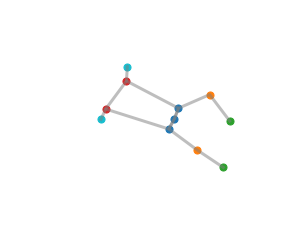

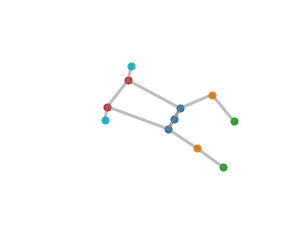

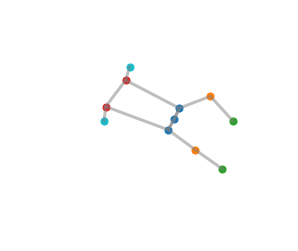

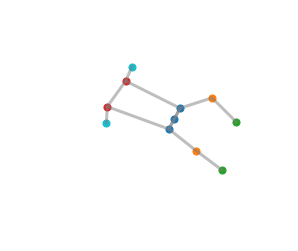

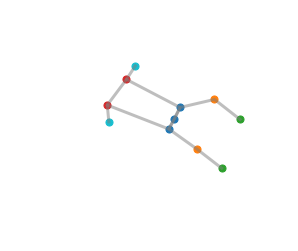

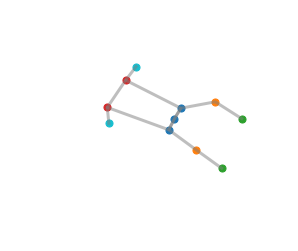

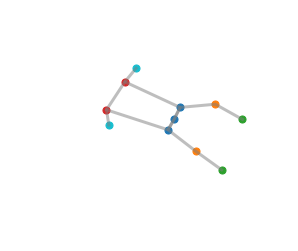

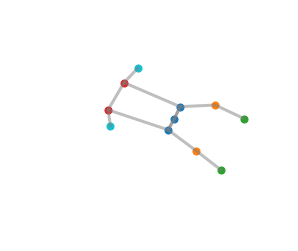

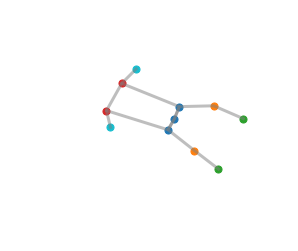

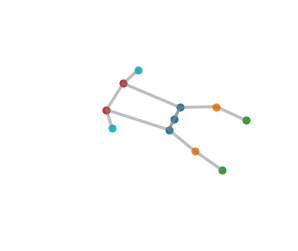

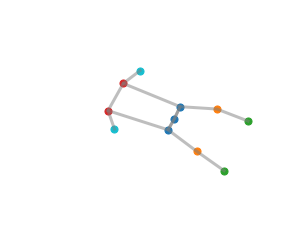

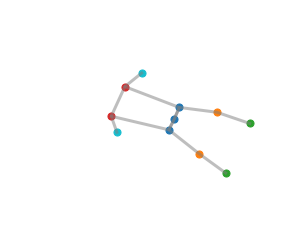

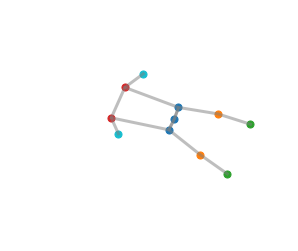

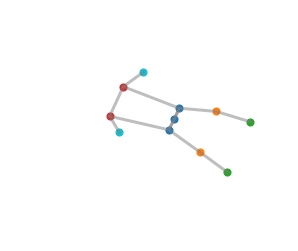

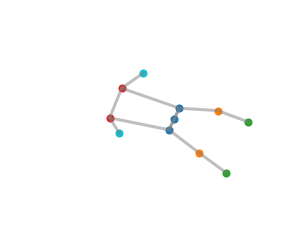

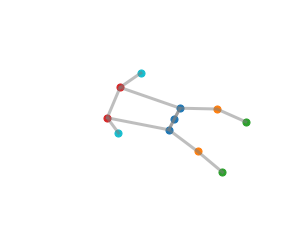

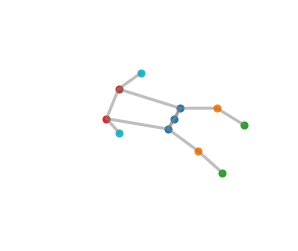

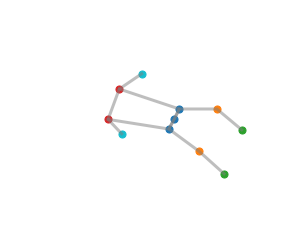

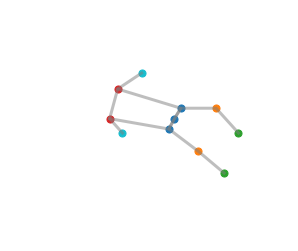

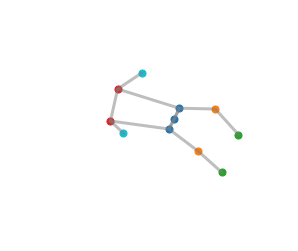

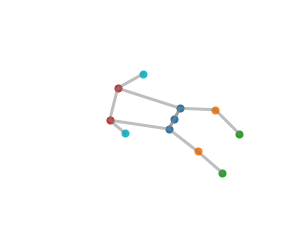

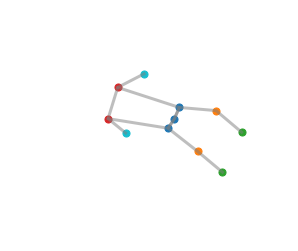

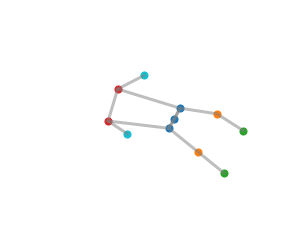

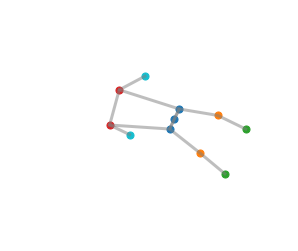

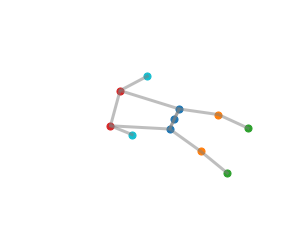

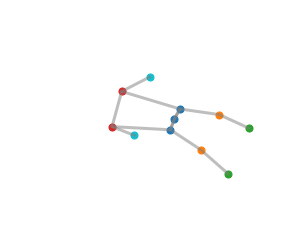

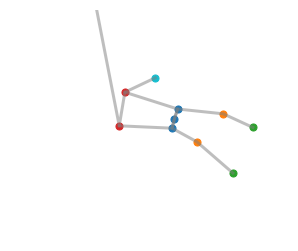

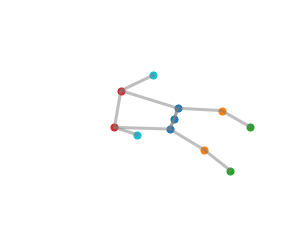

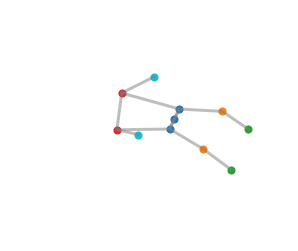

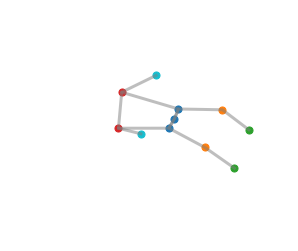

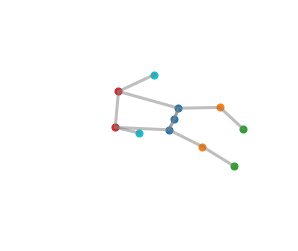

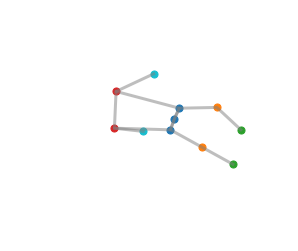

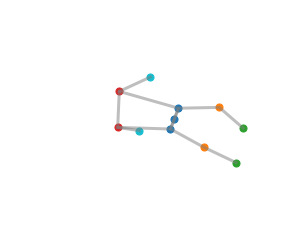

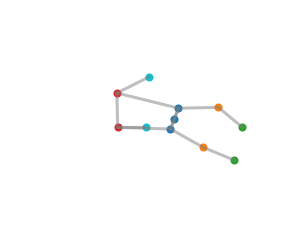

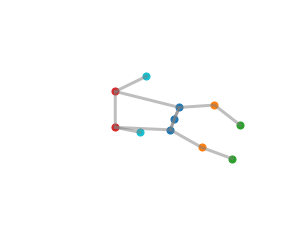

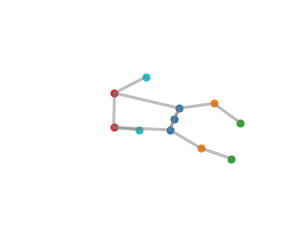

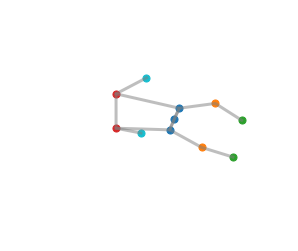

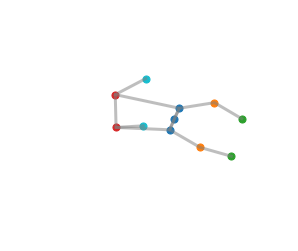

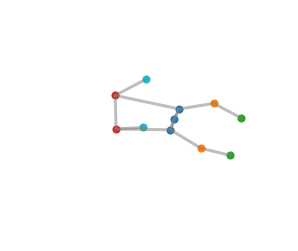

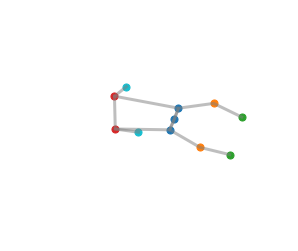

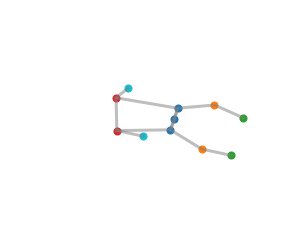

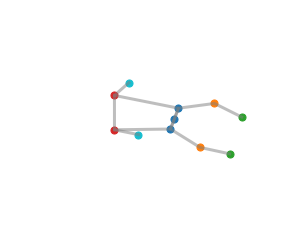

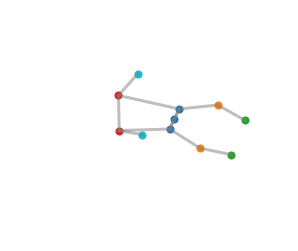

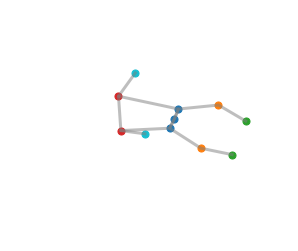

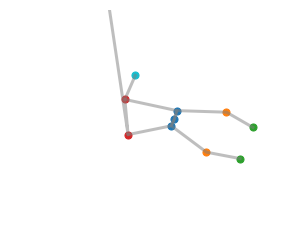

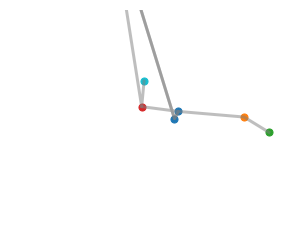

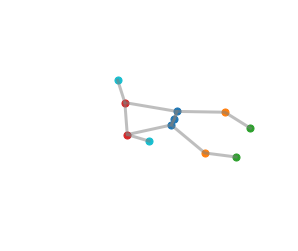

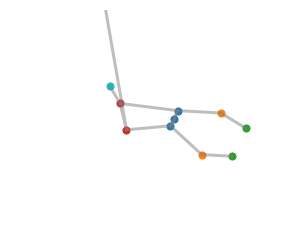

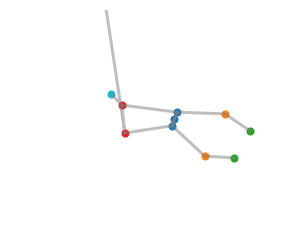

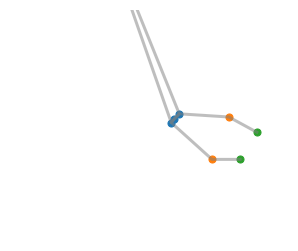

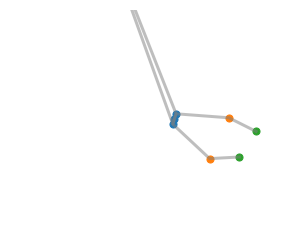

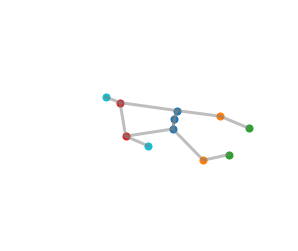

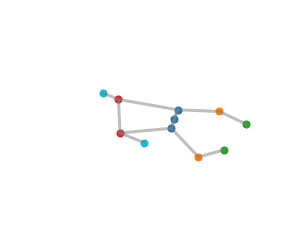

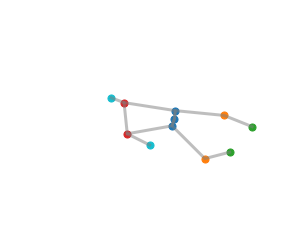

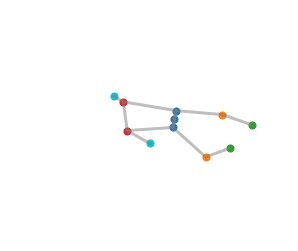

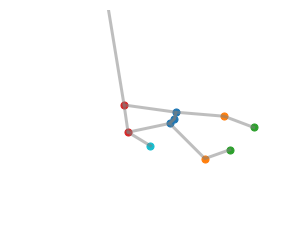

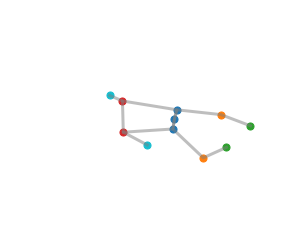

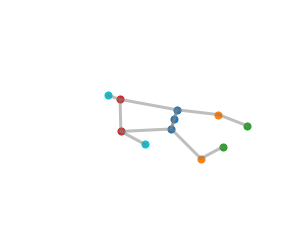

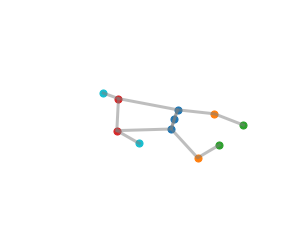

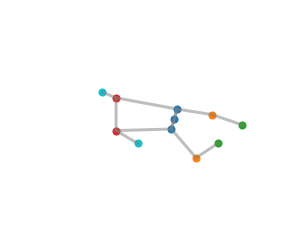

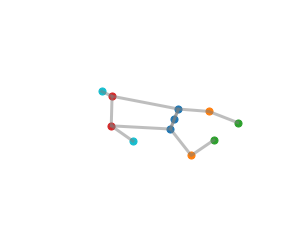

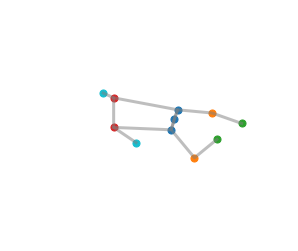

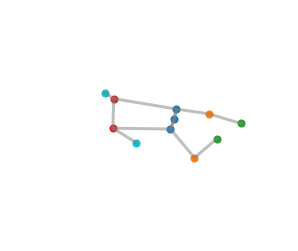

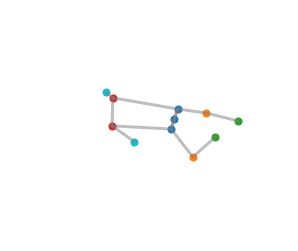

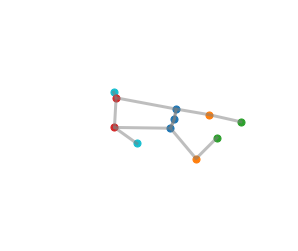

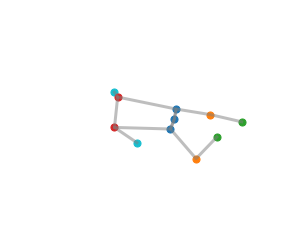

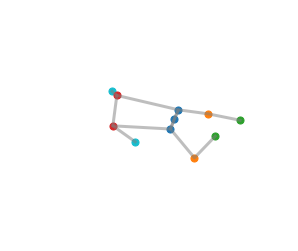

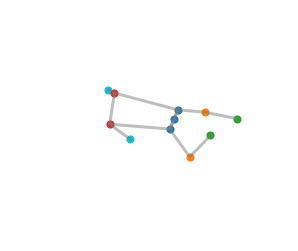

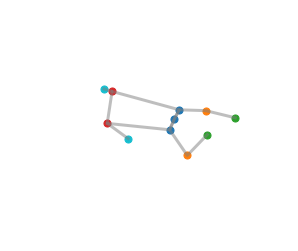

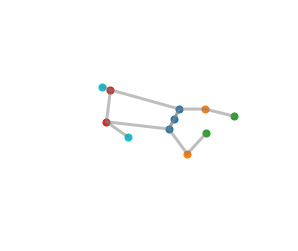

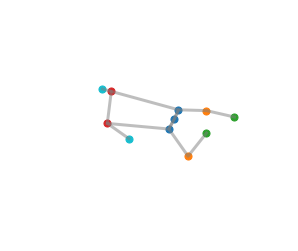

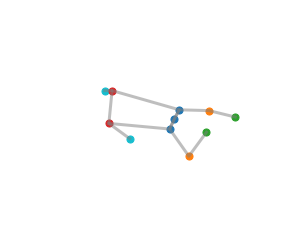

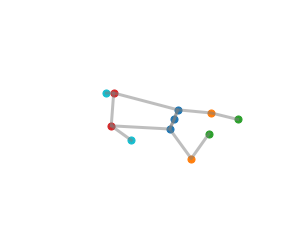

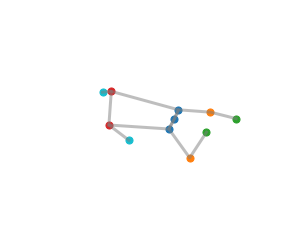

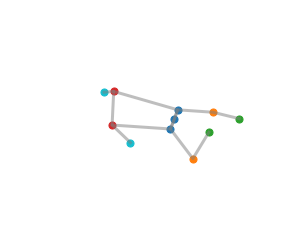

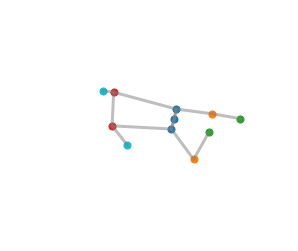

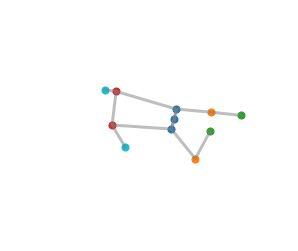

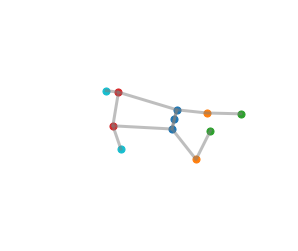

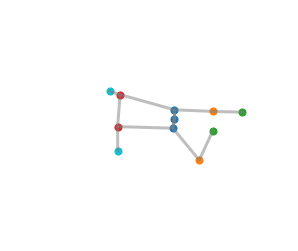

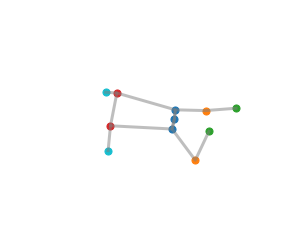

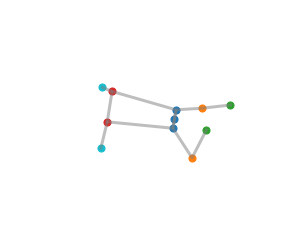

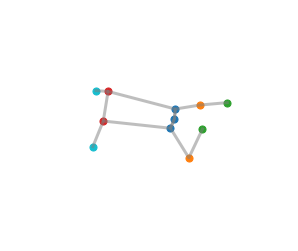

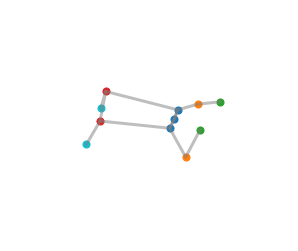

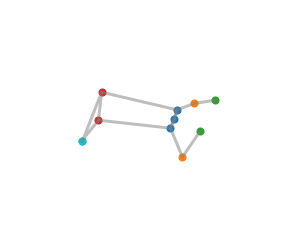

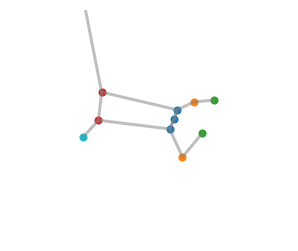

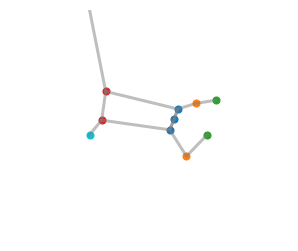

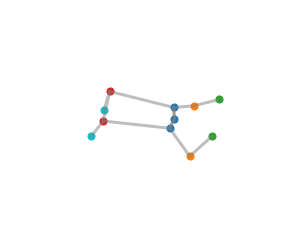

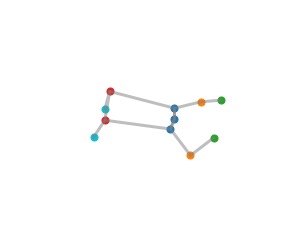

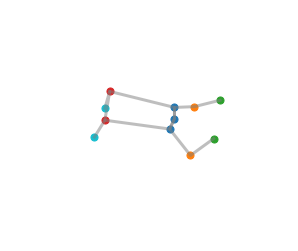

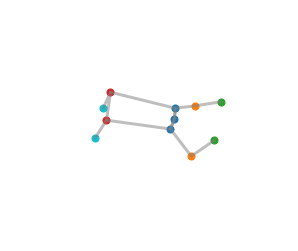

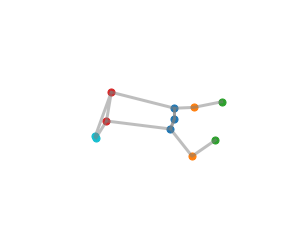

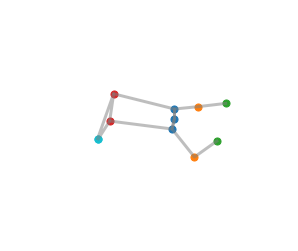

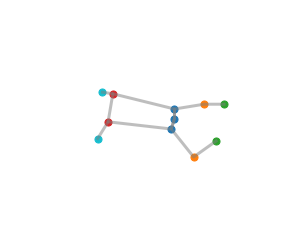

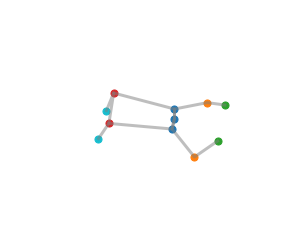

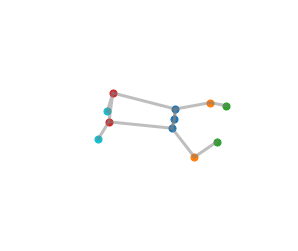

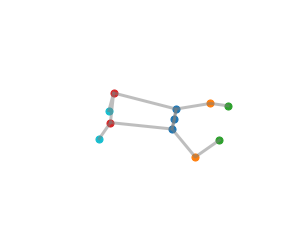

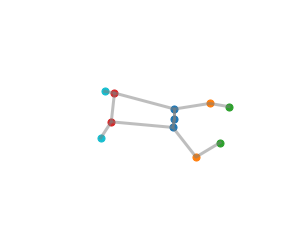

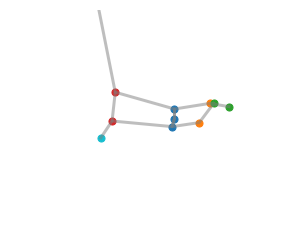

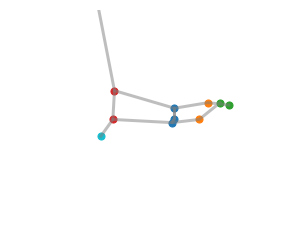

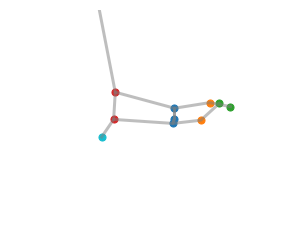

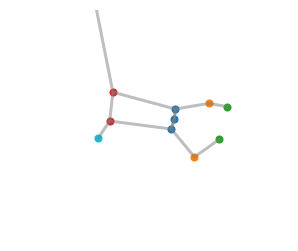

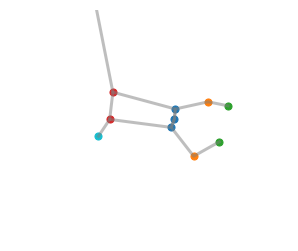

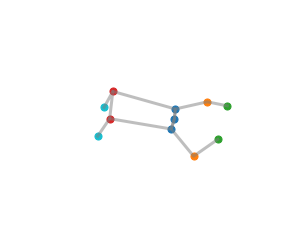

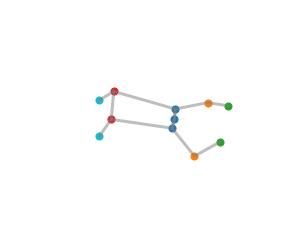

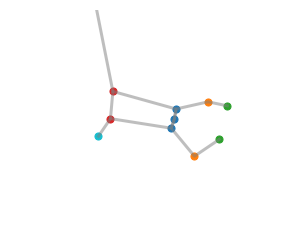

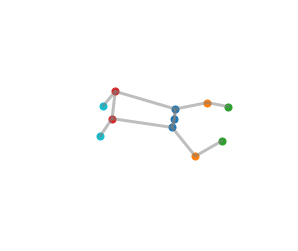

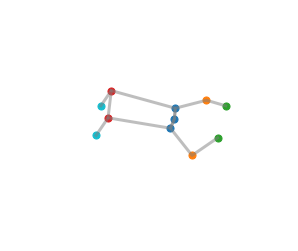

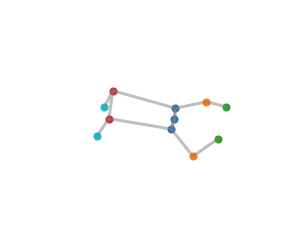

In [26]:
hipX=[]
hipY=[]
legRX=[]
legRY=[]
legLX=[]
legLY=[]
rH = np.array([])
lH = np.array([])

ElR = []
ElL = []
KnR = []
KnL = []

for j in range(0,533,1):
    with open('./output/Takuto_000000000'+"{0:0=3d}".format(j)+'_keypoints.json') as f:   
        data = json.load(f)
        twoD = data['people'][0]['pose_keypoints_2d']
        WCX = twoD[24]
        WCY = twoD[25]
        
        for k in np.arange(0,len(twoD),3):
            twoD[k] -= WCX
        for k in np.arange(1,len(twoD),3):
            twoD[k] -= WCY

        
        lendata = len(twoD)
        plt.figure()
        #rH = np.append(rH,np.array([twoD[12], twoD[13]]),axis=1)
        #lH = np.append(lH,[twoD[21], twoD[22]])
        
        #plt.scatter( np.take(twoD, np.arange(0,len(twoD),3)) , np.take(twoD, np.arange(1,len(twoD),3)) )
        #plt.scatter( twoD[9] , twoD[10] )
        #plt.scatter( twoD[12] , twoD[13] )
        #plt.scatter( twoD[12] , twoD[13] )
        
        
        plt.plot([twoD[9],twoD[6],twoD[15],twoD[18]],[-twoD[10],-twoD[7],-twoD[16],-twoD[19]],c = tableau10[7],lw=3, alpha = 0.5)
        plt.plot([twoD[6],twoD[27],twoD[24],twoD[36],twoD[15]],[-twoD[7],-twoD[28],-twoD[25],-twoD[37],-twoD[16]],c = tableau10[7],lw=3, alpha = 0.5)
        plt.plot([twoD[33],twoD[30],twoD[27],twoD[24],twoD[36],twoD[39],twoD[42]],[-twoD[34],-twoD[31],-twoD[28],-twoD[25],-twoD[37],-twoD[40],-twoD[43]],c = tableau10[7],lw=3, alpha = 0.5)
        
        
        #plt.scatter( twoD[1] , twoD[2] )
        # Right Elbow
        plt.scatter( twoD[9] , -twoD[10] , c=tableau10[9],s=50)
        # Left Elbow
        plt.scatter( twoD[18] , -twoD[19] , c=tableau10[9],s=50)
        # Right Shoulder
        plt.scatter( twoD[6] , -twoD[7] , c=tableau10[3],s=50)
        # Left Shoulder
        plt.scatter( twoD[15] , -twoD[16] , c=tableau10[3],s=50)
        # Central Waist
        plt.scatter( twoD[24] , -twoD[25] , c =tableau10[0],s=50)
        # Right Waist
        plt.scatter( twoD[27] , -twoD[28] , c =tableau10[0],s=50)
        # Left Waist
        plt.scatter( twoD[36] , -twoD[37] , c =tableau10[0],s=50)
        # Right Knee
        plt.scatter( twoD[30] , -twoD[31] , c =tableau10[1],s=50)
        # Left Knee
        plt.scatter( twoD[39] , -twoD[40] , c =tableau10[1],s=50)
        # Right foot
        plt.scatter( twoD[33] , -twoD[34] , c =tableau10[2],s=50)
        # Left foot
        plt.scatter( twoD[42] , -twoD[43] , c =tableau10[2],s=50)
        plt.xlim(-500,400)
        plt.ylim(-400,400)
        plt.axes().set_aspect('equal')
        
        
        plt.axis('off')
        
        hipX.append(twoD[24])
        hipY.append(twoD[25])
        ElR.append([twoD[9]-twoD[6],twoD[10]-twoD[7]])
        ElL.append([twoD[18]-twoD[15],twoD[19]-twoD[16]])
        KnR.append([twoD[27]-twoD[30],twoD[28]-twoD[31]])
        KnL.append([twoD[36]-twoD[39],twoD[37]-twoD[40]])        
        
        
        legRX.append(twoD[33])
        legRY.append(twoD[34])
        legLX.append(twoD[42])
        legLY.append(twoD[43])
        #plt.savefig('/Users/hidenoritanaka/Google Drive/ResearchNow/TakutoCrawling/Skelton/Takuto'+str(j)+'.png')

In [434]:
220/30

7.333333333333333

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


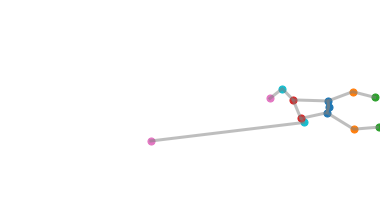

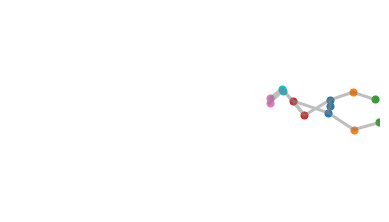

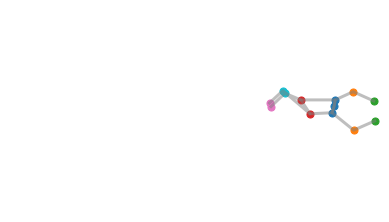

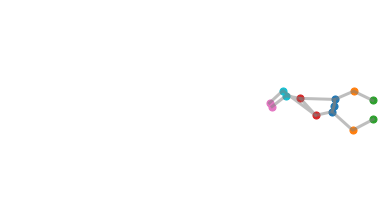

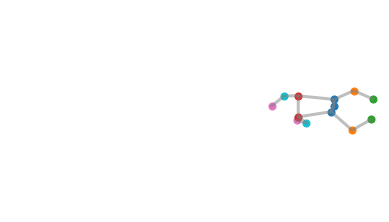

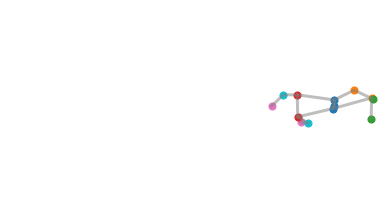

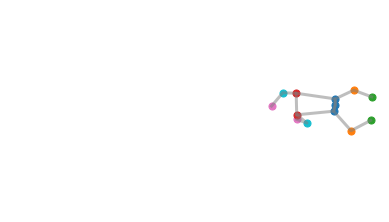

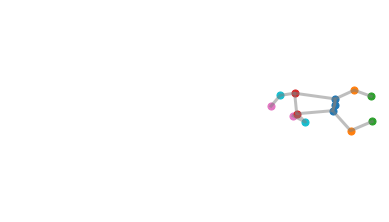

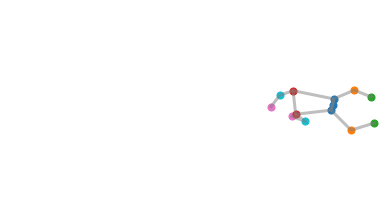

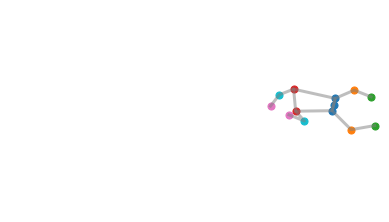

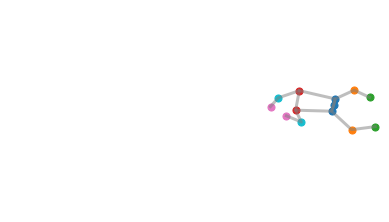

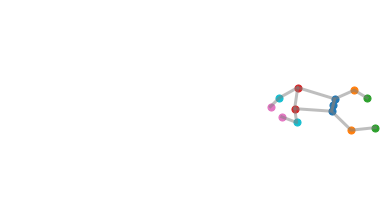

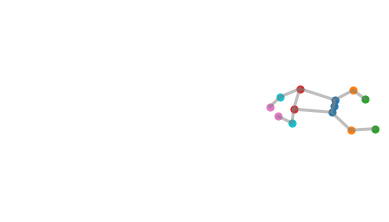

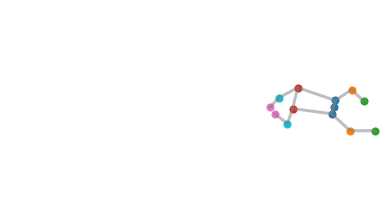

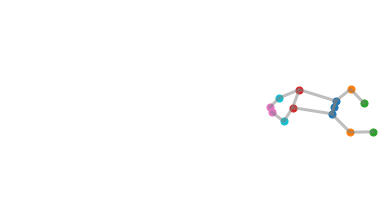

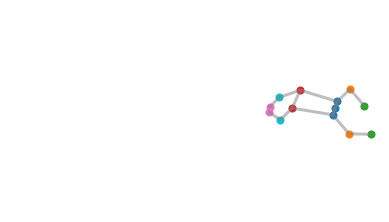

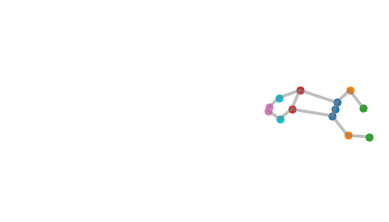

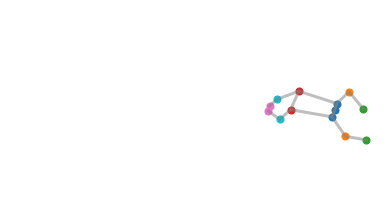

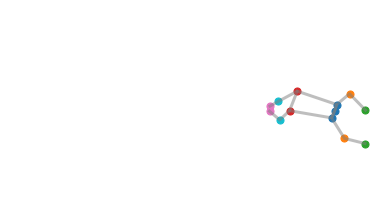

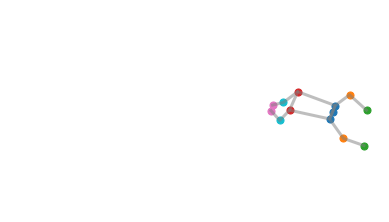

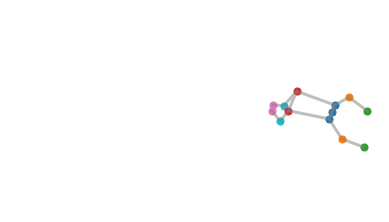

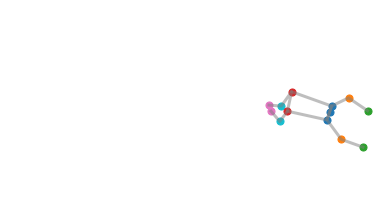

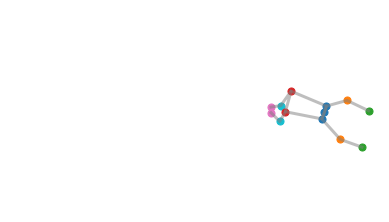

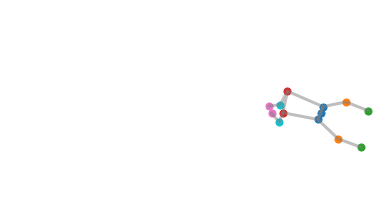

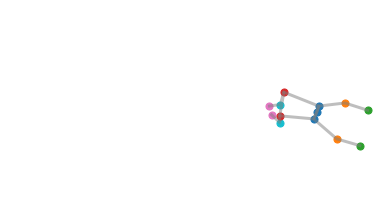

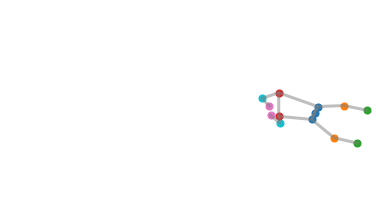

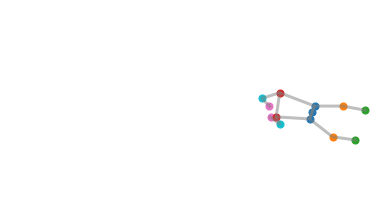

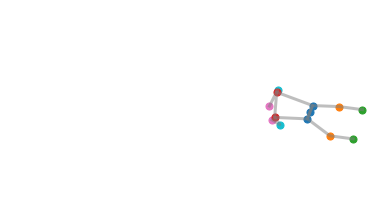

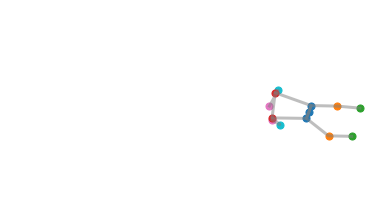

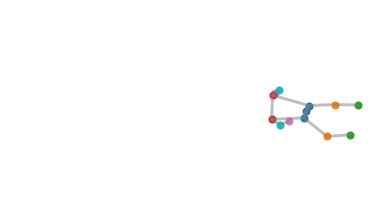

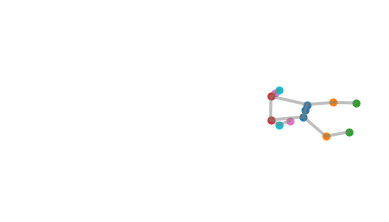

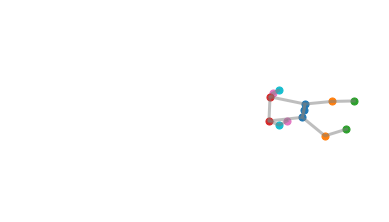

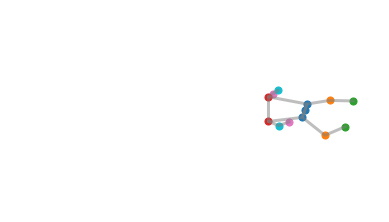

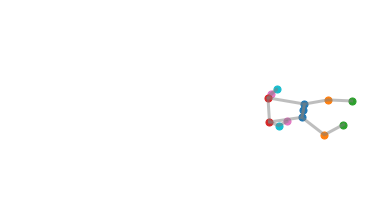

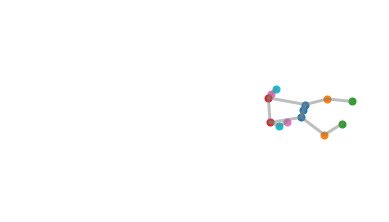

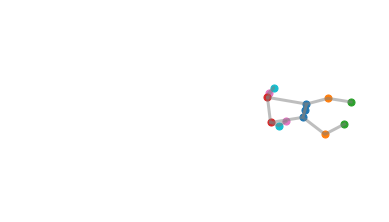

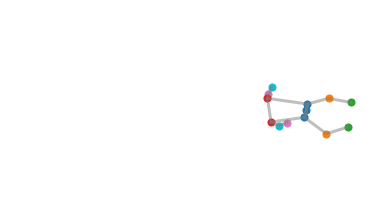

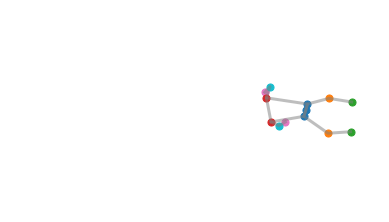

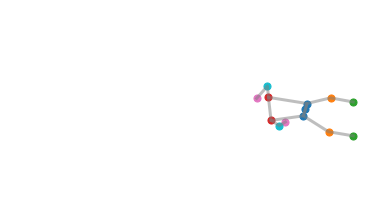

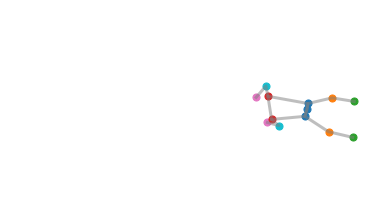

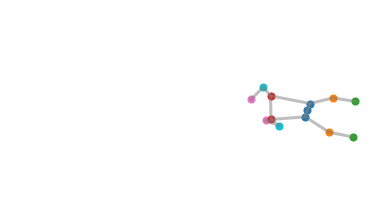

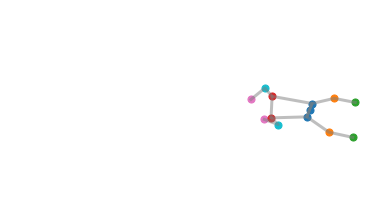

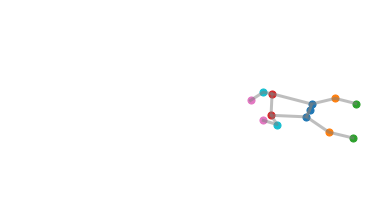

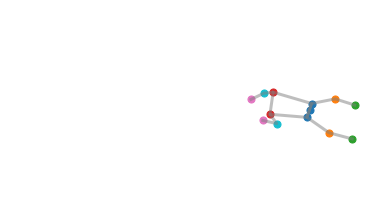

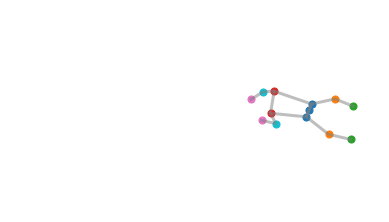

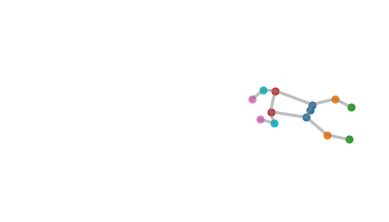

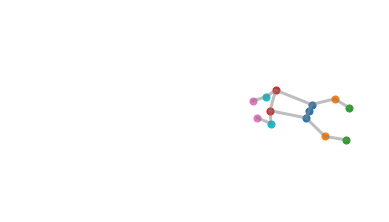

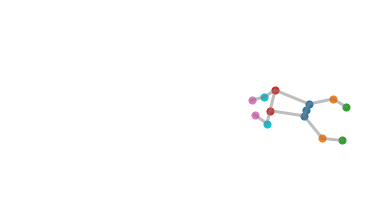

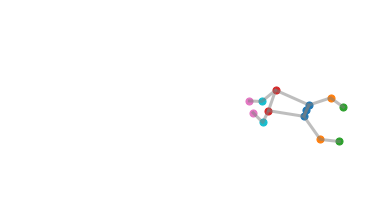

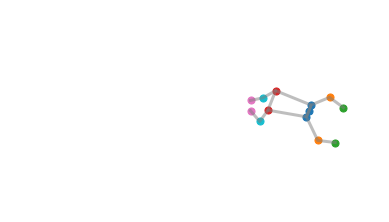

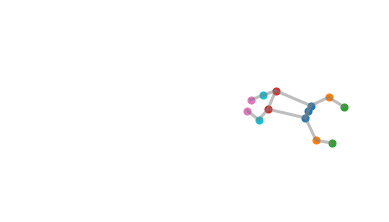

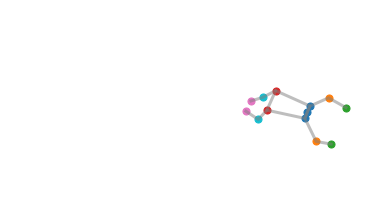

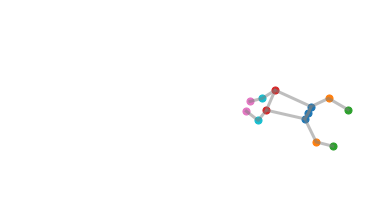

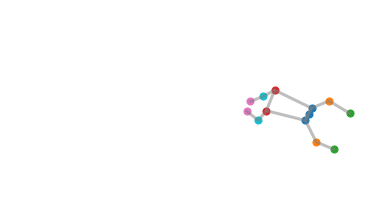

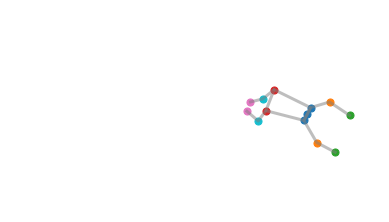

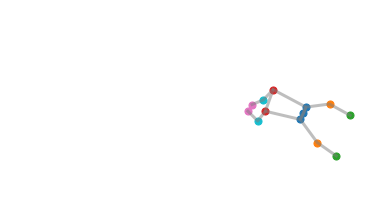

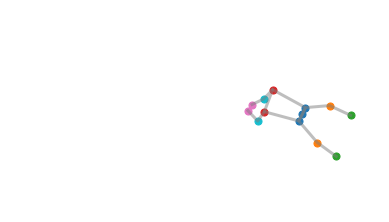

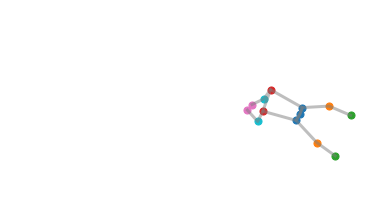

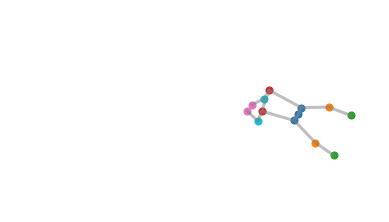

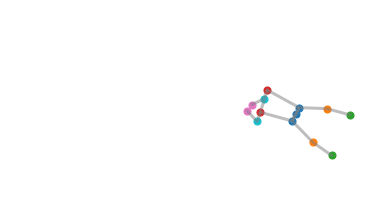

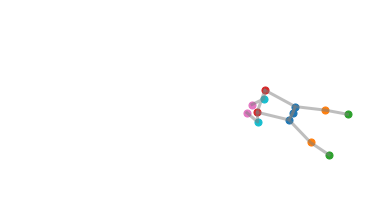

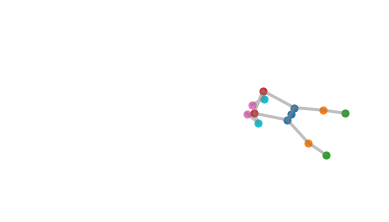

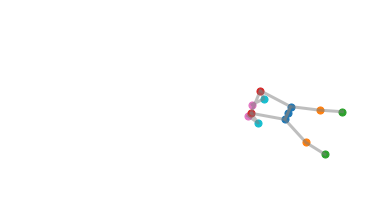

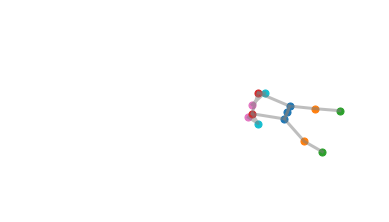

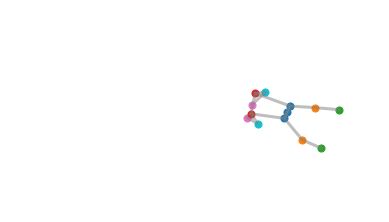

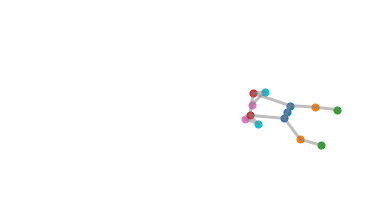

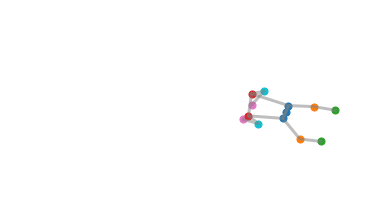

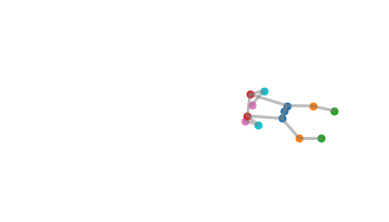

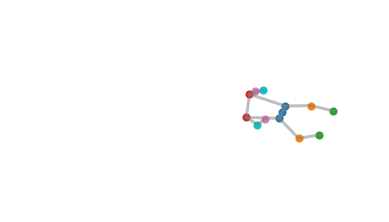

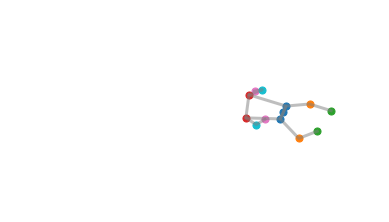

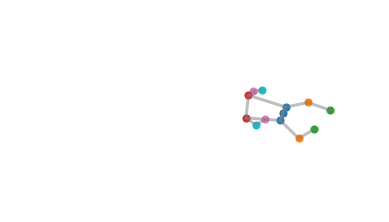

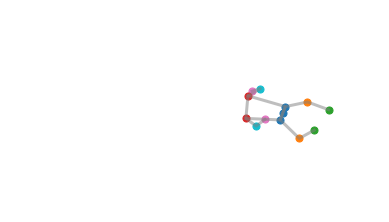

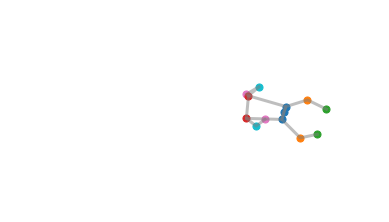

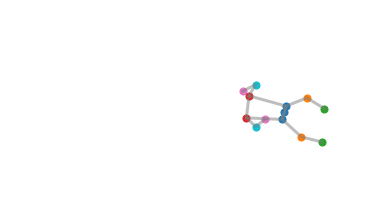

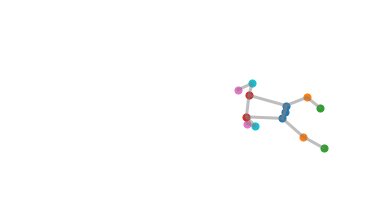

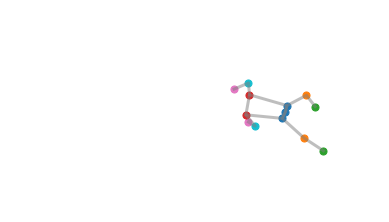

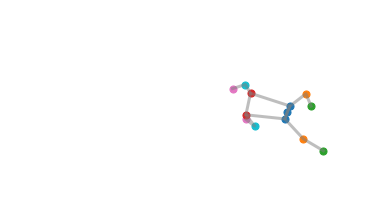

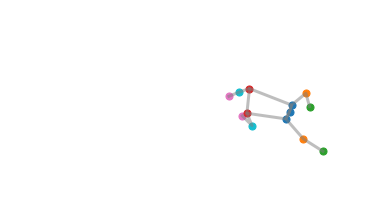

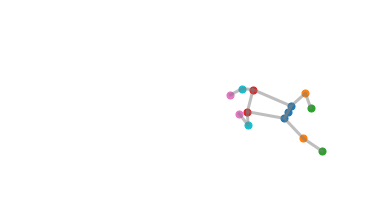

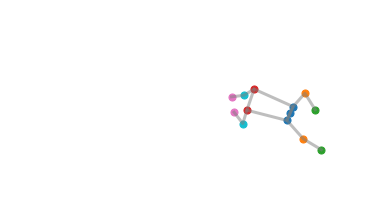

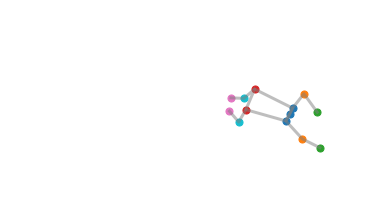

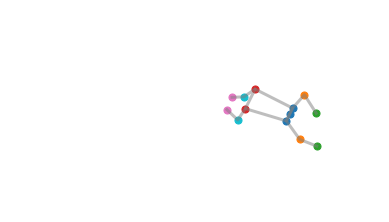

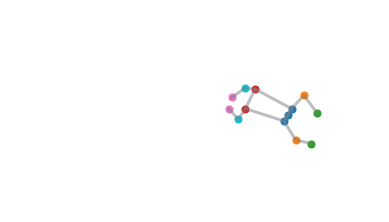

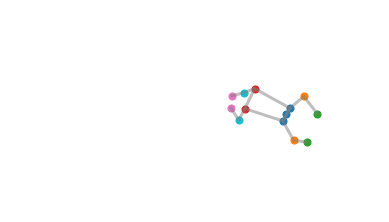

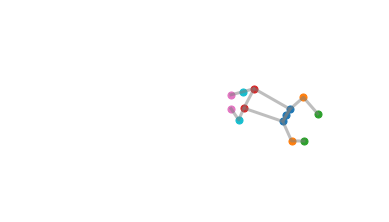

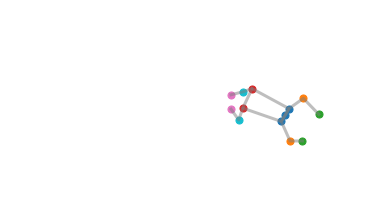

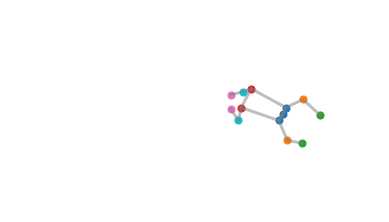

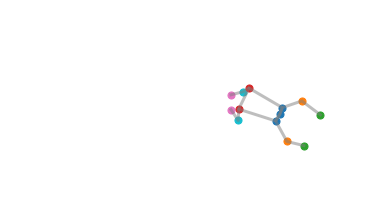

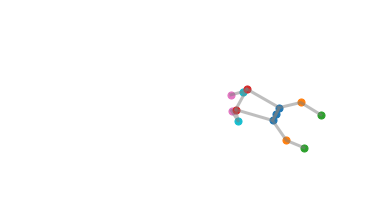

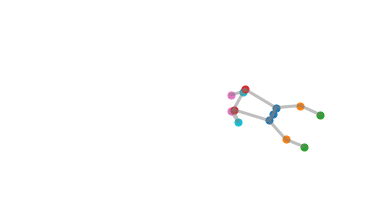

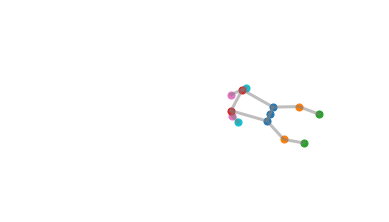

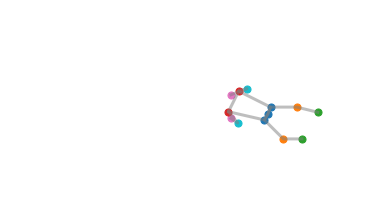

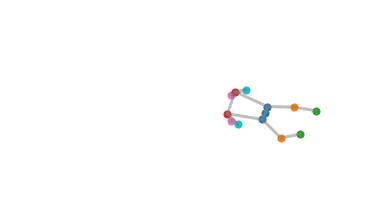

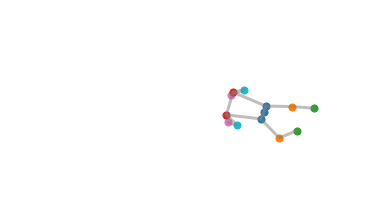

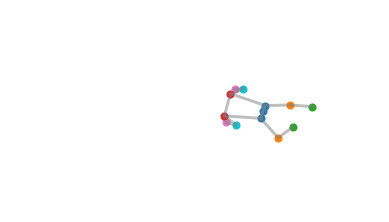

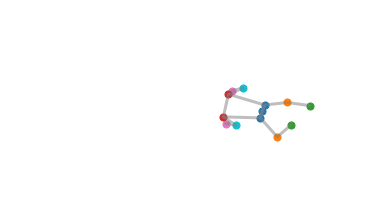

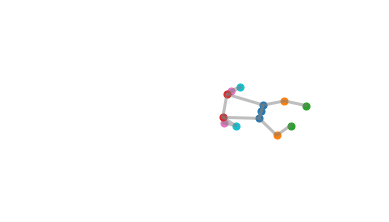

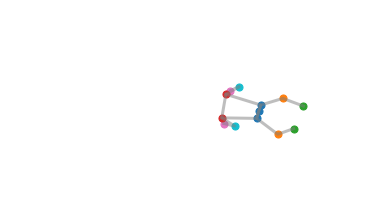

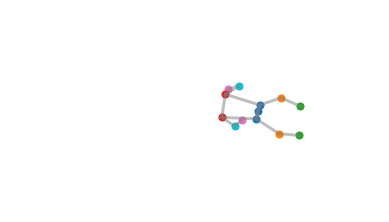

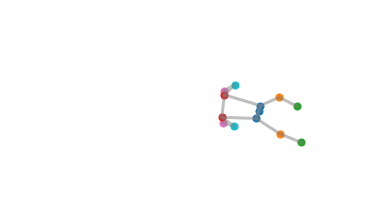

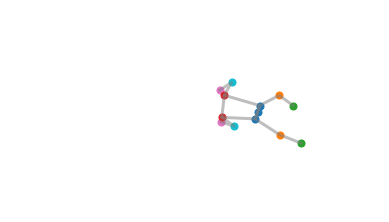

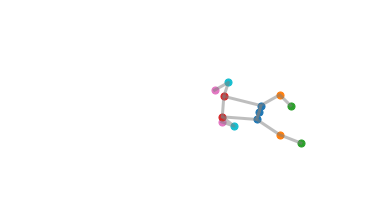

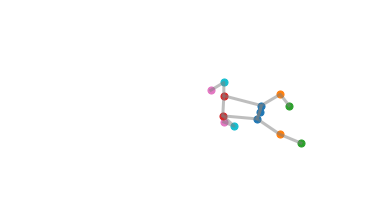

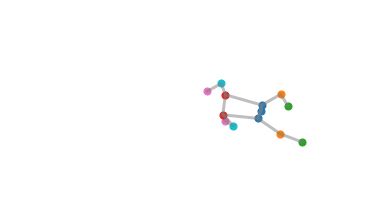

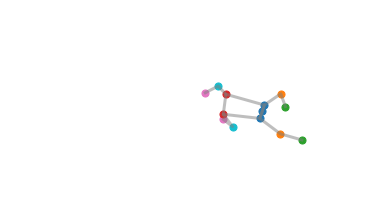

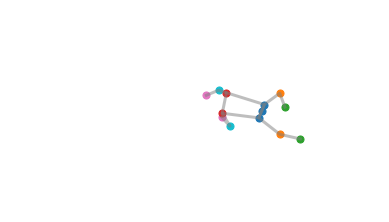

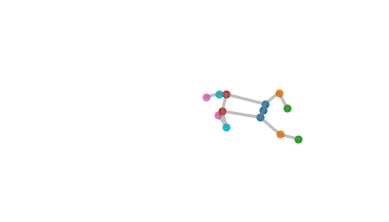

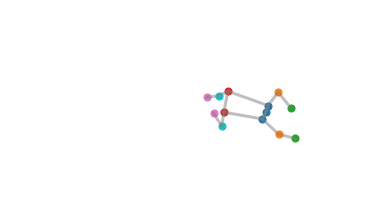

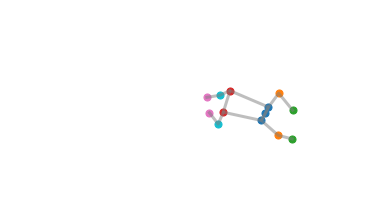

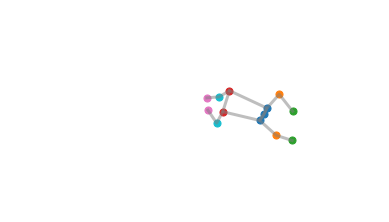

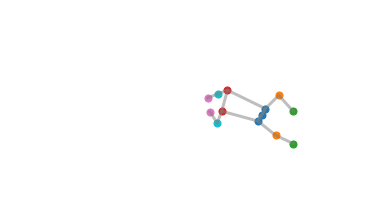

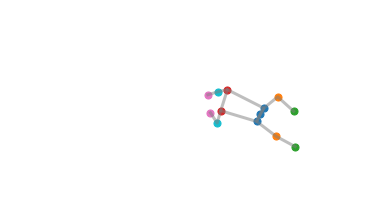

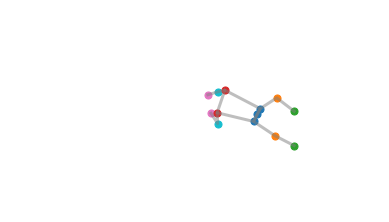

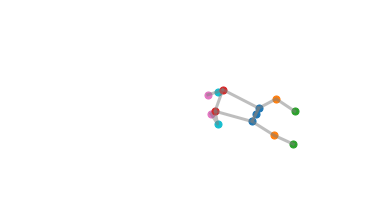

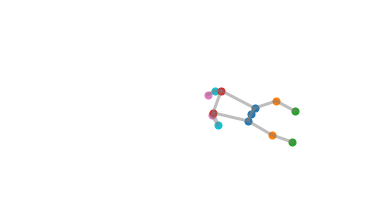

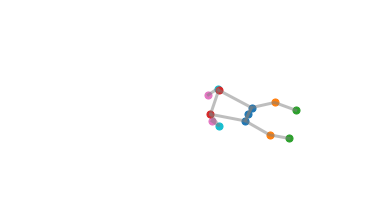

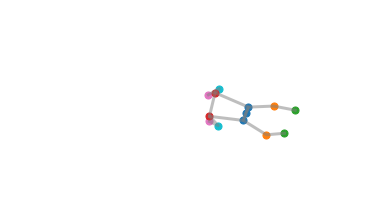

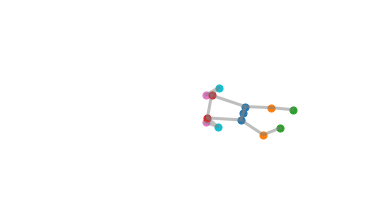

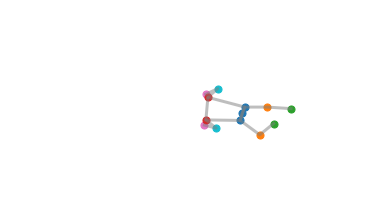

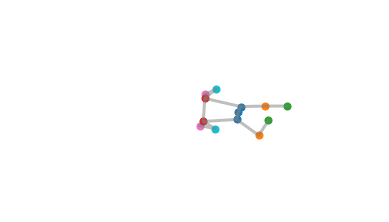

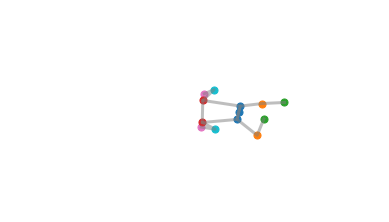

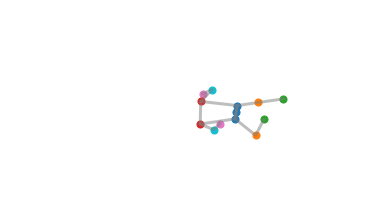

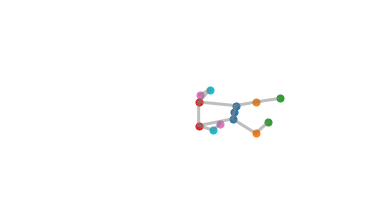

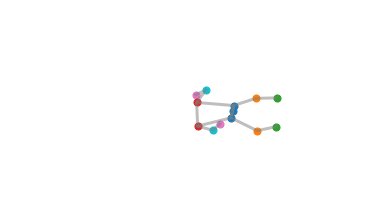

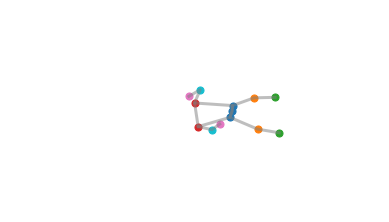

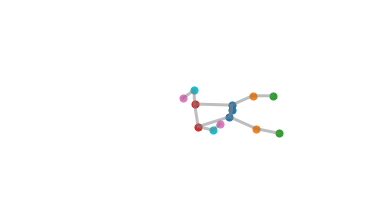

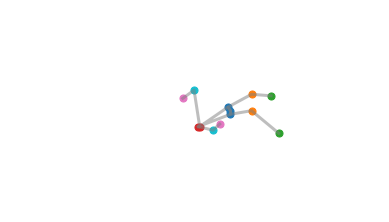

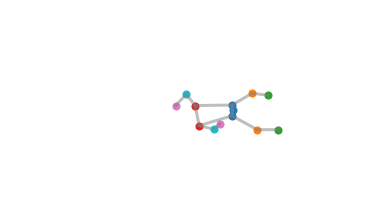

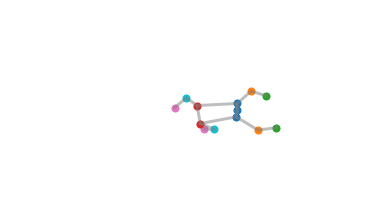

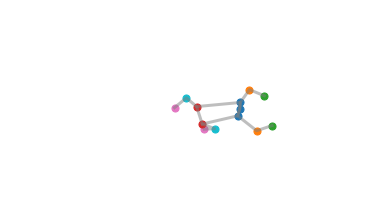

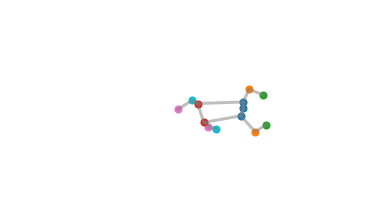

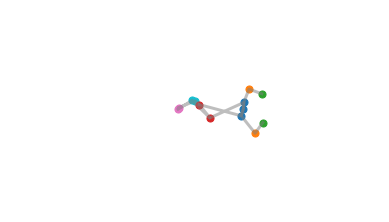

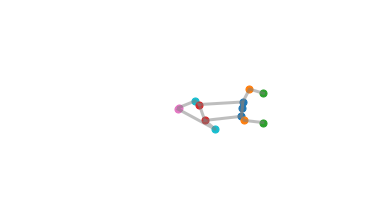

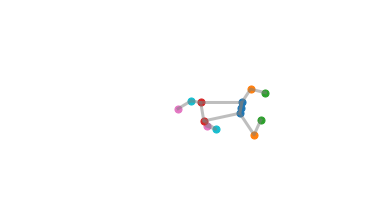

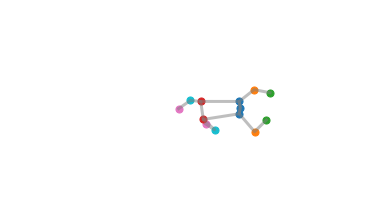

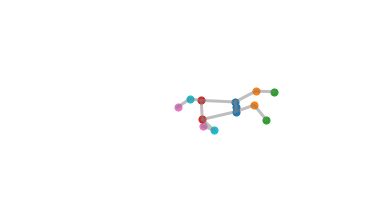

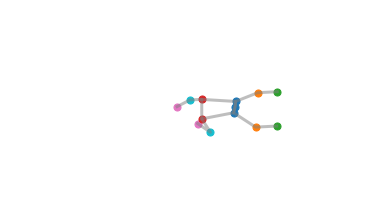

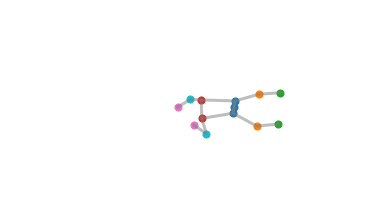

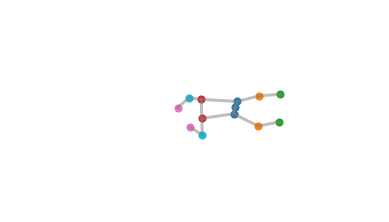

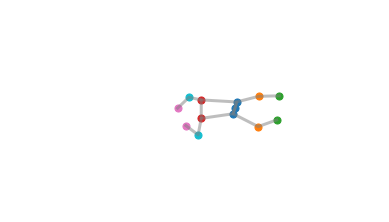

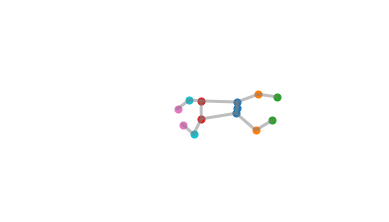

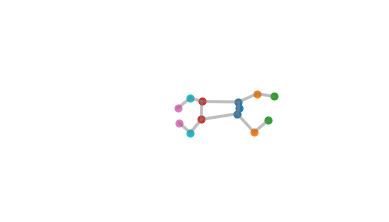

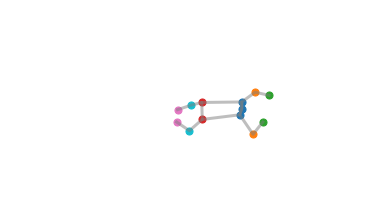

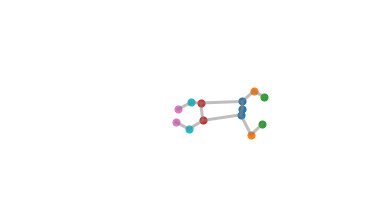

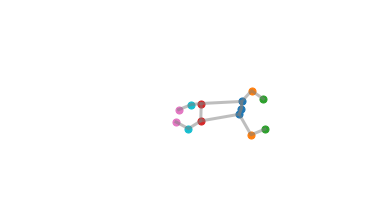

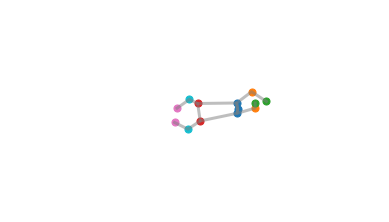

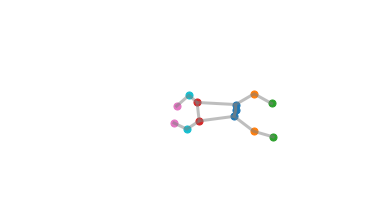

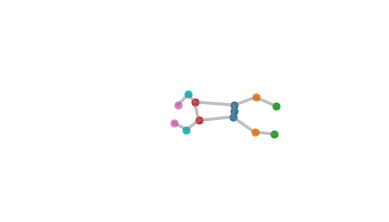

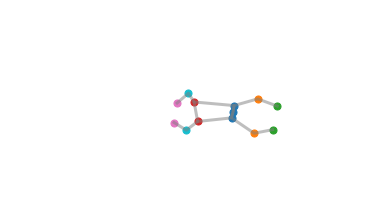

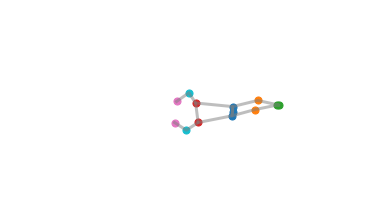

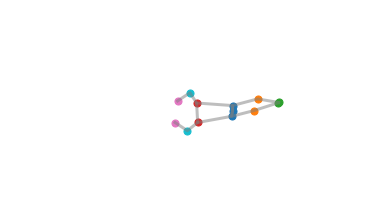

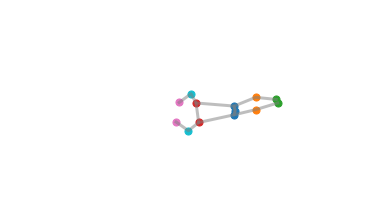

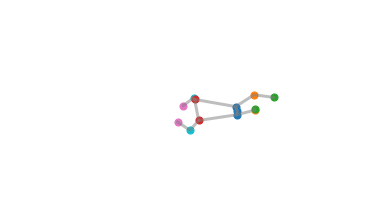

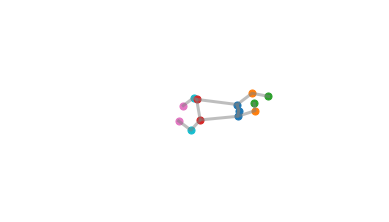

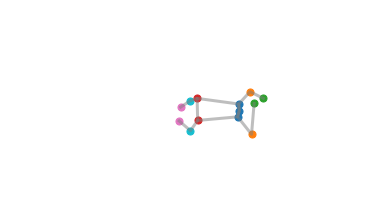

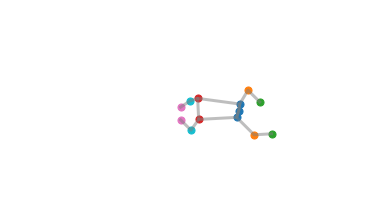

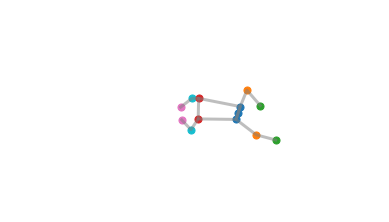

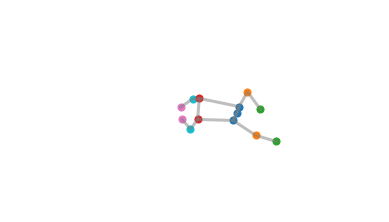

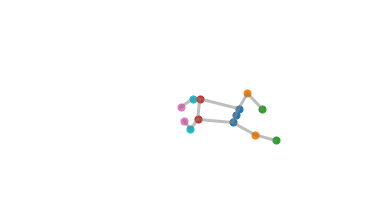

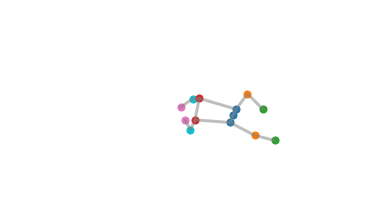

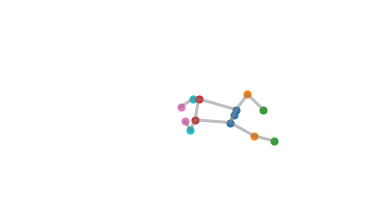

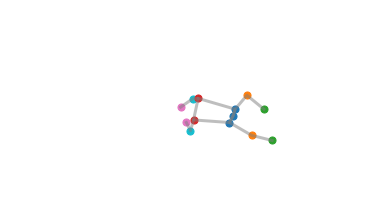

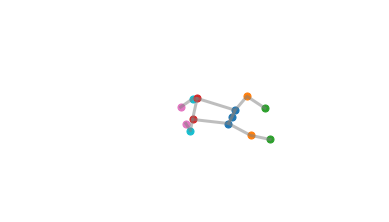

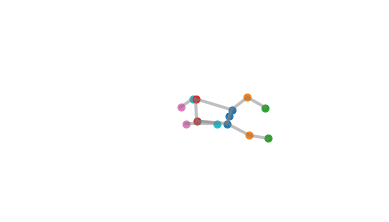

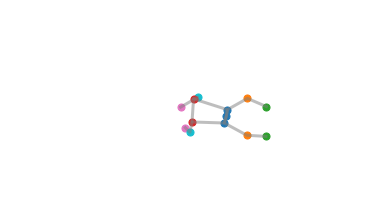

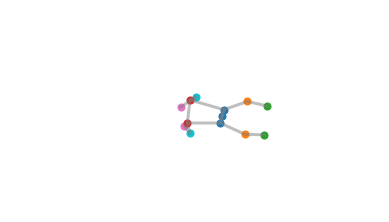

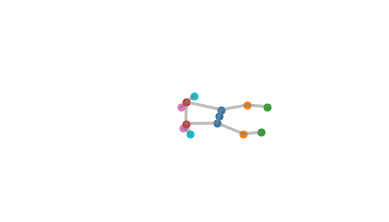

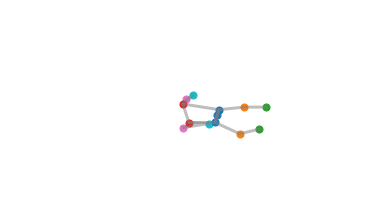

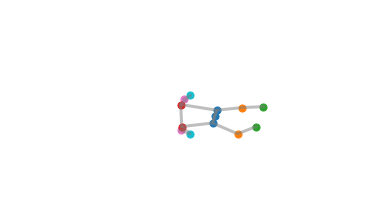

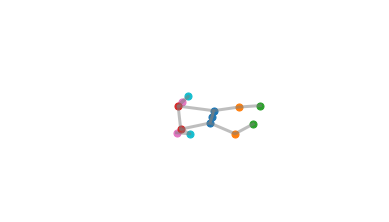

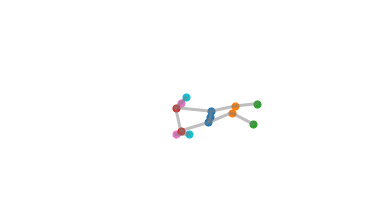

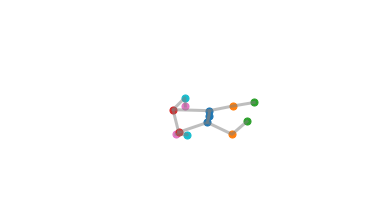

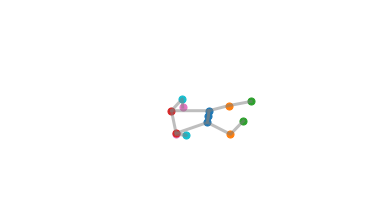

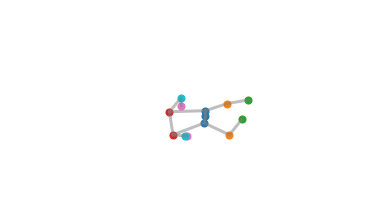

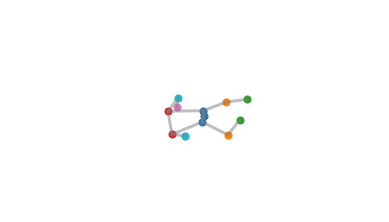

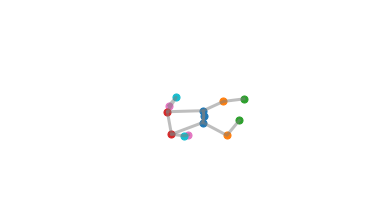

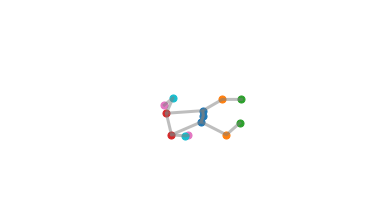

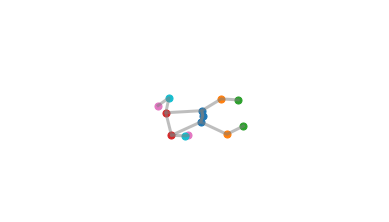

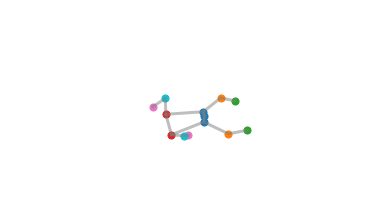

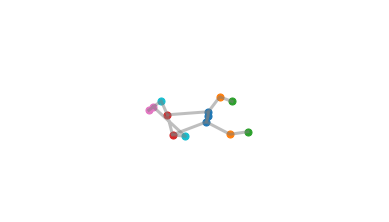

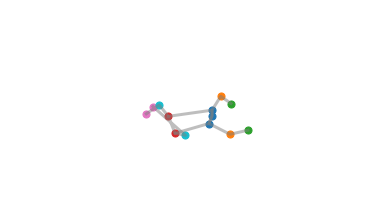

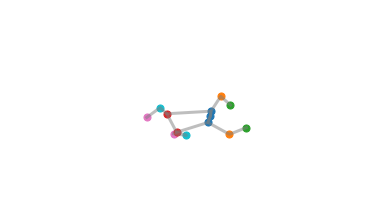

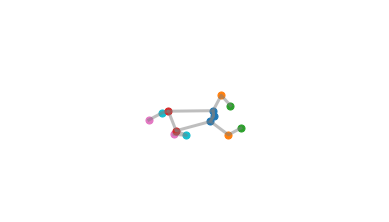

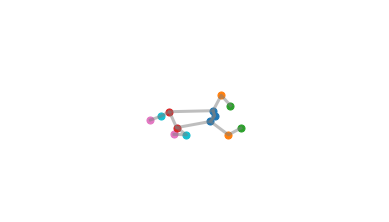

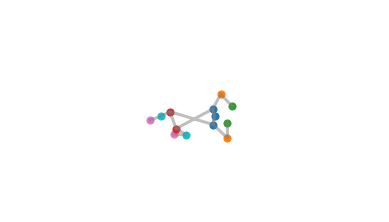

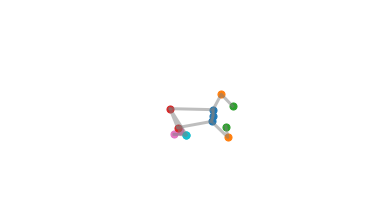

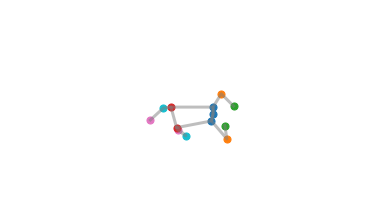

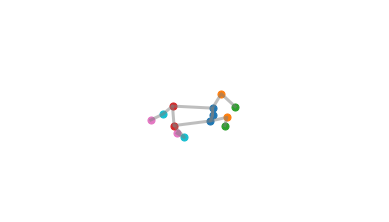

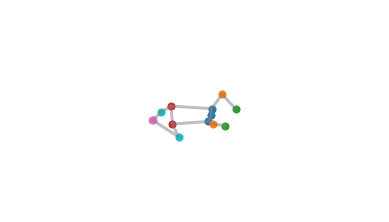

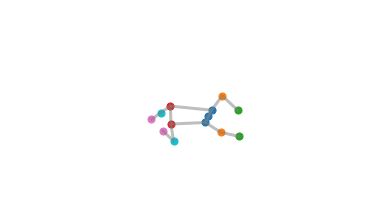

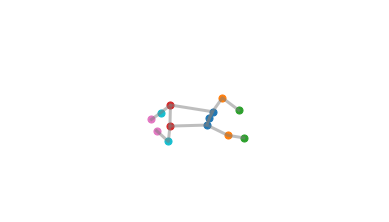

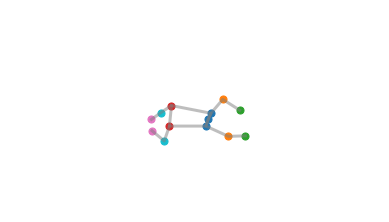

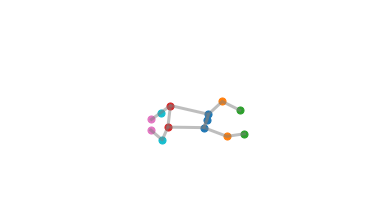

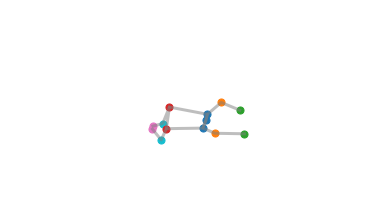

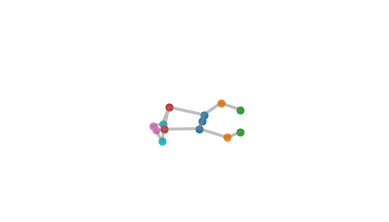

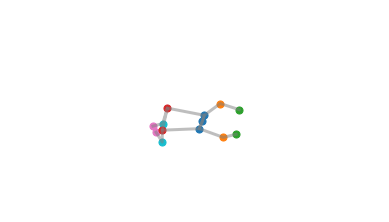

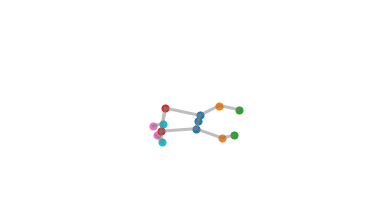

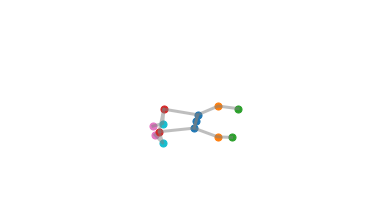

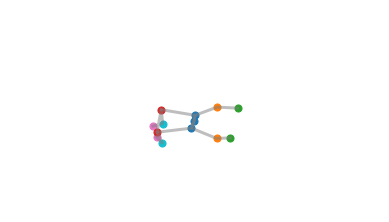

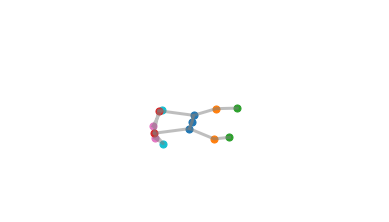

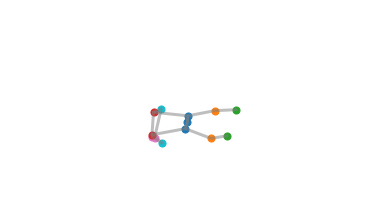

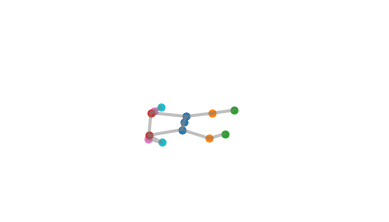

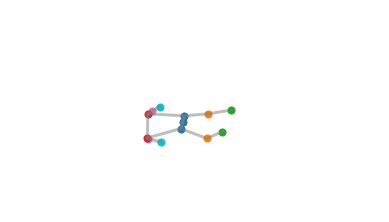

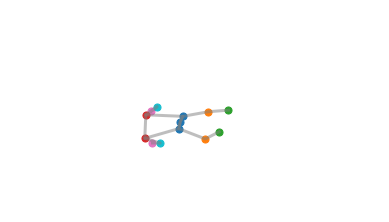

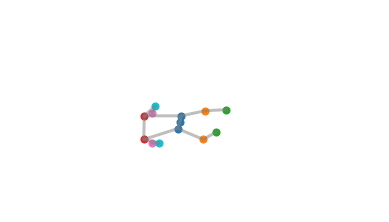

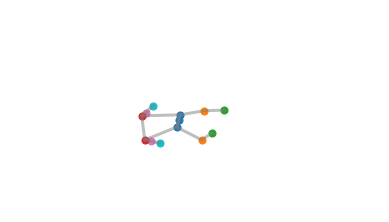

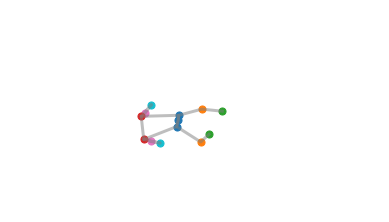

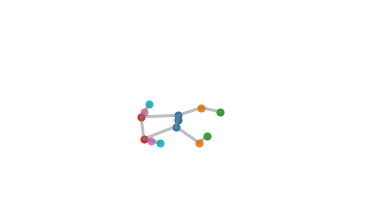

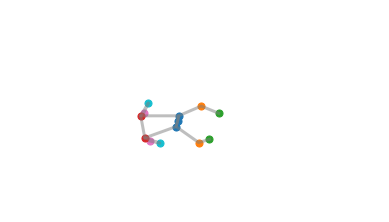

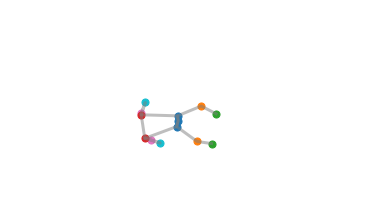

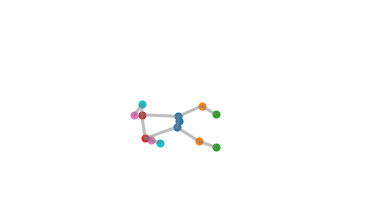

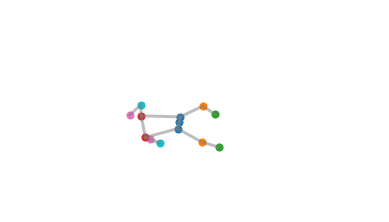

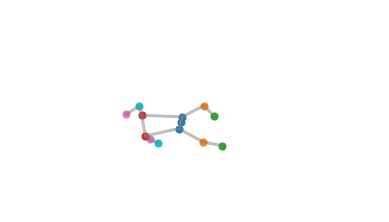

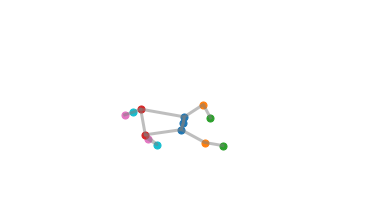

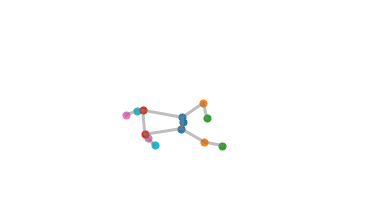

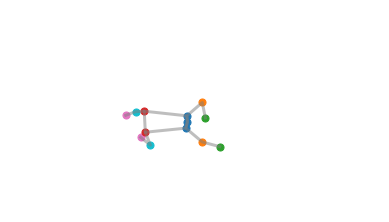

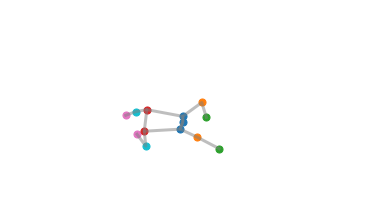

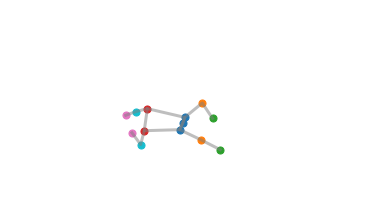

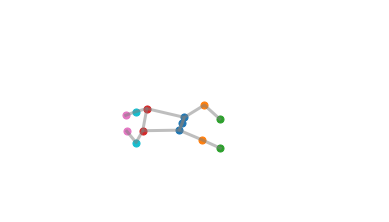

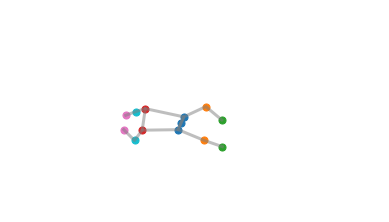

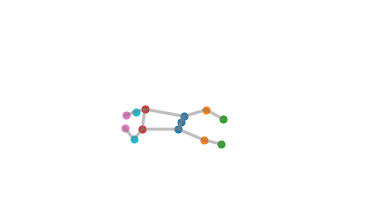

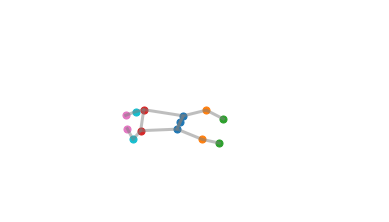

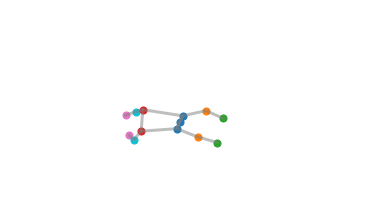

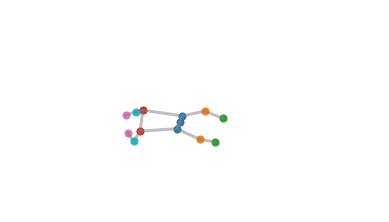

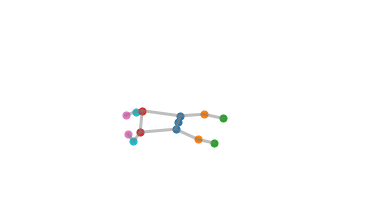

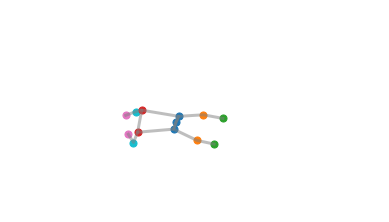

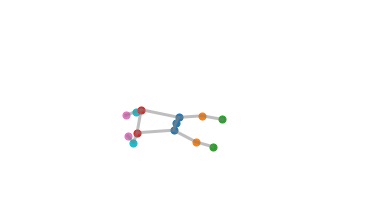

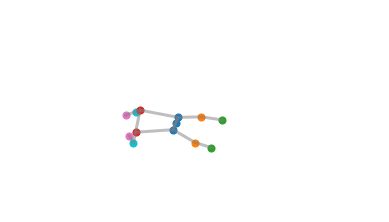

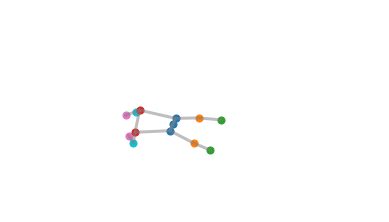

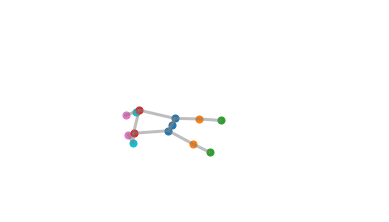

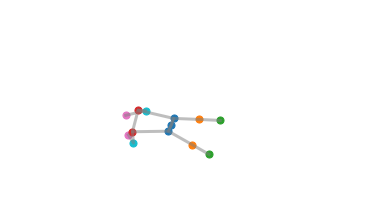

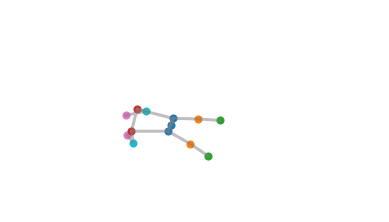

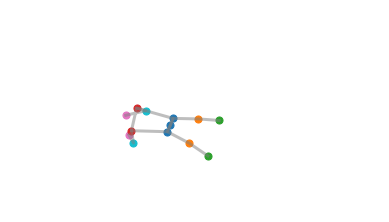

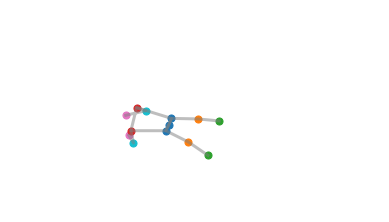

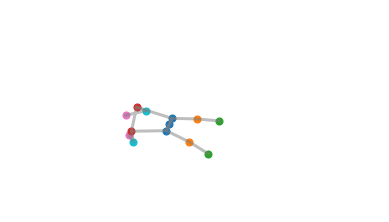

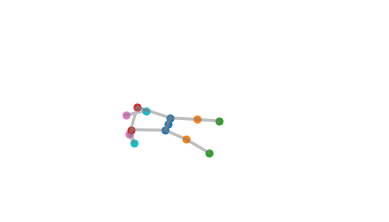

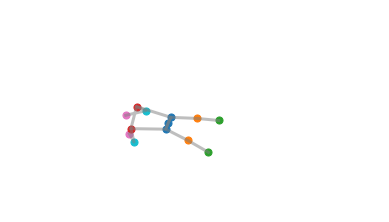

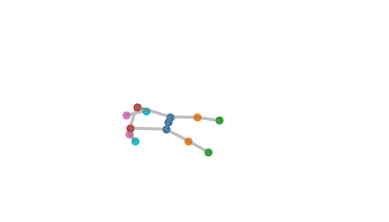

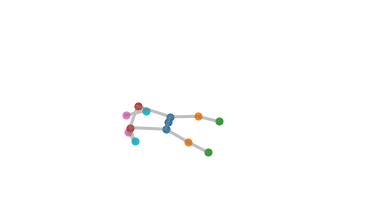

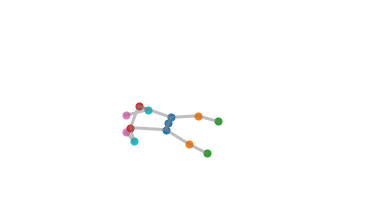

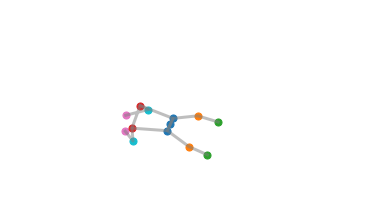

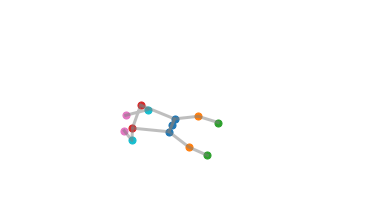

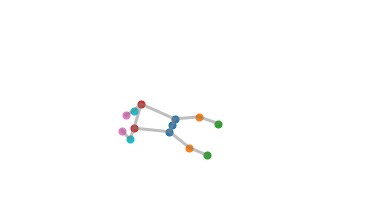

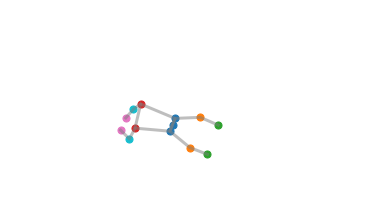

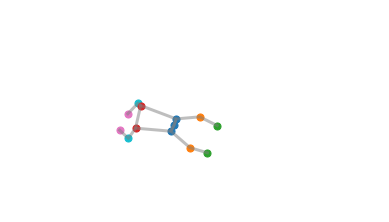

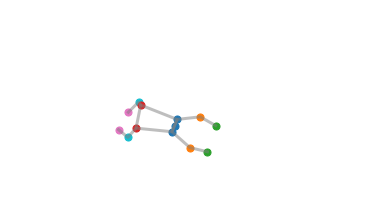

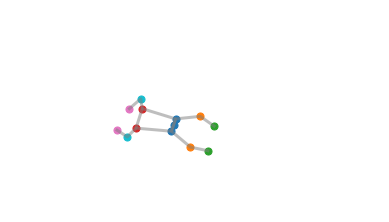

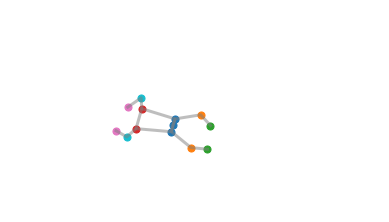

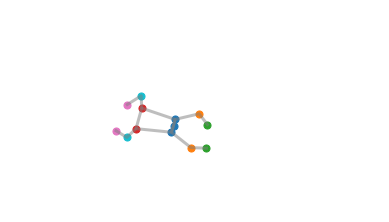

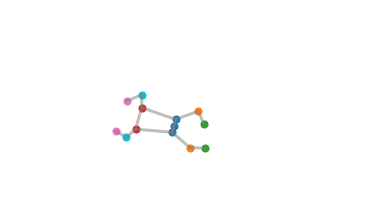

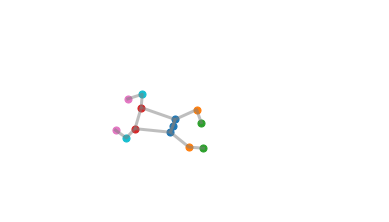

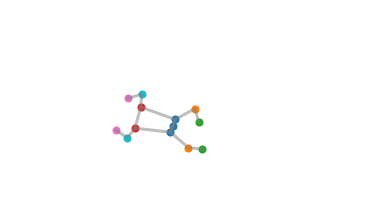

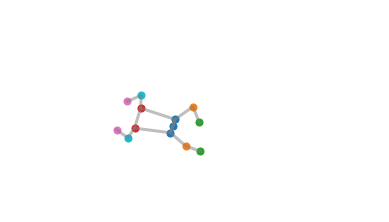

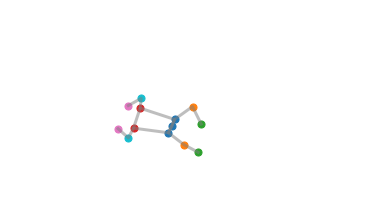

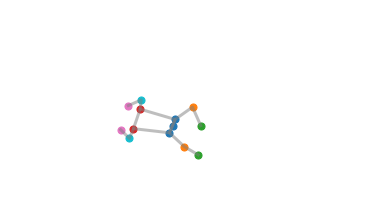

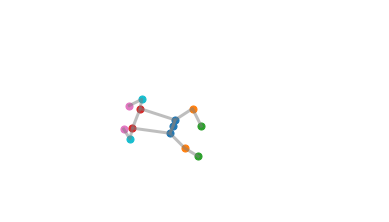

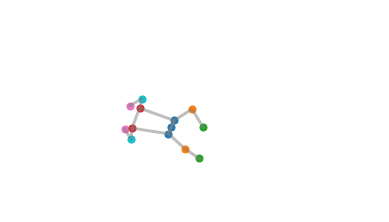

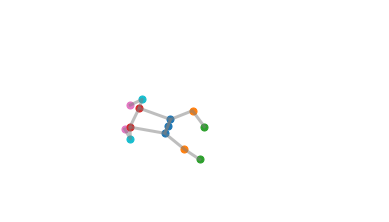

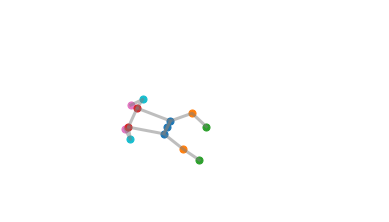

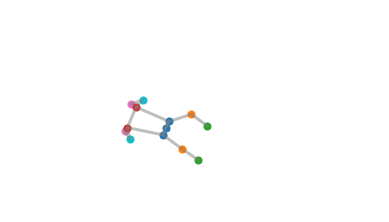

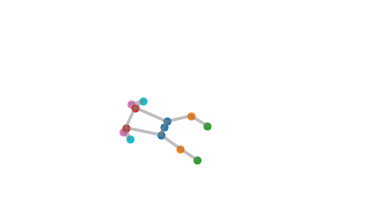

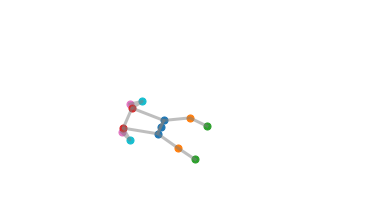

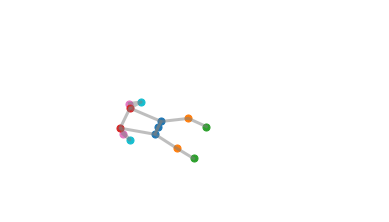

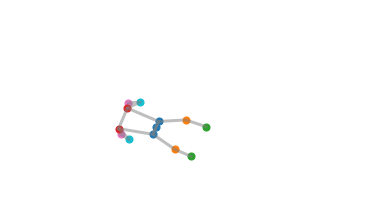

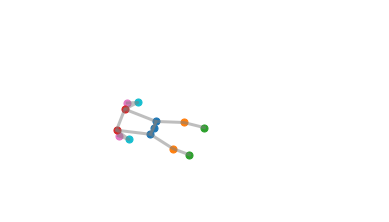

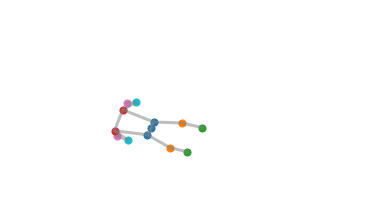

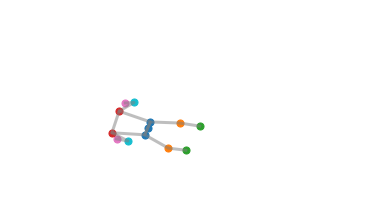

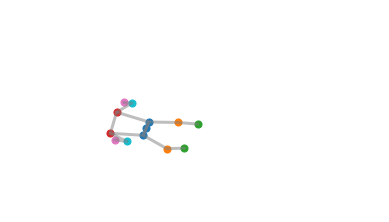

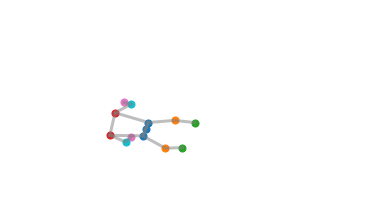

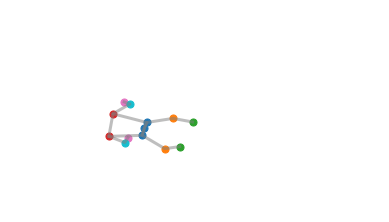

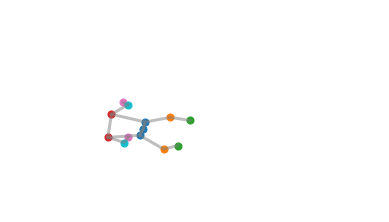

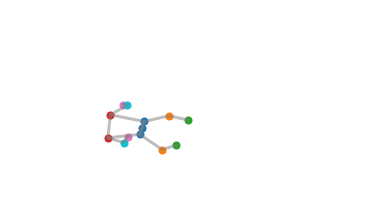

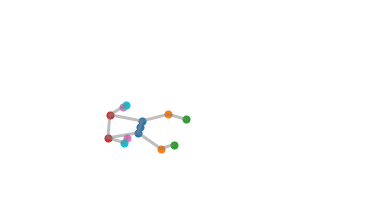

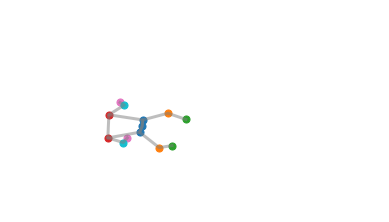

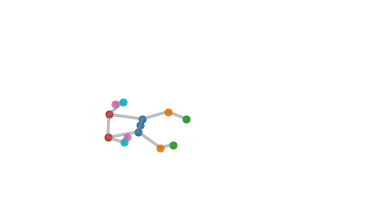

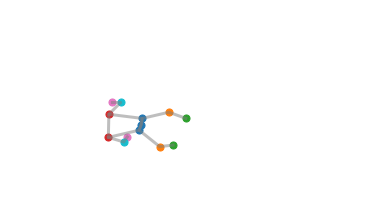

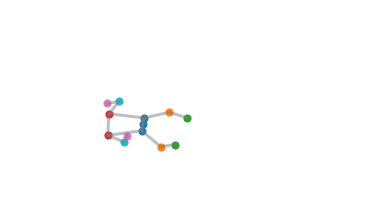

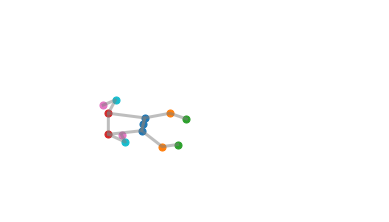

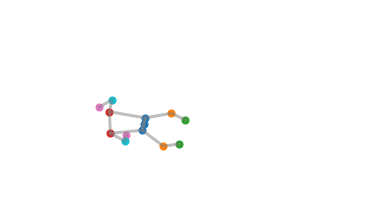

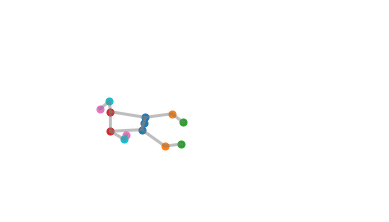

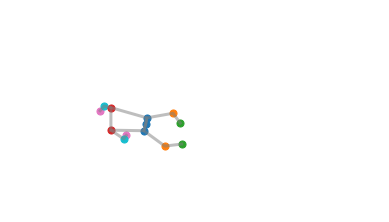

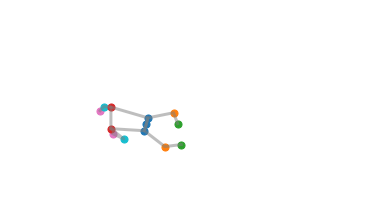

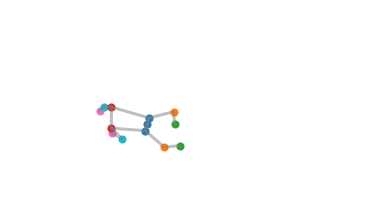

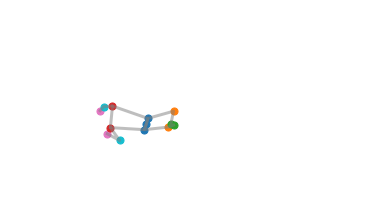

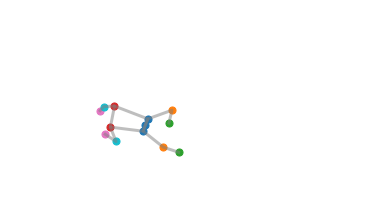

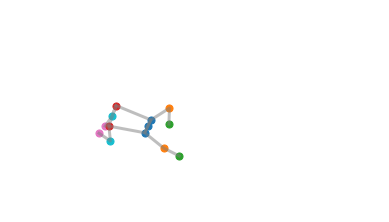

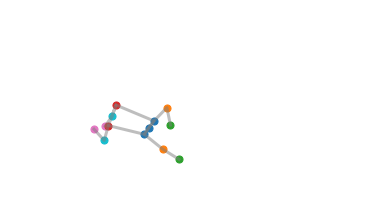

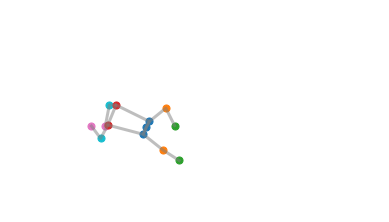

In [454]:
Data=[]
hipX=[]
hipY=[]
legRX=[]
legRY=[]
legLX=[]
legLY=[]
rH = np.array([])
lH = np.array([])

ElR = []
ElL = []
KnR = []
KnL = []
for j in range(17,305,1):
    with open('/Users/hidenoritanaka/openpose/output3/Taku_Body_000000000'+"{0:0=3d}".format(j)+'_keypoints.json') as f:   
        data = json.load(f)
        twoD = np.array(data['people'][0]['pose_keypoints_2d'])
        
        for l in np.argwhere(twoD==0):
            twoD[l] = twoD_old[l]
        
            #print(l,twoD_old[l])
        #print(twoD[18])
        
        
        WCX = twoD[24]
        WCY = twoD[25]
        
        #for k in np.arange(0,len(twoD),3):
        #    twoD[k] -= WCX
        #for k in np.arange(1,len(twoD),3):
        #    twoD[k] -= WCY

        
        lendata = len(twoD)
        plt.figure()
        #rH = np.append(rH,np.array([twoD[12], twoD[13]]),axis=1)
        #lH = np.append(lH,[twoD[21], twoD[22]])
        
        #plt.scatter( np.take(twoD, np.arange(0,len(twoD),3)) , np.take(twoD, np.arange(1,len(twoD),3)) )
        #plt.scatter( twoD[9] , twoD[10] )
        #plt.scatter( twoD[12] , twoD[13] )
        #plt.scatter( twoD[12] , twoD[13] )
        
        
        
        
        if -twoD[10]<-twoD[19] and -twoD[7]<-twoD[16]:
            RightHandX  =  twoD[12]
            RightHandY  = -twoD[13]
            LeftHandX   =  twoD[21]
            LeftHandY   = -twoD[22]
            
            twoD[12] =LeftHandX
            twoD[13]=-LeftHandY
            twoD[21] =RightHandX
            twoD[22]=-RightHandY
            
            RightElbowX =  twoD[9]
            RightElbowY = -twoD[10]
            LeftElbowX  = twoD[18]
            LeftElbowY  = -twoD[19]
            
            twoD[9]    =LeftElbowX
            twoD[10]  =-LeftElbowY
            twoD[18]  = RightElbowX
            twoD[19]  =-RightElbowY
            
            RightShoulderX =twoD[6]
            RightShoulderY =-twoD[7]
            LeftShoulderX =twoD[15]
            LeftShoulderY =-twoD[16]
            
            twoD[6]  =LeftShoulderX 
            twoD[7] =-LeftShoulderY
            twoD[15] =RightShoulderX
            twoD[16]=-RightShoulderY
        
            
        Data.append(twoD)
        
        
        # Right Hand
        plt.scatter( twoD[12] , -twoD[13] , c=tableau10[6],s=50)
        # Left Hand
        plt.scatter( twoD[21] , -twoD[22] , c=tableau10[6],s=50)
        # Right Elbow
        plt.scatter( twoD[9] , -twoD[10] , c=tableau10[9],s=50)
        # Left Elbow
        plt.scatter( twoD[18] , -twoD[19] , c=tableau10[9],s=50)
        # Right Shoulder
        plt.scatter( twoD[6] , -twoD[7] , c=tableau10[3],s=50)
        # Left Shoulder
        plt.scatter( twoD[15] , -twoD[16] , c=tableau10[3],s=50)
        # Central Waist
        plt.scatter( twoD[24] , -twoD[25] , c =tableau10[0],s=50)
        # Right Waist
        plt.scatter( twoD[27] , -twoD[28] , c =tableau10[0],s=50)
        # Left Waist
        plt.scatter( twoD[36] , -twoD[37] , c =tableau10[0],s=50)
        # Right Knee
        plt.scatter( twoD[30] , -twoD[31] , c =tableau10[1],s=50)
        # Left Knee
        plt.scatter( twoD[39] , -twoD[40] , c =tableau10[1],s=50)
        # Right foot
        plt.scatter( twoD[33] , -twoD[34] , c =tableau10[2],s=50)
        # Left foot
        plt.scatter( twoD[42] , -twoD[43] , c =tableau10[2],s=50)
        plt.xlim(0,1920)
        plt.ylim(-1080,0)
        plt.axes().set_aspect('equal')
        
        
        plt.plot([twoD[12], twoD[9],twoD[6],twoD[15],twoD[18],twoD[21]],[-twoD[13],-twoD[10],-twoD[7],-twoD[16],-twoD[19],-twoD[22]],c = tableau10[7],lw=3, alpha = 0.5)
        plt.plot([twoD[6],twoD[27],twoD[24],twoD[36],twoD[15]],[-twoD[7],-twoD[28],-twoD[25],-twoD[37],-twoD[16]],c = tableau10[7],lw=3, alpha = 0.5)
        plt.plot([twoD[33],twoD[30],twoD[27],twoD[24],twoD[36],twoD[39],twoD[42]],[-twoD[34],-twoD[31],-twoD[28],-twoD[25],-twoD[37],-twoD[40],-twoD[43]],c = tableau10[7],lw=3, alpha = 0.5)
        
        
        
        
        plt.axis('off')
        
        hipX.append(twoD[24])
        hipY.append(twoD[25])
        ElR.append([twoD[9]-twoD[6],twoD[10]-twoD[7]])
        ElL.append([twoD[18]-twoD[15],twoD[19]-twoD[16]])
        KnR.append([twoD[27]-twoD[30],twoD[28]-twoD[31]])
        KnL.append([twoD[36]-twoD[39],twoD[37]-twoD[40]])        
        
        
        legRX.append(twoD[33])
        legRY.append(twoD[34])
        legLX.append(twoD[42])
        legLY.append(twoD[43])
        
        #twoD-twoD_old 
        twoD_old = np.zeros(len(twoD))
        twoD_old[:] = twoD[:]
        #plt.savefig('/Users/hidenoritanaka/Google Drive/ResearchNow/TakutoCrawling/Skelton2/Takuto'+str(j)+'.png')
        
Data=np.array(Data)


In [455]:
j

304

In [424]:
-twoD[37]

-680.36800000000005

In [409]:
[twoD[12]-twoD[9],twoD[13]-twoD[10]]
[twoD[9]-twoD[6],twoD[10]-twoD[7]]

[twoD[12]-twoD[6],twoD[13]-twoD[7]]

[-11.900000000000091, -8.9279999999999973]

In [351]:
with open('/Users/hidenoritanaka/openpose/output3/Takuto_Body_000000000'+"{0:0=3d}".format(98)+'_keypoints.json') as f:   
    data = json.load(f)
    twoD = np.array(data['people'][0]['pose_keypoints_2d'])
twoD[18]==0
twoD_old[18]

FileNotFoundError: [Errno 2] No such file or directory: '/Users/hidenoritanaka/openpose/output3/Takuto_Body_000000000098_keypoints.json'

In [142]:
# visualize
colors = [[255, 0, 0], [255, 85, 0], [255, 170, 0], [255, 255, 0], [170, 255, 0], [85, 255, 0], [0, 255, 0], [0, 255, 85], [0, 255, 170], [0, 255, 255], [0, 170, 255], [0, 85, 255], [0, 0, 255], [85, 0, 255], [170, 0, 255], [255, 0, 255], [255, 0, 170], [255, 0, 85]]
cmap = matplotlib.cm.get_cmap('hsv')

canvas = cv.imread(test_image) # B,G,R order

for i in range(18):
    rgba = np.array(cmap(1 - i/18. - 1./36))
    rgba[0:3] *= 255
    for j in range(len(all_peaks[i])):
        cv.circle(canvas, all_peaks[i][j][0:2], 4, colors[i], thickness=-1)

to_plot = cv.addWeighted(oriImg, 0.3, canvas, 0.7, 0)
plt.imshow(to_plot[:,:,[2,1,0]])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 12)

NameError: name 'cv' is not defined

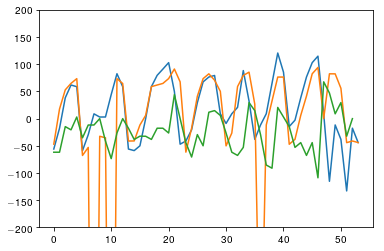

In [138]:
ElR = np.array(ElR)
ElL = np.array(ElL)
KnR = np.array(KnR)
KnL = np.array(KnL)
plt.plot(ElR[:,0])
plt.plot(ElL[:,0])
plt.ylim(-200,200)
plt.plot(np.diff(hipX))

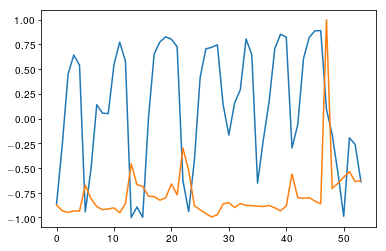

In [114]:
plt.plot(np.cos(np.angle(ElR[:,0]+1j*ElR[:,1])))
#plt.plot(np.cos(np.angle(ElL[:,0]+1j*ElL[:,1])))
#plt.plot(np.cos(np.angle(KnR[:,0]+1j*KnR[:,1])))
plt.plot(np.cos(np.angle(KnL[:,0]+1j*KnL[:,1])))

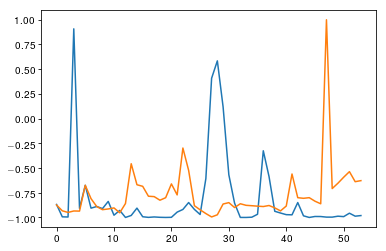

In [109]:
plt.plot(np.cos(np.angle(KnR[:,0]+1j*KnR[:,1])))
plt.plot(np.cos(np.angle(KnL[:,0]+1j*KnL[:,1])))

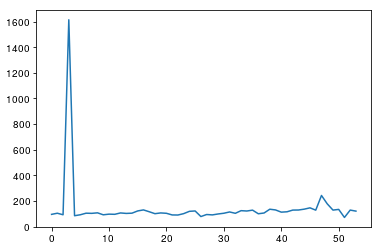

In [119]:

plt.plot(LA.norm(KnR,axis=1))

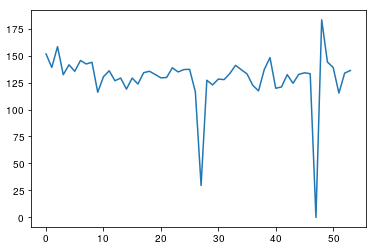

In [120]:
plt.plot(LA.norm(KnL,axis=1))

(-250, 0)

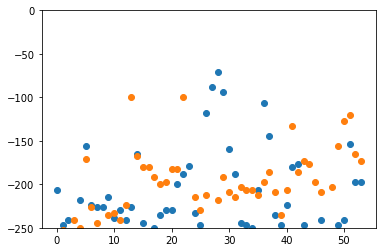

In [29]:
plt.plot(np.array(hipX)-np.array(legRX),marker='o',lw=0)
plt.ylim(-250,0)
plt.plot(np.array(hipX)-np.array(legLX),marker='o',lw=0)
plt.ylim(-250,0)

(-250, 0)

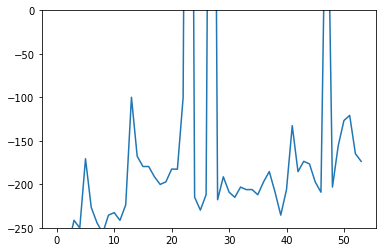

In [22]:
plt.plot(np.array(hipX)-np.array(legLX))
plt.ylim(-250,0)

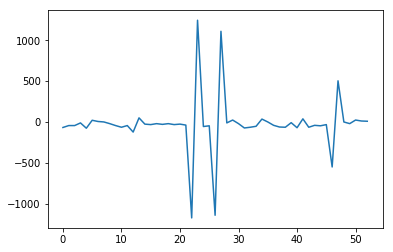

In [31]:
plt.plot(np.diff(legLX))

In [33]:
for i in range(len(np.diff(legLX))):
    if np.diff(legLX)[i]>100:
        print(i)

23
27
47


In [34]:
for i in range(len(np.diff(legRX))):
    if np.diff(legRX)[i]>100:
        print(i)

3


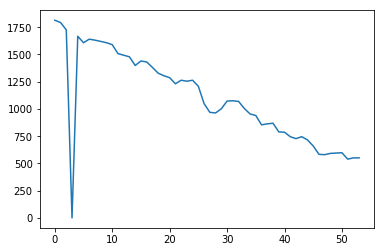

In [35]:
plt.plot(legRX)

In [87]:
for i in range(25):
    print(i, data['people'][0]['pose_keypoints_2d'][i*3:i*3+3] )

0 [0, 0, 0]
1 [126.996, 721.687, 0.823758]
2 [135.814, 668.559, 0.757532]
3 [91.7187, 721.64, 0.0535502]
4 [65.2474, 771.651, 0.0907575]
5 [124.07, 768.704, 0.682301]
6 [80.0294, 833.425, 0.898951]
7 [6.30051, 798.076, 0.737243]
8 [353.674, 768.721, 0.412046]
9 [356.613, 733.364, 0.317737]
10 [474.393, 709.869, 0.248942]
11 [550.942, 724.465, 0.480962]
12 [344.852, 801.063, 0.390999]
13 [430.267, 907.089, 0.490268]
14 [527.31, 851.149, 0.152189]
15 [0, 0, 0]
16 [0, 0, 0]
17 [94.7492, 671.477, 0.202953]
18 [56.4436, 768.671, 0.444998]
19 [600.954, 868.702, 0.162322]
20 [600.863, 859.904, 0.123764]
21 [530.39, 818.821, 0.129291]
22 [624.48, 715.752, 0.368641]
23 [618.544, 724.471, 0.347136]
24 [0, 0, 0]


In [231]:
Data = []
for j in range(0,533,1):
    with open('/Users/hidenoritanaka/openpose/output3/Takuto_Body_000000000'+"{0:0=3d}".format(j)+'_keypoints.json') as f:   
        data = json.load(f)
        twoD = np.array(data['people'][0]['pose_keypoints_2d'])
        
        for l in np.argwhere(twoD==0):
            twoD[l] = twoD_old[l]
            
        twoD_old = np.zeros(len(twoD))
        twoD_old[:] = twoD[:]
        Data.append(twoD)
Data = np.array(Data)

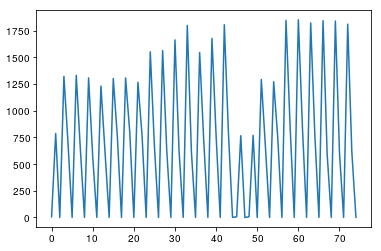

In [235]:
plt.plot( Data[:][9] )

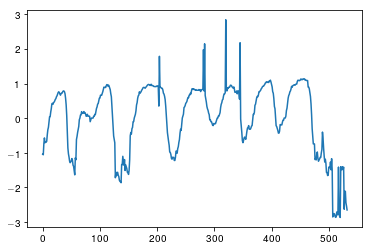

In [309]:
plt.plot( np.angle(    np.exp(1j*np.pi/2)*(Data[:,9]-Data[:,6]+1j*(Data[:,10]-Data[:,7]))   ) )

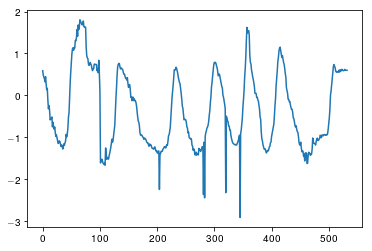

In [314]:
plt.plot( np.angle(    -np.exp(1j*np.pi/2)*(Data[:,18]-Data[:,15]+1j*(Data[:,19]-Data[:,16]))   ) )

In [391]:
Data=[]
hipX=[]
hipY=[]
legRX=[]
legRY=[]
legLX=[]
legLY=[]
rH = np.array([])
lH = np.array([])

ElR = []
ElL = []
KnR = []
KnL = []
for j in range(9,347,1):
    with open('/Users/hidenoritanaka/openpose/output3/Taku_Body_000000000'+"{0:0=3d}".format(j)+'_keypoints.json') as f:   
        data = json.load(f)
        twoD = np.array(data['people'][0]['pose_keypoints_2d'])
        
        for l in np.argwhere(twoD==0):
            twoD[l] = twoD_old[l]
        Data.append(twoD)
        
        #twoD-twoD_old 
        twoD_old = np.zeros(len(twoD))
        twoD_old[:] = twoD[:]
        #plt.savefig('/Users/hidenoritanaka/Google Drive/ResearchNow/TakutoCrawling/Skelton2/Takuto'+str(j)+'.png')
        
Data=np.array(Data)

(-200, 150)

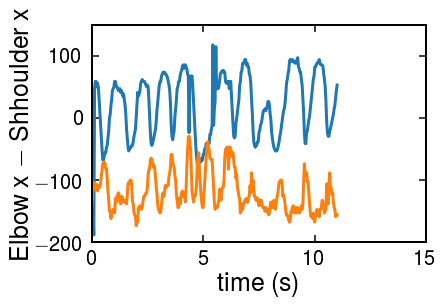

In [459]:
Data=[]

for j in range(17,348,1):
    with open('/Users/hidenoritanaka/openpose/output3/Taku_Body_000000000'+"{0:0=3d}".format(j)+'_keypoints.json') as f:   
        data = json.load(f)
        twoD = np.array(data['people'][0]['pose_keypoints_2d'])
        
        for l in np.argwhere(twoD==0):
            twoD[l] = twoD_old[l]


        lendata = len(twoD)


        
        
        if -twoD[10]<-twoD[19] and -twoD[7]<-twoD[16]:
            RightHandX  =  twoD[12]
            RightHandY  = -twoD[13]
            LeftHandX   =  twoD[21]
            LeftHandY   = -twoD[22]
            
            twoD[12] =LeftHandX
            twoD[13]=-LeftHandY
            twoD[21] =RightHandX
            twoD[22]=-RightHandY
            
            RightElbowX =  twoD[9]
            RightElbowY = -twoD[10]
            LeftElbowX  = twoD[18]
            LeftElbowY  = -twoD[19]
            
            twoD[9]    =LeftElbowX
            twoD[10]  =-LeftElbowY
            twoD[18]  = RightElbowX
            twoD[19]  =-RightElbowY
            
            RightShoulderX =twoD[6]
            RightShoulderY =-twoD[7]
            LeftShoulderX =twoD[15]
            LeftShoulderY =-twoD[16]
            
            twoD[6]  =LeftShoulderX 
            twoD[7] =-LeftShoulderY
            twoD[15] =RightShoulderX
            twoD[16]=-RightShoulderY
        
            
        Data.append(twoD)

        
        #twoD-twoD_old 
        twoD_old = np.zeros(len(twoD))
        twoD_old[:] = twoD[:]

Data=np.array(Data)


ax_setter(0,0,0,0)
# Right Elbow - Right Shoulder
#plt.plot(np.arange(len(Data))/30, Data[:,9]-Data[:,6],lw=3)
# Left Elbow - Left Shoulder
plt.plot(np.arange(len(Data))/30, Data[:,18]-Data[:,15],lw=3)
# Right Weist - Right Knee
plt.plot(np.arange(len(Data))/30, Data[:,27]-Data[:,30], lw=3)
# Left Weist - Left Knee
#plt.plot(np.arange(len(Data))/30, Data[:,36]-Data[:,39], lw=3)

# Center of shoulder
#plt.plot( np.arange(len(Data))/30,  (-Data[:,7]-Data[:,16])/2 - mean((-Data[:,7]-Data[:,16])/2), c=tableau10[3] , lw=3) 

plt.xlabel("time (s)",fontsize=25)

plt.ylabel(r"Elbow x $-$ Shhoulder x",fontsize=25)
#plt.xlim(0,5)
plt.xlim(0,15)
plt.ylim(-200,150)

(-150, 150)

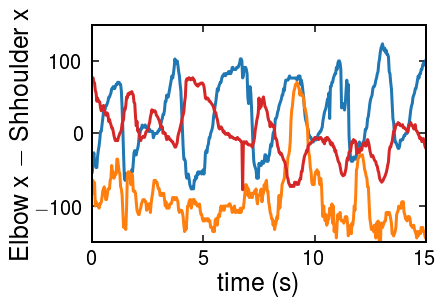

In [414]:
Data=[]

for j in range(0,533,1):
    with open('/Users/hidenoritanaka/openpose/output/Takuto_000000000'+"{0:0=3d}".format(j)+'_keypoints.json') as f:   
        data = json.load(f)
        twoD = np.array(data['people'][0]['pose_keypoints_2d'])
        
        for l in np.argwhere(twoD==0):
            twoD[l] = twoD_old[l]
        Data.append(twoD)
        
        #twoD-twoD_old 
        twoD_old = np.zeros(len(twoD))
        twoD_old[:] = twoD[:]
        #plt.savefig('/Users/hidenoritanaka/Google Drive/ResearchNow/TakutoCrawling/Skelton2/Takuto'+str(j)+'.png')
        
Data=np.array(Data)


ax_setter(0,0,0,0)
# Right Elbow - Right Shoulder
plt.plot(np.arange(len(Data))/30, Data[:,9]-Data[:,6],lw=3)
# Left Elbow - Left Shoulder
#plt.plot(np.arange(len(Data))/30, Data[:,18]-Data[:,15],lw=3)
# Right Weist - Right Knee
plt.plot(np.arange(len(Data))/30, Data[:,27]-Data[:,30], lw=3)
# Left Weist - Left Knee
#plt.plot( Data[:,36]-Data[:,39] )
# Center of shoulder


plt.plot( np.arange(len(Data))/30,  (-Data[:,7]-Data[:,16])/2 - mean((-Data[:,7]-Data[:,16])/2), c=tableau10[3] , lw=3) 

plt.xlabel("time (s)",fontsize=25)

plt.ylabel(r"Elbow x $-$ Shhoulder x",fontsize=25)
plt.xlim(0,15)
plt.ylim(-150,150)

(-1080, 0)

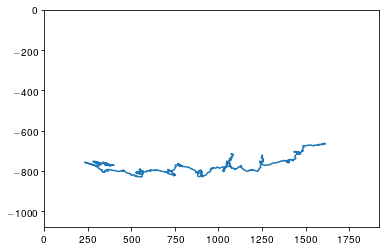

In [330]:
plt.plot(Data[:,24],-Data[:,25])

plt.xlim(0,1920)
plt.ylim(-1080,0)

(-260, 260)

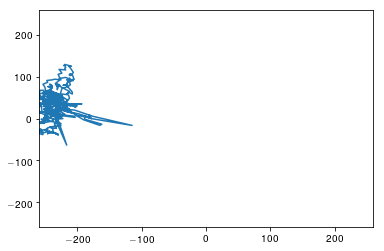

In [338]:
plt.plot(  (Data[:,6]+Data[:,15])/2-Data[:,24], (-Data[:,7]-Data[:,16])/2+Data[:,25] )

plt.xlim(-260,260)
plt.ylim(-260,260)

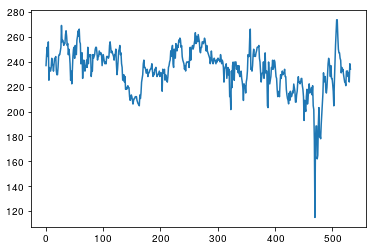

In [337]:
plt.plot( np.abs( (Data[:,6]+Data[:,15])/2-Data[:,24], (-Data[:,7]-Data[:,16])/2+Data[:,25] ) )

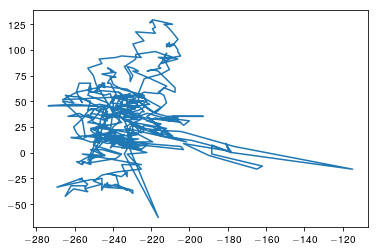

In [332]:
plt.plot(  (Data[:,6]+Data[:,15])/2 - Data[:,24], (-Data[:,7]-Data[:,16])/2 + Data[:,25]) 

#plt.xlim(0,1920)
#plt.ylim(-1080,0)

In [275]:
np.angle( [(Data[:,6]+Data[:,15])/2 - Data[:,24], (-Data[:,7]-Data[:,16])/2 + Data[:,25]][0] )

array([ 3.14159265,  3.14159265,  3.14159265,  3.14159265,  3.14159265,
        3.14159265,  3.14159265,  3.14159265,  3.14159265,  3.14159265,
        3.14159265,  3.14159265,  3.14159265,  3.14159265,  3.14159265,
        3.14159265,  3.14159265,  3.14159265,  3.14159265,  3.14159265,
        3.14159265,  3.14159265,  3.14159265,  3.14159265,  3.14159265,
        3.14159265,  3.14159265,  3.14159265,  3.14159265,  3.14159265,
        3.14159265,  3.14159265,  3.14159265,  3.14159265,  3.14159265,
        3.14159265,  3.14159265,  3.14159265,  3.14159265,  3.14159265,
        3.14159265,  3.14159265,  3.14159265,  3.14159265,  3.14159265,
        3.14159265,  3.14159265,  3.14159265,  3.14159265,  3.14159265,
        3.14159265,  3.14159265,  3.14159265,  3.14159265,  3.14159265,
        3.14159265,  3.14159265,  3.14159265,  3.14159265,  3.14159265,
        3.14159265,  3.14159265,  3.14159265,  3.14159265,  3.14159265,
        3.14159265,  3.14159265,  3.14159265,  3.14159265,  3.14

(-1080, 0)

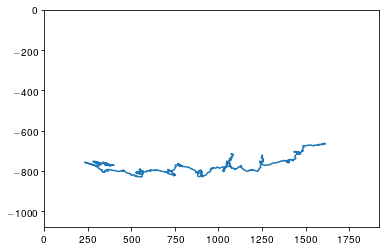

In [269]:
plt.plot(  Data[:,24], -Data[:,25] ) 
plt.xlim(0,1920)
plt.ylim(-1080,0)

In [223]:
        plt.scatter( twoD[12] , -twoD[13] , c=tableau10[6],s=50)
        plt.scatter( twoD[21] , -twoD[22] , c=tableau10[6],s=50)
        # Right Elbow
        plt.scatter( twoD[9] , -twoD[10] , c=tableau10[9],s=50)
        # Left Elbow
        plt.scatter( twoD[18] , -twoD[19] , c=tableau10[9],s=50)
        # Right Shoulder
        plt.scatter( twoD[6] , -twoD[7] , c=tableau10[3],s=50)
        # Left Shoulder
        plt.scatter( twoD[15] , -twoD[16] , c=tableau10[3],s=50)
        # Central Waist
        plt.scatter( twoD[24] , -twoD[25] , c =tableau10[0],s=50)
        # Right Waist
        plt.scatter( twoD[27] , -twoD[28] , c =tableau10[0],s=50)
        # Left Waist
        plt.scatter( twoD[36] , -twoD[37] , c =tableau10[0],s=50)
        # Right Knee
        plt.scatter( twoD[30] , -twoD[31] , c =tableau10[1],s=50)
        # Left Knee
        plt.scatter( twoD[39] , -twoD[40] , c =tableau10[1],s=50)
        # Right foot
        plt.scatter( twoD[33] , -twoD[34] , c =tableau10[2],s=50)
        # Left foot
        plt.scatter( twoD[42] , -twoD[43] , c =tableau10[2],s=50)

[array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])]